# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

### What You Should Already Know

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits

### Where to Get Help if You Need it
- Re-watch previous Udacity Lectures
- Leverage the recommended Course Reading Material - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) (Check inside your classroom for a discount code)
- Shoot me a tweet @iamtrask


### Tutorial Outline:

- Intro: The Importance of "Framing a Problem" (this lesson)

- [Curate a Dataset](#lesson_1)
- [Developing a "Predictive Theory"](#lesson_2)
- [**PROJECT 1**: Quick Theory Validation](#project_1)


- [Transforming Text to Numbers](#lesson_3)
- [**PROJECT 2**: Creating the Input/Output Data](#project_2)


- Putting it all together in a Neural Network (video only - nothing in notebook)
- [**PROJECT 3**: Building our Neural Network](#project_3)


- [Understanding Neural Noise](#lesson_4)
- [**PROJECT 4**: Making Learning Faster by Reducing Noise](#project_4)


- [Analyzing Inefficiencies in our Network](#lesson_5)
- [**PROJECT 5**: Making our Network Train and Run Faster](#project_5)


- [Further Noise Reduction](#lesson_6)
- [**PROJECT 6**: Reducing Noise by Strategically Reducing the Vocabulary](#project_6)


- [Analysis: What's going on in the weights?](#lesson_7)

# Lesson: Curate a Dataset<a id='lesson_1'></a>
The cells from here until Project 1 include code Andrew shows in the videos leading up to mini project 1. We've included them so you can run the code along with the videos without having to type in everything.

In [1]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

**Note:** The data in `reviews.txt` we're using has already been preprocessed a bit and contains only lower case characters. If we were working from raw data, where we didn't know it was all lower case, we would want to add a step here to convert it. That's so we treat different variations of the same word, like `The`, `the`, and `THE`, all the same way.

In [2]:
len(reviews)

25000

In [3]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [4]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory<a id='lesson_2'></a>

In [5]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation<a id='project_1'></a>

There are multiple ways to implement these projects, but in order to get your code closer to what Andrew shows in his solutions, we've provided some hints and starter code throughout this notebook.

You'll find the [Counter](https://docs.python.org/2/library/collections.html#collections.Counter) class to be useful in this exercise, as well as the [numpy](https://docs.scipy.org/doc/numpy/reference/) library.

In [6]:
from collections import Counter
import numpy as np

We'll create three `Counter` objects, one for words from postive reviews, one for words from negative reviews, and one for all the words.

In [7]:
# Create three Counter objects to store positive, negative and total counts
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

**TODO:** Examine all the reviews. For each word in a positive review, increase the count for that word in both your positive counter and the total words counter; likewise, for each word in a negative review, increase the count for that word in both your negative counter and the total words counter.

**Note:** Throughout these projects, you should use `split(' ')` to divide a piece of text (such as a review) into individual words. If you use `split()` instead, you'll get slightly different results than what the videos and solutions show.

In [8]:
# TODO: Loop over all the words in all the reviews and increment the counts in the appropriate counter objects
for label, review in zip(labels, reviews):
    review_words = review.split(' ')
    tick_counter = positive_counts if label == 'POSITIVE' else negative_counts
    for word in review_words:
        tick_counter[word] += 1
        total_counts[word] += 1

Run the following two cells to list the words used in positive reviews and negative reviews, respectively, ordered from most to least commonly used. 

In [9]:
# Examine the counts of the most common words in positive reviews
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [10]:
# Examine the counts of the most common words in negative reviews
negative_counts.most_common()

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878),
 ('as', 20625),
 ('t', 20361),
 ('film', 19218),
 ('you', 17549),
 ('on', 17192),
 ('not', 16354),
 ('have', 15144),
 ('are', 14623),
 ('be', 14541),
 ('he', 13856),
 ('one', 13134),
 ('they', 13011),
 ('at', 12279),
 ('his', 12147),
 ('all', 12036),
 ('so', 11463),
 ('like', 11238),
 ('there', 10775),
 ('just', 10619),
 ('by', 10549),
 ('or', 10272),
 ('an', 10266),
 ('who', 9969),
 ('from', 9731),
 ('if', 9518),
 ('about', 9061),
 ('out', 8979),
 ('what', 8422),
 ('some', 8306),
 ('no', 8143),
 ('her', 7947),
 ('even', 7687),
 ('can', 7653),
 ('has', 7604),
 ('good', 7423),
 ('bad', 7401),
 ('would', 7036),
 ('up', 6970),
 ('only', 6781),
 ('more', 6730),
 ('

As you can see, common words like "the" appear very often in both positive and negative reviews. Instead of finding the most common words in positive or negative reviews, what you really want are the words found in positive reviews more often than in negative reviews, and vice versa. To accomplish this, you'll need to calculate the **ratios** of word usage between positive and negative reviews.

**TODO:** Check all the words you've seen and calculate the ratio of postive to negative uses and store that ratio in `pos_neg_ratios`. 
>Hint: the positive-to-negative ratio for a given word can be calculated with `positive_counts[word] / float(negative_counts[word]+1)`. Notice the `+1` in the denominator – that ensures we don't divide by zero for words that are only seen in positive reviews.

In [11]:
# Create Counter object to store positive/negative ratios
pos_neg_ratios = Counter()

# TODO: Calculate the ratios of positive and negative uses of the most common words
#       Consider words to be "common" if they've been used at least 100 times
for word, count in positive_counts.items():
    pos_neg_ratios[word] = count / float(negative_counts[word] + 1)

Examine the ratios you've calculated for a few words:

In [12]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 1.0607993145235326
Pos-to-neg ratio for 'amazing' = 4.022813688212928
Pos-to-neg ratio for 'terrible' = 0.17744252873563218


Looking closely at the values you just calculated, we see the following:

* Words that you would expect to see more often in positive reviews – like "amazing" – have a ratio greater than 1. The more skewed a word is toward postive, the farther from 1 its positive-to-negative ratio  will be.
* Words that you would expect to see more often in negative reviews – like "terrible" – have positive values that are less than 1. The more skewed a word is toward negative, the closer to zero its positive-to-negative ratio will be.
* Neutral words, which don't really convey any sentiment because you would expect to see them in all sorts of reviews – like "the" – have values very close to 1. A perfectly neutral word – one that was used in exactly the same number of positive reviews as negative reviews – would be almost exactly 1. The `+1` we suggested you add to the denominator slightly biases words toward negative, but it won't matter because it will be a tiny bias and later we'll be ignoring words that are too close to neutral anyway.

Ok, the ratios tell us which words are used more often in postive or negative reviews, but the specific values we've calculated are a bit difficult to work with. A very positive word like "amazing" has a value above 4, whereas a very negative word like "terrible" has a value around 0.18. Those values aren't easy to compare for a couple of reasons:

* Right now, 1 is considered neutral, but the absolute value of the postive-to-negative rations of very postive words is larger than the absolute value of the ratios for the very negative words. So there is no way to directly compare two numbers and see if one word conveys the same magnitude of positive sentiment as another word conveys negative sentiment. So we should center all the values around netural so the absolute value fro neutral of the postive-to-negative ratio for a word would indicate how much sentiment (positive or negative) that word conveys.
* When comparing absolute values it's easier to do that around zero than one. 

To fix these issues, we'll convert all of our ratios to new values using logarithms.

**TODO:** Go through all the ratios you calculated and convert their values using the following formulas:
> * For any postive words, convert the ratio using `np.log(ratio)`
> * For any negative words, convert the ratio using `-np.log(1/(ratio + 0.01))`

That second equation may look strange, but what it's doing is dividing one by a very small number, which will produce a larger positive number. Then, it takes the `log` of that, which produces numbers similar to the ones for the postive words. Finally, we negate the values by adding that minus sign up front. In the end, extremely positive and extremely negative words will have positive-to-negative ratios with similar magnitudes but oppositite signs.

In [13]:
# TODO: Convert ratios to logs
for word, count in pos_neg_ratios.items():
    pos_neg_ratios[word] = np.log(count) if count >= 1 else -np.log(1/(count + 0.01))

Examine the new ratios you've calculated for the same words from before:

In [14]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 0.05902269426102881
Pos-to-neg ratio for 'amazing' = 1.3919815802404802
Pos-to-neg ratio for 'terrible' = -1.6742829939664696


If everything worked, now you should see neutral words with values close to zero. In this case, "the" is near zero but slightly positive, so it was probably used in more positive reviews than negative reviews. But look at "amazing"'s ratio - it's above `1`, showing it is clearly a word with positive sentiment. And "terrible" has a similar score, but in the opposite direction, so it's below `-1`. It's now clear that both of these words are associated with specific, opposing sentiments.

Now run the following cells to see more ratios. 

The first cell displays all the words, ordered by how associated they are with postive reviews. (Your notebook will most likely truncate the output so you won't actually see *all* the words in the list.)

In [15]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('antwone', 4.4773368144782069),
 ('din', 4.4067192472642533),
 ('gunga', 4.1896547420264252),
 ('goldsworthy', 4.1743872698956368),
 ('gypo', 4.0943445622221004),
 ('yokai', 4.0943445622221004),
 ('paulie', 4.0775374439057197),
 ('visconti', 3.9318256327243257),
 ('flavia', 3.9318256327243257),
 ('blandings', 3.8712010109078911),
 ('kells', 3.8712010109078911),
 ('brashear', 3.8501476017100584),
 ('gino', 3.8286413964890951),
 ('deathtrap', 3.8066624897703196),
 ('harilal', 3.713572066704308),
 ('panahi', 3.713572066704308),
 ('ossessione', 3.6635616461296463),
 ('tsui', 3.6375861597263857),
 ('caruso', 3.6375861597263857),
 ('sabu', 3.6109179126442243),
 ('ahmad', 3.6109179126442243),
 ('khouri', 3.5835189384561099),
 ('dominick', 3.5835189384561099),
 ('aweigh', 3.5553480614894135),
 ('mj', 3.5553480614894135),
 ('mcintire', 3.5263605246161616),
 ('kriemhild', 3.5263605246161616),
 ('blackie', 3.4965075614664802),
 ('daisies', 3.4965075614664802),
 ('

The second cell displays the 30 words most associated with negative reviews by reversing the order of the first list and then looking at the first 30 words. (If you want the second cell to display all the words, ordered by how associated they are with negative reviews, you could just write `reversed(pos_neg_ratios.most_common())`.)

You should continue to see values similar to the earlier ones we checked – neutral words will be close to `0`, words will get more positive as their ratios approach and go above `1`, and words will get more negative as their ratios approach and go below `-1`. That's why we decided to use the logs instead of the raw ratios.

In [16]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

# Note: Above is the code Andrew uses in his solution video, 
#       so we've included it here to avoid confusion.
#       If you explore the documentation for the Counter class, 
#       you will see you could also find the 30 least common
#       words like this: pos_neg_ratios.most_common()[:-31:-1]

[('boll', -4.0778152602708904),
 ('uwe', -3.9218753018711578),
 ('thunderbirds', -3.6447082358007989),
 ('beowulf', -3.6346396851769396),
 ('dahmer', -3.5572016301387364),
 ('wayans', -3.5197159818974928),
 ('ajay', -3.4791589231318674),
 ('grendel', -3.4791589231318674),
 ('awfulness', -3.3342578989870462),
 ('seagal', -3.3202501058581921),
 ('steaming', -3.3155026605572724),
 ('welch', -3.2961071728041906),
 ('deathstalker', -3.2552434690390757),
 ('sabretooth', -3.163960067272086),
 ('interminable', -3.163960067272086),
 ('forwarding', -3.1388331171946642),
 ('devgan', -3.1126536116128931),
 ('gamera', -3.0853444322436783),
 ('varma', -3.0568199655338293),
 ('picker', -3.0568199655338293),
 ('razzie', -3.0568199655338293),
 ('dreck', -3.0370818333726866),
 ('unwatchable', -3.0269848170580955),
 ('nada', -2.9957322735539909),
 ('stinker', -2.9876839403711624),
 ('kirkland', -2.962942450731),
 ('nostril', -2.962942450731),
 ('giamatti', -2.962942450731),
 ('aag', -2.9284800465448235),

# End of Project 1. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Transforming Text into Numbers<a id='lesson_3'></a>
The cells here include code Andrew shows in the next video. We've included it so you can run the code along with the video without having to type in everything.

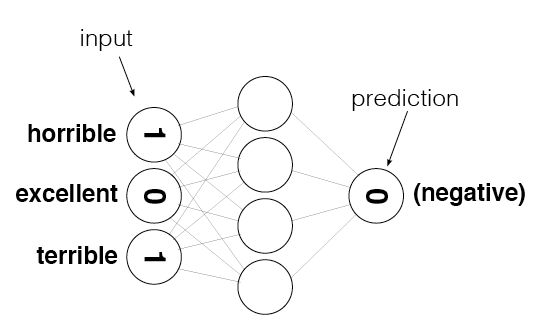

In [17]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

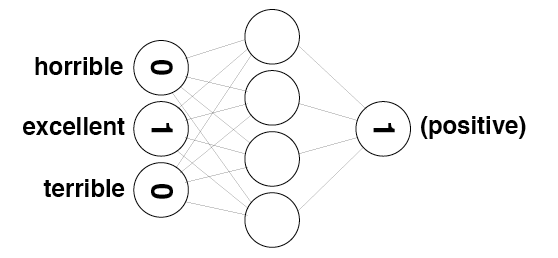

In [18]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Project 2: Creating the Input/Output Data<a id='project_2'></a>

**TODO:** Create a [set](https://docs.python.org/3/tutorial/datastructures.html#sets) named `vocab` that contains every word in the vocabulary.

In [19]:
# TODO: Create set named "vocab" containing all of the words from all of the reviews
vocab = set(positive_counts.keys()) | set(negative_counts.keys())

Run the following cell to check your vocabulary size. If everything worked correctly, it should print **74074**

In [20]:
vocab_size = len(vocab)
print(vocab_size)

74074


Take a look at the following image. It represents the layers of the neural network you'll be building throughout this notebook. `layer_0` is the input layer, `layer_1` is a hidden layer, and `layer_2` is the output layer.

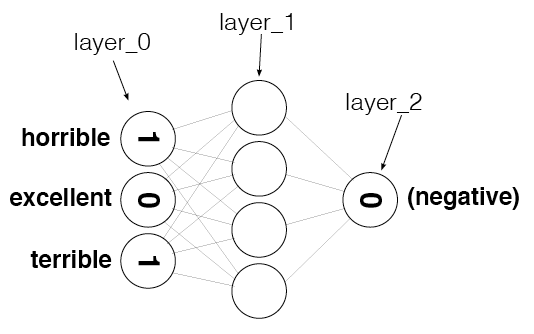

In [21]:
from IPython.display import Image
Image(filename='sentiment_network_2.png')

**TODO:** Create a numpy array called `layer_0` and initialize it to all zeros. You will find the [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) function particularly helpful here. Be sure you create `layer_0` as a 2-dimensional matrix with 1 row and `vocab_size` columns. 

In [22]:
# TODO: Create layer_0 matrix with dimensions 1 by vocab_size, initially filled with zeros
layer_0 = np.zeros((1, vocab_size))

Run the following cell. It should display `(1, 74074)`

In [23]:
layer_0.shape

(1, 74074)

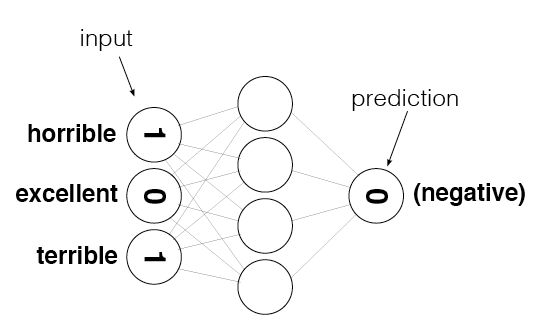

In [24]:
from IPython.display import Image
Image(filename='sentiment_network.png')

`layer_0` contains one entry for every word in the vocabulary, as shown in the above image. We need to make sure we know the index of each word, so run the following cell to create a lookup table that stores the index of every word.

In [25]:
# Create a dictionary of words in the vocabulary mapped to index positions
# (to be used in layer_0)
word2index = {}
for i,word in enumerate(vocab):
    word2index[word] = i
    
# display the map of words to indices
word2index

{'': 0,
 'politically': 1,
 'ives': 2,
 'fixate': 3,
 'infuriate': 4,
 'fuhgeddaboutit': 5,
 'whiskeys': 6,
 'hardship': 7,
 'consideration': 8,
 'phair': 9,
 'sammo': 10,
 'betters': 11,
 'reciprocate': 12,
 'munroe': 13,
 'deane': 14,
 'telling': 15,
 'incurable': 16,
 'worshipful': 17,
 'jaffer': 18,
 'abortionists': 19,
 'wiking': 20,
 'informative': 21,
 'colorfully': 22,
 'pasar': 23,
 'pairing': 24,
 'talkie': 25,
 'dispels': 26,
 'kindergartener': 27,
 'collerton': 28,
 'dale': 29,
 'tvg': 30,
 'mcg': 31,
 'terrificly': 32,
 'studious': 33,
 'alien': 34,
 'hatosy': 35,
 'maryln': 36,
 'rejoin': 37,
 'toupee': 38,
 'turnstiles': 39,
 'neighborrhood': 40,
 'focalize': 41,
 'catatonic': 42,
 'papp': 43,
 'insertion': 44,
 'amusingly': 45,
 'dither': 46,
 'durrell': 47,
 'bunuels': 48,
 'valette': 49,
 'shipwrecked': 50,
 'william': 51,
 'omnipotent': 52,
 'flagwaving': 53,
 'cross': 54,
 'wheeled': 55,
 'oed': 56,
 'unrated': 57,
 'smartens': 58,
 'heavily': 59,
 'unenlightened': 

**TODO:**  Complete the implementation of `update_input_layer`. It should count 
          how many times each word is used in the given review, and then store
          those counts at the appropriate indices inside `layer_0`.

In [26]:
def update_input_layer(review):
    """ Modify the global layer_0 to represent the vector form of review.
    The element at a given index of layer_0 should represent
    how many times the given word occurs in the review.
    Args:
        review(string) - the string of the review
    Returns:
        None
    """
    global layer_0
    # clear out previous state by resetting the layer to be all 0s
    layer_0 *= 0
    
    review_word_frequencies = Counter()
    # TODO: count how many times each word is used in the given review and store the results in layer_0
    # print(review)
    for word in review.split(' '):
        review_word_frequencies[word] += 1

    # print(list(review_word_frequencies.items())[:18])
    for word, count in review_word_frequencies.items():
        layer_0[0][word2index[word]] += count

Run the following cell to test updating the input layer with the first review. The indices assigned may not be the same as in the solution, but hopefully you'll see some non-zero values in `layer_0`.  

In [27]:
update_input_layer(reviews[0])
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

__Self__: the output of the following should be pleasing

In [28]:
# I want to see what's really in that array
list(filter(lambda x: x > 0., layer_0[0]))

[18.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 4.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 4.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 4.0,
 1.0,
 1.0,
 4.0,
 4.0,
 1.0,
 2.0,
 1.0,
 1.0,
 4.0,
 1.0,
 1.0,
 1.0,
 6.0,
 1.0,
 1.0,
 1.0,
 1.0,
 5.0,
 1.0,
 1.0,
 5.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 27.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 9.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

**TODO:** Complete the implementation of `get_target_for_labels`. It should return `0` or `1`, 
          depending on whether the given label is `NEGATIVE` or `POSITIVE`, respectively.

In [29]:
def get_target_for_label(label):
    """Convert a label to `0` or `1`.
    Args:
        label(string) - Either "POSITIVE" or "NEGATIVE".
    Returns:
        `0` or `1`.
    """
    return 1 if label == 'POSITIVE' else 0

Run the following two cells. They should print out`'POSITIVE'` and `1`, respectively.

In [30]:
labels[0]

'POSITIVE'

In [31]:
get_target_for_label(labels[0])

1

Run the following two cells. They should print out `'NEGATIVE'` and `0`, respectively.

In [32]:
labels[1]

'NEGATIVE'

In [33]:
get_target_for_label(labels[1])

0

# End of Project 2. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Project 3: Building a Neural Network<a id='project_3'></a>

**TODO:** We've included the framework of a class called `SentimentNetork`. Implement all of the items marked `TODO` in the code. These include doing the following:
- Create a basic neural network much like the networks you've seen in earlier lessons and in Project 1, with an input layer, a hidden layer, and an output layer. 
- Do **not** add a non-linearity in the hidden layer. That is, do not use an activation function when calculating the hidden layer outputs.
- Re-use the code from earlier in this notebook to create the training data (see `TODO`s in the code)
- Implement the `pre_process_data` function to create the vocabulary for our training data generating functions
- Ensure `train` trains over the entire corpus

### Where to Get Help if You Need it
- Re-watch earlier Udacity lectures
- Chapters 3-5 - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) - (Check inside your classroom for a discount code)

In [34]:
import time
import sys
import numpy as np
from functools import reduce

In [120]:
# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        # TODO: populate review_vocab with all of the words in the given reviews
        #       Remember to split reviews into individual words 
        #       using "split(' ')" instead of "split()".
        for review in reviews:
            for word in review.split(' '):
                review_vocab.add(word)

        
        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        label_vocab = set(labels)
        # TODO: populate label_vocab with all of the words in the given labels.
        #       There is no need to split the labels because each one is a single word.
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = { word: ind for ind, word in enumerate(self.review_vocab) }
        # TODO: populate self.word2index with indices for all the words in self.review_vocab
        #       like you saw earlier in the notebook
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = { label: ind for ind, label in enumerate(self.label_vocab) }
        # TODO: do the same thing you did for self.word2index and self.review_vocab, 
        #       but for self.label2index and self.label_vocab instead
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights
        
        # TODO: initialize self.weights_0_1 as a matrix of zeros. These are the weights between
        #       the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((input_nodes, hidden_nodes))
        
        # TODO: initialize self.weights_1_2 as a matrix of random values. 
        #       These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.output_nodes))
        
        # TODO: Create the input layer, a two-dimensional matrix with shape 
        #       1 x input_nodes, with all values initialized to zero
        self.layer_0 = np.zeros((1, input_nodes))
    
        
    def update_input_layer(self,review):
        # TODO: You can copy most of the code you wrote for update_input_layer 
        #       earlier in this notebook. 
        #
        #       However, MAKE SURE YOU CHANGE ALL VARIABLES TO REFERENCE
        #       THE VERSIONS STORED IN THIS OBJECT, NOT THE GLOBAL OBJECTS.
        #       For example, replace "layer_0 *= 0" with "self.layer_0 *= 0"
        self.layer_0 *= 0
    
        review_word_frequencies = Counter()
        # count how many times each word is used in the given review and store the results in layer_0
        for word in review.split(' '):
            self.layer_0[0][self.word2index[word]] += 1
            
                
    def get_target_for_label(self,label):
        # TODO: Copy the code you wrote for get_target_for_label 
        #       earlier in this notebook. 
        return 1 if label == 'POSITIVE' else 0
        
    def sigmoid(self,x):
        # TODO: Return the result of calculating the sigmoid activation function
        #       shown in the lectures
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        # TODO: Return the derivative of the sigmoid activation function, 
        #       where "output" is the original output from the sigmoid fucntion 
        return output * (1 - output)

    def train(self, training_reviews, training_labels):
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0
        
        # Remember when we started for printing time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        delta_weights_0_1 = np.zeros(self.weights_0_1.shape)
        delta_weights_1_2 = np.zeros(self.weights_1_2.shape)
        # updating weights for every item
        count_training_reviews = len(training_reviews)
        for i in range(count_training_reviews):
            
            # TODO: Get the next review and its correct label
            current_review, target_label = training_reviews[i], training_labels[i]
            # TODO: Implement the forward pass through the network. 
            #       That means use the given review to update the input layer, 
            #       then calculate values for the hidden layer,
            #       and finally calculate the output layer.
            update_input_layer(current_review)
            hidden_inputs = np.dot(self.layer_0, self.weights_0_1) # signals into hidden layer
            #       Do not use an activation function for the hidden layer,
            #       but use the sigmoid activation function for the output layer.
            hidden_outputs = hidden_inputs[:] # for history
            
            # my output (sometimes refered to as 'a')
            output_input = hidden_outputs.dot(self.weights_1_2)
            output = self.sigmoid(output_input)
            
            # desired output - using old variable names to match up.
            y = self.get_target_for_label(target_label)

            # TODO: Implement the back propagation pass here. 
            #       That means calculate the error for the forward pass's prediction
            output_error = y - output # also the output error term
            output_error_term = output_error * self.sigmoid_output_2_derivative(output)
            
            hidden_error = self.weights_1_2.dot(output_error)
            hidden_error_term = hidden_error * 1
            
            #       and update the weights in the network according to their
            #       contributions toward the error, as calculated via the
            delta_weights_0_1 += hidden_error_term * self.layer_0
            delta_weights_1_2 += output_error_term * hidden_outputs
            #       gradient descent and back propagation algorithms you 
            #       learned in class.
            self.weights_0_1 += self.learning_rate * delta_weights_0_1 / count_training_reviews
            self.weights_1_2 += self.learning_rate * delta_weights_1_2 / count_training_reviews
            # TODO: Keep track of correct predictions. To determine if the prediction was
            #       correct, check that the absolute value of the output error 
            #       is less than 0.5. If so, add one to the correct_so_far count.
            if np.abs(output_error) < 0.5:
                correct_so_far += 1
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
        
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # TODO: Run a forward pass through the network, like you did in the
        #       "train" function. That means use the given review to 
        #       update the input layer, then calculate values for the hidden layer,
        #       and finally calculate the output layer.
        self.update_input_layer(review.lower())
        hidden_input_identity = self.layer_0.dot(self.weights_0_1)
        output_layer = hidden_input_identity.dot(self.weights_1_2)
        output = self.sigmoid(output_layer) # activation function
        #       Note: The review passed into this function for prediction 
        #             might come from anywhere, so you should convert it 
        #             to lower case prior to using it.
        print(output)
        # TODO: The output layer should now contain a prediction. 
        #       Return `POSITIVE` for predictions greater-than-or-equal-to `0.5`, 
        #       and `NEGATIVE` otherwise.
        return 'POSITIVE' if output >= 0.5 else 'NEGATIVE'

Run the following cell to create a `SentimentNetwork` that will train on all but the last 1000 reviews (we're saving those for testing). Here we use a learning rate of `0.1`.

In [36]:
# I can't stand this "re-iterate the list" nonsense. Constantly invoking the stride operation...
test_reviews, test_labels = reviews[:-10], labels[:-10]

In [118]:
mlp = SentimentNetwork(test_reviews,test_labels, learning_rate=0.1)

Run the following cell to test the network's performance against the last 1000 reviews (the ones we held out from our training set). 

**We have not trained the model yet, so the results should be about 50% as it will just be guessing and there are only two possible values to choose from.**

In [109]:
mlp.test(test_reviews,test_labels)

[[ 0.5]]
Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Tested:1 Testing Accuracy:100.%[[ 0.5]]
Progress:0.00% Speed(reviews/sec):41.34 #Correct:1 #Tested:2 Testing Accuracy:50.0%[[ 0.5]]
Progress:0.00% Speed(reviews/sec):72.44 #Correct:2 #Tested:3 Testing Accuracy:66.6%[[ 0.5]]
Progress:0.01% Speed(reviews/sec):92.87 #Correct:2 #Tested:4 Testing Accuracy:50.0%[[ 0.5]]
Progress:0.01% Speed(reviews/sec):116.4 #Correct:3 #Tested:5 Testing Accuracy:60.0%[[ 0.5]]
Progress:0.02% Speed(reviews/sec):138.0 #Correct:3 #Tested:6 Testing Accuracy:50.0%[[ 0.5]]
Progress:0.02% Speed(reviews/sec):157.9 #Correct:4 #Tested:7 Testing Accuracy:57.1%[[ 0.5]]
Progress:0.02% Speed(reviews/sec):175.7 #Correct:4 #Tested:8 Testing Accuracy:50.0%[[ 0.5]]
Progress:0.03% Speed(reviews/sec):192.6 #Correct:5 #Tested:9 Testing Accuracy:55.5%[[ 0.5]]
Progress:0.03% Speed(reviews/sec):204.1 #Correct:5 #Tested:10 Testing Accuracy:50.0%[[ 0.5]]
Progress:0.04% Speed(reviews/sec):216.9 #Correct:6 #Tested:11 Testing Acc

Progress:0.47% Speed(reviews/sec):524.2 #Correct:60 #Tested:119 Testing Accuracy:50.4%[[ 0.5]]
Progress:0.47% Speed(reviews/sec):524.8 #Correct:60 #Tested:120 Testing Accuracy:50.0%[[ 0.5]]
Progress:0.48% Speed(reviews/sec):526.4 #Correct:61 #Tested:121 Testing Accuracy:50.4%[[ 0.5]]
Progress:0.48% Speed(reviews/sec):528.0 #Correct:61 #Tested:122 Testing Accuracy:50.0%[[ 0.5]]
Progress:0.48% Speed(reviews/sec):529.3 #Correct:62 #Tested:123 Testing Accuracy:50.4%[[ 0.5]]
Progress:0.49% Speed(reviews/sec):529.7 #Correct:62 #Tested:124 Testing Accuracy:50.0%[[ 0.5]]
Progress:0.49% Speed(reviews/sec):531.3 #Correct:63 #Tested:125 Testing Accuracy:50.4%[[ 0.5]]
Progress:0.50% Speed(reviews/sec):532.7 #Correct:63 #Tested:126 Testing Accuracy:50.0%[[ 0.5]]
Progress:0.50% Speed(reviews/sec):533.9 #Correct:64 #Tested:127 Testing Accuracy:50.3%[[ 0.5]]
Progress:0.50% Speed(reviews/sec):531.5 #Correct:64 #Tested:128 Testing Accuracy:50.0%[[ 0.5]]
Progress:0.51% Speed(reviews/sec):532.0 #Correct:6

Progress:1.04% Speed(reviews/sec):614.0 #Correct:132 #Tested:263 Testing Accuracy:50.1%[[ 0.5]]
Progress:1.05% Speed(reviews/sec):614.3 #Correct:132 #Tested:264 Testing Accuracy:50.0%[[ 0.5]]
Progress:1.05% Speed(reviews/sec):614.7 #Correct:133 #Tested:265 Testing Accuracy:50.1%[[ 0.5]]
Progress:1.06% Speed(reviews/sec):615.4 #Correct:133 #Tested:266 Testing Accuracy:50.0%[[ 0.5]]
Progress:1.06% Speed(reviews/sec):615.9 #Correct:134 #Tested:267 Testing Accuracy:50.1%[[ 0.5]]
Progress:1.06% Speed(reviews/sec):616.1 #Correct:134 #Tested:268 Testing Accuracy:50.0%[[ 0.5]]
Progress:1.07% Speed(reviews/sec):616.0 #Correct:135 #Tested:269 Testing Accuracy:50.1%[[ 0.5]]
Progress:1.07% Speed(reviews/sec):616.6 #Correct:135 #Tested:270 Testing Accuracy:50.0%[[ 0.5]]
Progress:1.08% Speed(reviews/sec):617.2 #Correct:136 #Tested:271 Testing Accuracy:50.1%[[ 0.5]]
Progress:1.08% Speed(reviews/sec):617.9 #Correct:136 #Tested:272 Testing Accuracy:50.0%[[ 0.5]]
Progress:1.08% Speed(reviews/sec):618.7 

Progress:1.72% Speed(reviews/sec):685.5 #Correct:216 #Tested:432 Testing Accuracy:50.0%[[ 0.5]]
Progress:1.72% Speed(reviews/sec):685.7 #Correct:217 #Tested:433 Testing Accuracy:50.1%[[ 0.5]]
Progress:1.73% Speed(reviews/sec):686.2 #Correct:217 #Tested:434 Testing Accuracy:50.0%[[ 0.5]]
Progress:1.73% Speed(reviews/sec):686.9 #Correct:218 #Tested:435 Testing Accuracy:50.1%[[ 0.5]]
Progress:1.74% Speed(reviews/sec):687.6 #Correct:218 #Tested:436 Testing Accuracy:50.0%[[ 0.5]]
Progress:1.74% Speed(reviews/sec):687.8 #Correct:219 #Tested:437 Testing Accuracy:50.1%[[ 0.5]]
Progress:1.74% Speed(reviews/sec):687.7 #Correct:219 #Tested:438 Testing Accuracy:50.0%[[ 0.5]]
Progress:1.75% Speed(reviews/sec):688.3 #Correct:220 #Tested:439 Testing Accuracy:50.1%[[ 0.5]]
Progress:1.75% Speed(reviews/sec):689.0 #Correct:220 #Tested:440 Testing Accuracy:50.0%[[ 0.5]]
Progress:1.76% Speed(reviews/sec):689.3 #Correct:221 #Tested:441 Testing Accuracy:50.1%[[ 0.5]]
Progress:1.76% Speed(reviews/sec):690.1 

Progress:2.46% Speed(reviews/sec):742.3 #Correct:309 #Tested:617 Testing Accuracy:50.0%[[ 0.5]]
Progress:2.46% Speed(reviews/sec):742.4 #Correct:309 #Tested:618 Testing Accuracy:50.0%[[ 0.5]]
Progress:2.47% Speed(reviews/sec):742.8 #Correct:310 #Tested:619 Testing Accuracy:50.0%[[ 0.5]]
Progress:2.47% Speed(reviews/sec):743.3 #Correct:310 #Tested:620 Testing Accuracy:50.0%[[ 0.5]]
Progress:2.48% Speed(reviews/sec):743.6 #Correct:311 #Tested:621 Testing Accuracy:50.0%[[ 0.5]]
Progress:2.48% Speed(reviews/sec):743.9 #Correct:311 #Tested:622 Testing Accuracy:50.0%[[ 0.5]]
Progress:2.48% Speed(reviews/sec):743.8 #Correct:312 #Tested:623 Testing Accuracy:50.0%[[ 0.5]]
Progress:2.49% Speed(reviews/sec):744.1 #Correct:312 #Tested:624 Testing Accuracy:50.0%[[ 0.5]]
Progress:2.49% Speed(reviews/sec):743.9 #Correct:313 #Tested:625 Testing Accuracy:50.0%[[ 0.5]]
Progress:2.50% Speed(reviews/sec):744.3 #Correct:313 #Tested:626 Testing Accuracy:50.0%[[ 0.5]]
Progress:2.50% Speed(reviews/sec):744.6 

Progress:3.16% Speed(reviews/sec):767.0 #Correct:396 #Tested:791 Testing Accuracy:50.0%[[ 0.5]]
Progress:3.16% Speed(reviews/sec):766.2 #Correct:396 #Tested:792 Testing Accuracy:50.0%[[ 0.5]]
Progress:3.16% Speed(reviews/sec):765.3 #Correct:397 #Tested:793 Testing Accuracy:50.0%[[ 0.5]]
Progress:3.17% Speed(reviews/sec):765.4 #Correct:397 #Tested:794 Testing Accuracy:50.0%[[ 0.5]]
Progress:3.17% Speed(reviews/sec):765.3 #Correct:398 #Tested:795 Testing Accuracy:50.0%[[ 0.5]]
Progress:3.18% Speed(reviews/sec):765.2 #Correct:398 #Tested:796 Testing Accuracy:50.0%[[ 0.5]]
Progress:3.18% Speed(reviews/sec):765.2 #Correct:399 #Tested:797 Testing Accuracy:50.0%[[ 0.5]]
Progress:3.18% Speed(reviews/sec):765.2 #Correct:399 #Tested:798 Testing Accuracy:50.0%[[ 0.5]]
Progress:3.19% Speed(reviews/sec):765.4 #Correct:400 #Tested:799 Testing Accuracy:50.0%[[ 0.5]]
Progress:3.19% Speed(reviews/sec):765.5 #Correct:400 #Tested:800 Testing Accuracy:50.0%[[ 0.5]]
Progress:3.20% Speed(reviews/sec):765.3 

Progress:3.73% Speed(reviews/sec):757.8 #Correct:468 #Tested:935 Testing Accuracy:50.0%[[ 0.5]]
Progress:3.74% Speed(reviews/sec):757.0 #Correct:468 #Tested:936 Testing Accuracy:50.0%[[ 0.5]]
Progress:3.74% Speed(reviews/sec):757.0 #Correct:469 #Tested:937 Testing Accuracy:50.0%[[ 0.5]]
Progress:3.74% Speed(reviews/sec):757.0 #Correct:469 #Tested:938 Testing Accuracy:50.0%[[ 0.5]]
Progress:3.75% Speed(reviews/sec):756.4 #Correct:470 #Tested:939 Testing Accuracy:50.0%[[ 0.5]]
Progress:3.75% Speed(reviews/sec):756.5 #Correct:470 #Tested:940 Testing Accuracy:50.0%[[ 0.5]]
Progress:3.76% Speed(reviews/sec):756.6 #Correct:471 #Tested:941 Testing Accuracy:50.0%[[ 0.5]]
Progress:3.76% Speed(reviews/sec):756.6 #Correct:471 #Tested:942 Testing Accuracy:50.0%[[ 0.5]]
Progress:3.76% Speed(reviews/sec):756.2 #Correct:472 #Tested:943 Testing Accuracy:50.0%[[ 0.5]]
Progress:3.77% Speed(reviews/sec):756.4 #Correct:472 #Tested:944 Testing Accuracy:50.0%[[ 0.5]]
Progress:3.77% Speed(reviews/sec):756.3 

Progress:4.33% Speed(reviews/sec):755.6 #Correct:543 #Tested:1085 Testing Accuracy:50.0%[[ 0.5]]
Progress:4.34% Speed(reviews/sec):755.2 #Correct:543 #Tested:1086 Testing Accuracy:50.0%[[ 0.5]]
Progress:4.34% Speed(reviews/sec):755.3 #Correct:544 #Tested:1087 Testing Accuracy:50.0%[[ 0.5]]
Progress:4.34% Speed(reviews/sec):753.8 #Correct:544 #Tested:1088 Testing Accuracy:50.0%[[ 0.5]]
Progress:4.35% Speed(reviews/sec):753.9 #Correct:545 #Tested:1089 Testing Accuracy:50.0%[[ 0.5]]
Progress:4.35% Speed(reviews/sec):753.8 #Correct:545 #Tested:1090 Testing Accuracy:50.0%[[ 0.5]]
Progress:4.36% Speed(reviews/sec):754.0 #Correct:546 #Tested:1091 Testing Accuracy:50.0%[[ 0.5]]
Progress:4.36% Speed(reviews/sec):754.2 #Correct:546 #Tested:1092 Testing Accuracy:50.0%[[ 0.5]]
Progress:4.36% Speed(reviews/sec):754.3 #Correct:547 #Tested:1093 Testing Accuracy:50.0%[[ 0.5]]
Progress:4.37% Speed(reviews/sec):754.5 #Correct:547 #Tested:1094 Testing Accuracy:50.0%[[ 0.5]]
Progress:4.37% Speed(reviews/s

Progress:4.92% Speed(reviews/sec):752.1 #Correct:616 #Tested:1232 Testing Accuracy:50.0%[[ 0.5]]
Progress:4.92% Speed(reviews/sec):750.9 #Correct:617 #Tested:1233 Testing Accuracy:50.0%[[ 0.5]]
Progress:4.93% Speed(reviews/sec):750.8 #Correct:617 #Tested:1234 Testing Accuracy:50.0%[[ 0.5]]
Progress:4.93% Speed(reviews/sec):750.9 #Correct:618 #Tested:1235 Testing Accuracy:50.0%[[ 0.5]]
Progress:4.94% Speed(reviews/sec):750.8 #Correct:618 #Tested:1236 Testing Accuracy:50.0%[[ 0.5]]
Progress:4.94% Speed(reviews/sec):750.8 #Correct:619 #Tested:1237 Testing Accuracy:50.0%[[ 0.5]]
Progress:4.94% Speed(reviews/sec):750.9 #Correct:619 #Tested:1238 Testing Accuracy:50.0%[[ 0.5]]
Progress:4.95% Speed(reviews/sec):751.0 #Correct:620 #Tested:1239 Testing Accuracy:50.0%[[ 0.5]]
Progress:4.95% Speed(reviews/sec):751.1 #Correct:620 #Tested:1240 Testing Accuracy:50.0%[[ 0.5]]
Progress:4.96% Speed(reviews/sec):751.1 #Correct:621 #Tested:1241 Testing Accuracy:50.0%[[ 0.5]]
Progress:4.96% Speed(reviews/s

Progress:5.53% Speed(reviews/sec):750.4 #Correct:692 #Tested:1383 Testing Accuracy:50.0%[[ 0.5]]
Progress:5.53% Speed(reviews/sec):750.4 #Correct:692 #Tested:1384 Testing Accuracy:50.0%[[ 0.5]]
Progress:5.53% Speed(reviews/sec):750.4 #Correct:693 #Tested:1385 Testing Accuracy:50.0%[[ 0.5]]
Progress:5.54% Speed(reviews/sec):750.4 #Correct:693 #Tested:1386 Testing Accuracy:50.0%[[ 0.5]]
Progress:5.54% Speed(reviews/sec):750.5 #Correct:694 #Tested:1387 Testing Accuracy:50.0%[[ 0.5]]
Progress:5.55% Speed(reviews/sec):750.3 #Correct:694 #Tested:1388 Testing Accuracy:50.0%[[ 0.5]]
Progress:5.55% Speed(reviews/sec):750.2 #Correct:695 #Tested:1389 Testing Accuracy:50.0%[[ 0.5]]
Progress:5.55% Speed(reviews/sec):750.3 #Correct:695 #Tested:1390 Testing Accuracy:50.0%[[ 0.5]]
Progress:5.56% Speed(reviews/sec):750.3 #Correct:696 #Tested:1391 Testing Accuracy:50.0%[[ 0.5]]
Progress:5.56% Speed(reviews/sec):750.4 #Correct:696 #Tested:1392 Testing Accuracy:50.0%[[ 0.5]]
Progress:5.57% Speed(reviews/s

Progress:6.17% Speed(reviews/sec):755.6 #Correct:773 #Tested:1545 Testing Accuracy:50.0%[[ 0.5]]
Progress:6.18% Speed(reviews/sec):755.2 #Correct:773 #Tested:1546 Testing Accuracy:50.0%[[ 0.5]]
Progress:6.18% Speed(reviews/sec):755.1 #Correct:774 #Tested:1547 Testing Accuracy:50.0%[[ 0.5]]
Progress:6.19% Speed(reviews/sec):754.9 #Correct:774 #Tested:1548 Testing Accuracy:50.0%[[ 0.5]]
Progress:6.19% Speed(reviews/sec):754.8 #Correct:775 #Tested:1549 Testing Accuracy:50.0%[[ 0.5]]
Progress:6.19% Speed(reviews/sec):754.9 #Correct:775 #Tested:1550 Testing Accuracy:50.0%[[ 0.5]]
Progress:6.20% Speed(reviews/sec):754.9 #Correct:776 #Tested:1551 Testing Accuracy:50.0%[[ 0.5]]
Progress:6.20% Speed(reviews/sec):754.9 #Correct:776 #Tested:1552 Testing Accuracy:50.0%[[ 0.5]]
Progress:6.21% Speed(reviews/sec):754.8 #Correct:777 #Tested:1553 Testing Accuracy:50.0%[[ 0.5]]
Progress:6.21% Speed(reviews/sec):754.8 #Correct:777 #Tested:1554 Testing Accuracy:50.0%[[ 0.5]]
Progress:6.21% Speed(reviews/s

Progress:6.75% Speed(reviews/sec):751.5 #Correct:845 #Tested:1689 Testing Accuracy:50.0%[[ 0.5]]
Progress:6.75% Speed(reviews/sec):751.3 #Correct:845 #Tested:1690 Testing Accuracy:50.0%[[ 0.5]]
Progress:6.76% Speed(reviews/sec):750.8 #Correct:846 #Tested:1691 Testing Accuracy:50.0%[[ 0.5]]
Progress:6.76% Speed(reviews/sec):750.9 #Correct:846 #Tested:1692 Testing Accuracy:50.0%[[ 0.5]]
Progress:6.77% Speed(reviews/sec):750.6 #Correct:847 #Tested:1693 Testing Accuracy:50.0%[[ 0.5]]
Progress:6.77% Speed(reviews/sec):750.7 #Correct:847 #Tested:1694 Testing Accuracy:50.0%[[ 0.5]]
Progress:6.77% Speed(reviews/sec):750.7 #Correct:848 #Tested:1695 Testing Accuracy:50.0%[[ 0.5]]
Progress:6.78% Speed(reviews/sec):750.8 #Correct:848 #Tested:1696 Testing Accuracy:50.0%[[ 0.5]]
Progress:6.78% Speed(reviews/sec):750.9 #Correct:849 #Tested:1697 Testing Accuracy:50.0%[[ 0.5]]
Progress:6.79% Speed(reviews/sec):751.0 #Correct:849 #Tested:1698 Testing Accuracy:50.0%[[ 0.5]]
Progress:6.79% Speed(reviews/s

Progress:7.42% Speed(reviews/sec):757.2 #Correct:928 #Tested:1856 Testing Accuracy:50.0%[[ 0.5]]
Progress:7.42% Speed(reviews/sec):757.2 #Correct:929 #Tested:1857 Testing Accuracy:50.0%[[ 0.5]]
Progress:7.43% Speed(reviews/sec):757.0 #Correct:929 #Tested:1858 Testing Accuracy:50.0%[[ 0.5]]
Progress:7.43% Speed(reviews/sec):757.1 #Correct:930 #Tested:1859 Testing Accuracy:50.0%[[ 0.5]]
Progress:7.43% Speed(reviews/sec):757.2 #Correct:930 #Tested:1860 Testing Accuracy:50.0%[[ 0.5]]
Progress:7.44% Speed(reviews/sec):757.2 #Correct:931 #Tested:1861 Testing Accuracy:50.0%[[ 0.5]]
Progress:7.44% Speed(reviews/sec):757.0 #Correct:931 #Tested:1862 Testing Accuracy:50.0%[[ 0.5]]
Progress:7.45% Speed(reviews/sec):757.0 #Correct:932 #Tested:1863 Testing Accuracy:50.0%[[ 0.5]]
Progress:7.45% Speed(reviews/sec):757.0 #Correct:932 #Tested:1864 Testing Accuracy:50.0%[[ 0.5]]
Progress:7.45% Speed(reviews/sec):757.1 #Correct:933 #Tested:1865 Testing Accuracy:50.0%[[ 0.5]]
Progress:7.46% Speed(reviews/s

Progress:7.97% Speed(reviews/sec):751.4 #Correct:997 #Tested:1993 Testing Accuracy:50.0%[[ 0.5]]
Progress:7.97% Speed(reviews/sec):751.0 #Correct:997 #Tested:1994 Testing Accuracy:50.0%[[ 0.5]]
Progress:7.97% Speed(reviews/sec):750.9 #Correct:998 #Tested:1995 Testing Accuracy:50.0%[[ 0.5]]
Progress:7.98% Speed(reviews/sec):750.9 #Correct:998 #Tested:1996 Testing Accuracy:50.0%[[ 0.5]]
Progress:7.98% Speed(reviews/sec):750.9 #Correct:999 #Tested:1997 Testing Accuracy:50.0%[[ 0.5]]
Progress:7.99% Speed(reviews/sec):751.0 #Correct:999 #Tested:1998 Testing Accuracy:50.0%[[ 0.5]]
Progress:7.99% Speed(reviews/sec):751.1 #Correct:1000 #Tested:1999 Testing Accuracy:50.0%[[ 0.5]]
Progress:7.99% Speed(reviews/sec):751.1 #Correct:1000 #Tested:2000 Testing Accuracy:50.0%[[ 0.5]]
Progress:8.00% Speed(reviews/sec):751.1 #Correct:1001 #Tested:2001 Testing Accuracy:50.0%[[ 0.5]]
Progress:8.00% Speed(reviews/sec):751.0 #Correct:1001 #Tested:2002 Testing Accuracy:50.0%[[ 0.5]]
Progress:8.01% Speed(revie

Progress:8.40% Speed(reviews/sec):736.7 #Correct:1051 #Tested:2101 Testing Accuracy:50.0%[[ 0.5]]
Progress:8.40% Speed(reviews/sec):736.6 #Correct:1051 #Tested:2102 Testing Accuracy:50.0%[[ 0.5]]
Progress:8.41% Speed(reviews/sec):736.3 #Correct:1052 #Tested:2103 Testing Accuracy:50.0%[[ 0.5]]
Progress:8.41% Speed(reviews/sec):736.3 #Correct:1052 #Tested:2104 Testing Accuracy:50.0%[[ 0.5]]
Progress:8.41% Speed(reviews/sec):736.1 #Correct:1053 #Tested:2105 Testing Accuracy:50.0%[[ 0.5]]
Progress:8.42% Speed(reviews/sec):736.1 #Correct:1053 #Tested:2106 Testing Accuracy:50.0%[[ 0.5]]
Progress:8.42% Speed(reviews/sec):736.1 #Correct:1054 #Tested:2107 Testing Accuracy:50.0%[[ 0.5]]
Progress:8.43% Speed(reviews/sec):736.0 #Correct:1054 #Tested:2108 Testing Accuracy:50.0%[[ 0.5]]
Progress:8.43% Speed(reviews/sec):735.9 #Correct:1055 #Tested:2109 Testing Accuracy:50.0%[[ 0.5]]
Progress:8.43% Speed(reviews/sec):735.8 #Correct:1055 #Tested:2110 Testing Accuracy:50.0%[[ 0.5]]
Progress:8.44% Speed

Progress:8.93% Speed(reviews/sec):729.5 #Correct:1118 #Tested:2235 Testing Accuracy:50.0%[[ 0.5]]
Progress:8.94% Speed(reviews/sec):729.4 #Correct:1118 #Tested:2236 Testing Accuracy:50.0%[[ 0.5]]
Progress:8.94% Speed(reviews/sec):729.2 #Correct:1119 #Tested:2237 Testing Accuracy:50.0%[[ 0.5]]
Progress:8.95% Speed(reviews/sec):729.2 #Correct:1119 #Tested:2238 Testing Accuracy:50.0%[[ 0.5]]
Progress:8.95% Speed(reviews/sec):729.2 #Correct:1120 #Tested:2239 Testing Accuracy:50.0%[[ 0.5]]
Progress:8.95% Speed(reviews/sec):729.2 #Correct:1120 #Tested:2240 Testing Accuracy:50.0%[[ 0.5]]
Progress:8.96% Speed(reviews/sec):729.1 #Correct:1121 #Tested:2241 Testing Accuracy:50.0%[[ 0.5]]
Progress:8.96% Speed(reviews/sec):729.2 #Correct:1121 #Tested:2242 Testing Accuracy:50.0%[[ 0.5]]
Progress:8.97% Speed(reviews/sec):729.2 #Correct:1122 #Tested:2243 Testing Accuracy:50.0%[[ 0.5]]
Progress:8.97% Speed(reviews/sec):728.2 #Correct:1122 #Tested:2244 Testing Accuracy:50.0%[[ 0.5]]
Progress:8.97% Speed

Progress:9.41% Speed(reviews/sec):721.2 #Correct:1178 #Tested:2355 Testing Accuracy:50.0%[[ 0.5]]
Progress:9.42% Speed(reviews/sec):721.0 #Correct:1178 #Tested:2356 Testing Accuracy:50.0%[[ 0.5]]
Progress:9.42% Speed(reviews/sec):721.1 #Correct:1179 #Tested:2357 Testing Accuracy:50.0%[[ 0.5]]
Progress:9.43% Speed(reviews/sec):721.2 #Correct:1179 #Tested:2358 Testing Accuracy:50.0%[[ 0.5]]
Progress:9.43% Speed(reviews/sec):721.2 #Correct:1180 #Tested:2359 Testing Accuracy:50.0%[[ 0.5]]
Progress:9.43% Speed(reviews/sec):721.3 #Correct:1180 #Tested:2360 Testing Accuracy:50.0%[[ 0.5]]
Progress:9.44% Speed(reviews/sec):721.4 #Correct:1181 #Tested:2361 Testing Accuracy:50.0%[[ 0.5]]
Progress:9.44% Speed(reviews/sec):721.4 #Correct:1181 #Tested:2362 Testing Accuracy:50.0%[[ 0.5]]
Progress:9.45% Speed(reviews/sec):721.5 #Correct:1182 #Tested:2363 Testing Accuracy:50.0%[[ 0.5]]
Progress:9.45% Speed(reviews/sec):721.5 #Correct:1182 #Tested:2364 Testing Accuracy:50.0%[[ 0.5]]
Progress:9.45% Speed

Progress:9.92% Speed(reviews/sec):715.8 #Correct:1241 #Tested:2482 Testing Accuracy:50.0%[[ 0.5]]
Progress:9.93% Speed(reviews/sec):715.7 #Correct:1242 #Tested:2483 Testing Accuracy:50.0%[[ 0.5]]
Progress:9.93% Speed(reviews/sec):715.7 #Correct:1242 #Tested:2484 Testing Accuracy:50.0%[[ 0.5]]
Progress:9.93% Speed(reviews/sec):715.7 #Correct:1243 #Tested:2485 Testing Accuracy:50.0%[[ 0.5]]
Progress:9.94% Speed(reviews/sec):714.7 #Correct:1243 #Tested:2486 Testing Accuracy:50.0%[[ 0.5]]
Progress:9.94% Speed(reviews/sec):714.5 #Correct:1244 #Tested:2487 Testing Accuracy:50.0%[[ 0.5]]
Progress:9.95% Speed(reviews/sec):714.4 #Correct:1244 #Tested:2488 Testing Accuracy:50.0%[[ 0.5]]
Progress:9.95% Speed(reviews/sec):714.4 #Correct:1245 #Tested:2489 Testing Accuracy:50.0%[[ 0.5]]
Progress:9.95% Speed(reviews/sec):714.4 #Correct:1245 #Tested:2490 Testing Accuracy:50.0%[[ 0.5]]
Progress:9.96% Speed(reviews/sec):714.3 #Correct:1246 #Tested:2491 Testing Accuracy:50.0%[[ 0.5]]
Progress:9.96% Speed

Progress:10.3% Speed(reviews/sec):707.1 #Correct:1298 #Tested:2595 Testing Accuracy:50.0%[[ 0.5]]
Progress:10.3% Speed(reviews/sec):707.0 #Correct:1298 #Tested:2596 Testing Accuracy:50.0%[[ 0.5]]
Progress:10.3% Speed(reviews/sec):707.0 #Correct:1299 #Tested:2597 Testing Accuracy:50.0%[[ 0.5]]
Progress:10.3% Speed(reviews/sec):707.0 #Correct:1299 #Tested:2598 Testing Accuracy:50.0%[[ 0.5]]
Progress:10.3% Speed(reviews/sec):707.1 #Correct:1300 #Tested:2599 Testing Accuracy:50.0%[[ 0.5]]
Progress:10.4% Speed(reviews/sec):706.9 #Correct:1300 #Tested:2600 Testing Accuracy:50.0%[[ 0.5]]
Progress:10.4% Speed(reviews/sec):706.9 #Correct:1301 #Tested:2601 Testing Accuracy:50.0%[[ 0.5]]
Progress:10.4% Speed(reviews/sec):707.0 #Correct:1301 #Tested:2602 Testing Accuracy:50.0%[[ 0.5]]
Progress:10.4% Speed(reviews/sec):707.0 #Correct:1302 #Tested:2603 Testing Accuracy:50.0%[[ 0.5]]
Progress:10.4% Speed(reviews/sec):707.0 #Correct:1302 #Tested:2604 Testing Accuracy:50.0%[[ 0.5]]
Progress:10.4% Speed

Progress:10.8% Speed(reviews/sec):700.4 #Correct:1356 #Tested:2711 Testing Accuracy:50.0%[[ 0.5]]
Progress:10.8% Speed(reviews/sec):700.2 #Correct:1356 #Tested:2712 Testing Accuracy:50.0%[[ 0.5]]
Progress:10.8% Speed(reviews/sec):699.9 #Correct:1357 #Tested:2713 Testing Accuracy:50.0%[[ 0.5]]
Progress:10.8% Speed(reviews/sec):699.9 #Correct:1357 #Tested:2714 Testing Accuracy:50.0%[[ 0.5]]
Progress:10.8% Speed(reviews/sec):700.0 #Correct:1358 #Tested:2715 Testing Accuracy:50.0%[[ 0.5]]
Progress:10.8% Speed(reviews/sec):700.0 #Correct:1358 #Tested:2716 Testing Accuracy:50.0%[[ 0.5]]
Progress:10.8% Speed(reviews/sec):700.1 #Correct:1359 #Tested:2717 Testing Accuracy:50.0%[[ 0.5]]
Progress:10.8% Speed(reviews/sec):700.2 #Correct:1359 #Tested:2718 Testing Accuracy:50.0%[[ 0.5]]
Progress:10.8% Speed(reviews/sec):700.3 #Correct:1360 #Tested:2719 Testing Accuracy:50.0%[[ 0.5]]
Progress:10.8% Speed(reviews/sec):700.4 #Correct:1360 #Tested:2720 Testing Accuracy:50.0%[[ 0.5]]
Progress:10.8% Speed

Progress:11.3% Speed(reviews/sec):695.8 #Correct:1418 #Tested:2835 Testing Accuracy:50.0%[[ 0.5]]
Progress:11.3% Speed(reviews/sec):695.6 #Correct:1418 #Tested:2836 Testing Accuracy:50.0%[[ 0.5]]
Progress:11.3% Speed(reviews/sec):695.4 #Correct:1419 #Tested:2837 Testing Accuracy:50.0%[[ 0.5]]
Progress:11.3% Speed(reviews/sec):695.5 #Correct:1419 #Tested:2838 Testing Accuracy:50.0%[[ 0.5]]
Progress:11.3% Speed(reviews/sec):695.5 #Correct:1420 #Tested:2839 Testing Accuracy:50.0%[[ 0.5]]
Progress:11.3% Speed(reviews/sec):695.6 #Correct:1420 #Tested:2840 Testing Accuracy:50.0%[[ 0.5]]
Progress:11.3% Speed(reviews/sec):695.6 #Correct:1421 #Tested:2841 Testing Accuracy:50.0%[[ 0.5]]
Progress:11.3% Speed(reviews/sec):695.7 #Correct:1421 #Tested:2842 Testing Accuracy:50.0%[[ 0.5]]
Progress:11.3% Speed(reviews/sec):695.7 #Correct:1422 #Tested:2843 Testing Accuracy:50.0%[[ 0.5]]
Progress:11.3% Speed(reviews/sec):695.8 #Correct:1422 #Tested:2844 Testing Accuracy:50.0%[[ 0.5]]
Progress:11.3% Speed

Progress:11.7% Speed(reviews/sec):688.2 #Correct:1471 #Tested:2941 Testing Accuracy:50.0%[[ 0.5]]
Progress:11.7% Speed(reviews/sec):687.4 #Correct:1471 #Tested:2942 Testing Accuracy:50.0%[[ 0.5]]
Progress:11.7% Speed(reviews/sec):687.2 #Correct:1472 #Tested:2943 Testing Accuracy:50.0%[[ 0.5]]
Progress:11.7% Speed(reviews/sec):687.0 #Correct:1472 #Tested:2944 Testing Accuracy:50.0%[[ 0.5]]
Progress:11.7% Speed(reviews/sec):687.0 #Correct:1473 #Tested:2945 Testing Accuracy:50.0%[[ 0.5]]
Progress:11.7% Speed(reviews/sec):687.0 #Correct:1473 #Tested:2946 Testing Accuracy:50.0%[[ 0.5]]
Progress:11.7% Speed(reviews/sec):687.0 #Correct:1474 #Tested:2947 Testing Accuracy:50.0%[[ 0.5]]
Progress:11.7% Speed(reviews/sec):687.1 #Correct:1474 #Tested:2948 Testing Accuracy:50.0%[[ 0.5]]
Progress:11.7% Speed(reviews/sec):687.1 #Correct:1475 #Tested:2949 Testing Accuracy:50.0%[[ 0.5]]
Progress:11.8% Speed(reviews/sec):687.0 #Correct:1475 #Tested:2950 Testing Accuracy:50.0%[[ 0.5]]
Progress:11.8% Speed

Progress:12.2% Speed(reviews/sec):681.8 #Correct:1528 #Tested:3055 Testing Accuracy:50.0%[[ 0.5]]
Progress:12.2% Speed(reviews/sec):681.7 #Correct:1528 #Tested:3056 Testing Accuracy:50.0%[[ 0.5]]
Progress:12.2% Speed(reviews/sec):681.7 #Correct:1529 #Tested:3057 Testing Accuracy:50.0%[[ 0.5]]
Progress:12.2% Speed(reviews/sec):681.6 #Correct:1529 #Tested:3058 Testing Accuracy:50.0%[[ 0.5]]
Progress:12.2% Speed(reviews/sec):681.6 #Correct:1530 #Tested:3059 Testing Accuracy:50.0%[[ 0.5]]
Progress:12.2% Speed(reviews/sec):681.6 #Correct:1530 #Tested:3060 Testing Accuracy:50.0%[[ 0.5]]
Progress:12.2% Speed(reviews/sec):681.5 #Correct:1531 #Tested:3061 Testing Accuracy:50.0%[[ 0.5]]
Progress:12.2% Speed(reviews/sec):681.5 #Correct:1531 #Tested:3062 Testing Accuracy:50.0%[[ 0.5]]
Progress:12.2% Speed(reviews/sec):681.3 #Correct:1532 #Tested:3063 Testing Accuracy:50.0%[[ 0.5]]
Progress:12.2% Speed(reviews/sec):681.2 #Correct:1532 #Tested:3064 Testing Accuracy:50.0%[[ 0.5]]
Progress:12.2% Speed

Progress:12.7% Speed(reviews/sec):682.6 #Correct:1599 #Tested:3197 Testing Accuracy:50.0%[[ 0.5]]
Progress:12.7% Speed(reviews/sec):682.7 #Correct:1599 #Tested:3198 Testing Accuracy:50.0%[[ 0.5]]
Progress:12.7% Speed(reviews/sec):682.7 #Correct:1600 #Tested:3199 Testing Accuracy:50.0%[[ 0.5]]
Progress:12.8% Speed(reviews/sec):682.8 #Correct:1600 #Tested:3200 Testing Accuracy:50.0%[[ 0.5]]
Progress:12.8% Speed(reviews/sec):682.9 #Correct:1601 #Tested:3201 Testing Accuracy:50.0%[[ 0.5]]
Progress:12.8% Speed(reviews/sec):682.9 #Correct:1601 #Tested:3202 Testing Accuracy:50.0%[[ 0.5]]
Progress:12.8% Speed(reviews/sec):683.0 #Correct:1602 #Tested:3203 Testing Accuracy:50.0%[[ 0.5]]
Progress:12.8% Speed(reviews/sec):683.0 #Correct:1602 #Tested:3204 Testing Accuracy:50.0%[[ 0.5]]
Progress:12.8% Speed(reviews/sec):683.1 #Correct:1603 #Tested:3205 Testing Accuracy:50.0%[[ 0.5]]
Progress:12.8% Speed(reviews/sec):683.2 #Correct:1603 #Tested:3206 Testing Accuracy:50.0%[[ 0.5]]
Progress:12.8% Speed

Progress:13.4% Speed(reviews/sec):690.4 #Correct:1687 #Tested:3373 Testing Accuracy:50.0%[[ 0.5]]
Progress:13.4% Speed(reviews/sec):690.3 #Correct:1687 #Tested:3374 Testing Accuracy:50.0%[[ 0.5]]
Progress:13.5% Speed(reviews/sec):690.3 #Correct:1688 #Tested:3375 Testing Accuracy:50.0%[[ 0.5]]
Progress:13.5% Speed(reviews/sec):690.3 #Correct:1688 #Tested:3376 Testing Accuracy:50.0%[[ 0.5]]
Progress:13.5% Speed(reviews/sec):690.3 #Correct:1689 #Tested:3377 Testing Accuracy:50.0%[[ 0.5]]
Progress:13.5% Speed(reviews/sec):690.0 #Correct:1689 #Tested:3378 Testing Accuracy:50.0%[[ 0.5]]
Progress:13.5% Speed(reviews/sec):690.0 #Correct:1690 #Tested:3379 Testing Accuracy:50.0%[[ 0.5]]
Progress:13.5% Speed(reviews/sec):690.0 #Correct:1690 #Tested:3380 Testing Accuracy:50.0%[[ 0.5]]
Progress:13.5% Speed(reviews/sec):690.0 #Correct:1691 #Tested:3381 Testing Accuracy:50.0%[[ 0.5]]
Progress:13.5% Speed(reviews/sec):690.1 #Correct:1691 #Tested:3382 Testing Accuracy:50.0%[[ 0.5]]
Progress:13.5% Speed

Progress:14.0% Speed(reviews/sec):690.6 #Correct:1757 #Tested:3514 Testing Accuracy:50.0%[[ 0.5]]
Progress:14.0% Speed(reviews/sec):690.5 #Correct:1758 #Tested:3515 Testing Accuracy:50.0%[[ 0.5]]
Progress:14.0% Speed(reviews/sec):690.5 #Correct:1758 #Tested:3516 Testing Accuracy:50.0%[[ 0.5]]
Progress:14.0% Speed(reviews/sec):690.3 #Correct:1759 #Tested:3517 Testing Accuracy:50.0%[[ 0.5]]
Progress:14.0% Speed(reviews/sec):690.2 #Correct:1759 #Tested:3518 Testing Accuracy:50.0%[[ 0.5]]
Progress:14.0% Speed(reviews/sec):690.0 #Correct:1760 #Tested:3519 Testing Accuracy:50.0%[[ 0.5]]
Progress:14.0% Speed(reviews/sec):690.1 #Correct:1760 #Tested:3520 Testing Accuracy:50.0%[[ 0.5]]
Progress:14.0% Speed(reviews/sec):690.0 #Correct:1761 #Tested:3521 Testing Accuracy:50.0%[[ 0.5]]
Progress:14.0% Speed(reviews/sec):689.8 #Correct:1761 #Tested:3522 Testing Accuracy:50.0%[[ 0.5]]
Progress:14.0% Speed(reviews/sec):689.5 #Correct:1762 #Tested:3523 Testing Accuracy:50.0%[[ 0.5]]
Progress:14.0% Speed

Progress:14.6% Speed(reviews/sec):692.0 #Correct:1832 #Tested:3663 Testing Accuracy:50.0%[[ 0.5]]
Progress:14.6% Speed(reviews/sec):692.0 #Correct:1832 #Tested:3664 Testing Accuracy:50.0%[[ 0.5]]
Progress:14.6% Speed(reviews/sec):692.0 #Correct:1833 #Tested:3665 Testing Accuracy:50.0%[[ 0.5]]
Progress:14.6% Speed(reviews/sec):691.7 #Correct:1833 #Tested:3666 Testing Accuracy:50.0%[[ 0.5]]
Progress:14.6% Speed(reviews/sec):691.7 #Correct:1834 #Tested:3667 Testing Accuracy:50.0%[[ 0.5]]
Progress:14.6% Speed(reviews/sec):691.7 #Correct:1834 #Tested:3668 Testing Accuracy:50.0%[[ 0.5]]
Progress:14.6% Speed(reviews/sec):691.7 #Correct:1835 #Tested:3669 Testing Accuracy:50.0%[[ 0.5]]
Progress:14.6% Speed(reviews/sec):691.8 #Correct:1835 #Tested:3670 Testing Accuracy:50.0%[[ 0.5]]
Progress:14.6% Speed(reviews/sec):691.8 #Correct:1836 #Tested:3671 Testing Accuracy:50.0%[[ 0.5]]
Progress:14.6% Speed(reviews/sec):691.8 #Correct:1836 #Tested:3672 Testing Accuracy:50.0%[[ 0.5]]
Progress:14.6% Speed

Progress:15.1% Speed(reviews/sec):691.3 #Correct:1900 #Tested:3799 Testing Accuracy:50.0%[[ 0.5]]
Progress:15.2% Speed(reviews/sec):691.2 #Correct:1900 #Tested:3800 Testing Accuracy:50.0%[[ 0.5]]
Progress:15.2% Speed(reviews/sec):691.2 #Correct:1901 #Tested:3801 Testing Accuracy:50.0%[[ 0.5]]
Progress:15.2% Speed(reviews/sec):691.2 #Correct:1901 #Tested:3802 Testing Accuracy:50.0%[[ 0.5]]
Progress:15.2% Speed(reviews/sec):691.2 #Correct:1902 #Tested:3803 Testing Accuracy:50.0%[[ 0.5]]
Progress:15.2% Speed(reviews/sec):691.2 #Correct:1902 #Tested:3804 Testing Accuracy:50.0%[[ 0.5]]
Progress:15.2% Speed(reviews/sec):691.2 #Correct:1903 #Tested:3805 Testing Accuracy:50.0%[[ 0.5]]
Progress:15.2% Speed(reviews/sec):691.3 #Correct:1903 #Tested:3806 Testing Accuracy:50.0%[[ 0.5]]
Progress:15.2% Speed(reviews/sec):691.2 #Correct:1904 #Tested:3807 Testing Accuracy:50.0%[[ 0.5]]
Progress:15.2% Speed(reviews/sec):691.2 #Correct:1904 #Tested:3808 Testing Accuracy:50.0%[[ 0.5]]
Progress:15.2% Speed

Progress:15.8% Speed(reviews/sec):696.2 #Correct:1984 #Tested:3967 Testing Accuracy:50.0%[[ 0.5]]
Progress:15.8% Speed(reviews/sec):696.3 #Correct:1984 #Tested:3968 Testing Accuracy:50.0%[[ 0.5]]
Progress:15.8% Speed(reviews/sec):696.3 #Correct:1985 #Tested:3969 Testing Accuracy:50.0%[[ 0.5]]
Progress:15.8% Speed(reviews/sec):696.4 #Correct:1985 #Tested:3970 Testing Accuracy:50.0%[[ 0.5]]
Progress:15.8% Speed(reviews/sec):696.3 #Correct:1986 #Tested:3971 Testing Accuracy:50.0%[[ 0.5]]
Progress:15.8% Speed(reviews/sec):696.4 #Correct:1986 #Tested:3972 Testing Accuracy:50.0%[[ 0.5]]
Progress:15.8% Speed(reviews/sec):696.4 #Correct:1987 #Tested:3973 Testing Accuracy:50.0%[[ 0.5]]
Progress:15.8% Speed(reviews/sec):696.4 #Correct:1987 #Tested:3974 Testing Accuracy:50.0%[[ 0.5]]
Progress:15.9% Speed(reviews/sec):696.4 #Correct:1988 #Tested:3975 Testing Accuracy:50.0%[[ 0.5]]
Progress:15.9% Speed(reviews/sec):696.5 #Correct:1988 #Tested:3976 Testing Accuracy:50.0%[[ 0.5]]
Progress:15.9% Speed

Progress:16.6% Speed(reviews/sec):703.3 #Correct:2077 #Tested:4153 Testing Accuracy:50.0%[[ 0.5]]
Progress:16.6% Speed(reviews/sec):703.1 #Correct:2077 #Tested:4154 Testing Accuracy:50.0%[[ 0.5]]
Progress:16.6% Speed(reviews/sec):703.1 #Correct:2078 #Tested:4155 Testing Accuracy:50.0%[[ 0.5]]
Progress:16.6% Speed(reviews/sec):703.1 #Correct:2078 #Tested:4156 Testing Accuracy:50.0%[[ 0.5]]
Progress:16.6% Speed(reviews/sec):703.1 #Correct:2079 #Tested:4157 Testing Accuracy:50.0%[[ 0.5]]
Progress:16.6% Speed(reviews/sec):703.1 #Correct:2079 #Tested:4158 Testing Accuracy:50.0%[[ 0.5]]
Progress:16.6% Speed(reviews/sec):702.4 #Correct:2080 #Tested:4159 Testing Accuracy:50.0%[[ 0.5]]
Progress:16.6% Speed(reviews/sec):702.3 #Correct:2080 #Tested:4160 Testing Accuracy:50.0%[[ 0.5]]
Progress:16.6% Speed(reviews/sec):701.9 #Correct:2081 #Tested:4161 Testing Accuracy:50.0%[[ 0.5]]
Progress:16.6% Speed(reviews/sec):701.9 #Correct:2081 #Tested:4162 Testing Accuracy:50.0%[[ 0.5]]
Progress:16.6% Speed

Progress:17.0% Speed(reviews/sec):698.2 #Correct:2133 #Tested:4265 Testing Accuracy:50.0%[[ 0.5]]
Progress:17.0% Speed(reviews/sec):697.9 #Correct:2133 #Tested:4266 Testing Accuracy:50.0%[[ 0.5]]
Progress:17.0% Speed(reviews/sec):697.9 #Correct:2134 #Tested:4267 Testing Accuracy:50.0%[[ 0.5]]
Progress:17.0% Speed(reviews/sec):697.8 #Correct:2134 #Tested:4268 Testing Accuracy:50.0%[[ 0.5]]
Progress:17.0% Speed(reviews/sec):697.8 #Correct:2135 #Tested:4269 Testing Accuracy:50.0%[[ 0.5]]
Progress:17.0% Speed(reviews/sec):697.7 #Correct:2135 #Tested:4270 Testing Accuracy:50.0%[[ 0.5]]
Progress:17.0% Speed(reviews/sec):697.7 #Correct:2136 #Tested:4271 Testing Accuracy:50.0%[[ 0.5]]
Progress:17.0% Speed(reviews/sec):697.6 #Correct:2136 #Tested:4272 Testing Accuracy:50.0%[[ 0.5]]
Progress:17.0% Speed(reviews/sec):697.6 #Correct:2137 #Tested:4273 Testing Accuracy:50.0%[[ 0.5]]
Progress:17.0% Speed(reviews/sec):697.6 #Correct:2137 #Tested:4274 Testing Accuracy:50.0%[[ 0.5]]
Progress:17.1% Speed

Progress:17.5% Speed(reviews/sec):696.8 #Correct:2198 #Tested:4395 Testing Accuracy:50.0%[[ 0.5]]
Progress:17.5% Speed(reviews/sec):696.5 #Correct:2198 #Tested:4396 Testing Accuracy:50.0%[[ 0.5]]
Progress:17.5% Speed(reviews/sec):696.5 #Correct:2199 #Tested:4397 Testing Accuracy:50.0%[[ 0.5]]
Progress:17.5% Speed(reviews/sec):696.5 #Correct:2199 #Tested:4398 Testing Accuracy:50.0%[[ 0.5]]
Progress:17.5% Speed(reviews/sec):696.5 #Correct:2200 #Tested:4399 Testing Accuracy:50.0%[[ 0.5]]
Progress:17.6% Speed(reviews/sec):696.4 #Correct:2200 #Tested:4400 Testing Accuracy:50.0%[[ 0.5]]
Progress:17.6% Speed(reviews/sec):696.3 #Correct:2201 #Tested:4401 Testing Accuracy:50.0%[[ 0.5]]
Progress:17.6% Speed(reviews/sec):696.3 #Correct:2201 #Tested:4402 Testing Accuracy:50.0%[[ 0.5]]
Progress:17.6% Speed(reviews/sec):696.3 #Correct:2202 #Tested:4403 Testing Accuracy:50.0%[[ 0.5]]
Progress:17.6% Speed(reviews/sec):696.2 #Correct:2202 #Tested:4404 Testing Accuracy:50.0%[[ 0.5]]
Progress:17.6% Speed

Progress:18.0% Speed(reviews/sec):691.9 #Correct:2254 #Tested:4508 Testing Accuracy:50.0%[[ 0.5]]
Progress:18.0% Speed(reviews/sec):691.9 #Correct:2255 #Tested:4509 Testing Accuracy:50.0%[[ 0.5]]
Progress:18.0% Speed(reviews/sec):691.9 #Correct:2255 #Tested:4510 Testing Accuracy:50.0%[[ 0.5]]
Progress:18.0% Speed(reviews/sec):691.9 #Correct:2256 #Tested:4511 Testing Accuracy:50.0%[[ 0.5]]
Progress:18.0% Speed(reviews/sec):691.9 #Correct:2256 #Tested:4512 Testing Accuracy:50.0%[[ 0.5]]
Progress:18.0% Speed(reviews/sec):692.0 #Correct:2257 #Tested:4513 Testing Accuracy:50.0%[[ 0.5]]
Progress:18.0% Speed(reviews/sec):691.9 #Correct:2257 #Tested:4514 Testing Accuracy:50.0%[[ 0.5]]
Progress:18.0% Speed(reviews/sec):692.0 #Correct:2258 #Tested:4515 Testing Accuracy:50.0%[[ 0.5]]
Progress:18.0% Speed(reviews/sec):692.0 #Correct:2258 #Tested:4516 Testing Accuracy:50.0%[[ 0.5]]
Progress:18.0% Speed(reviews/sec):692.1 #Correct:2259 #Tested:4517 Testing Accuracy:50.0%[[ 0.5]]
Progress:18.0% Speed

Progress:18.6% Speed(reviews/sec):693.5 #Correct:2328 #Tested:4655 Testing Accuracy:50.0%[[ 0.5]]
Progress:18.6% Speed(reviews/sec):693.1 #Correct:2328 #Tested:4656 Testing Accuracy:50.0%[[ 0.5]]
Progress:18.6% Speed(reviews/sec):693.1 #Correct:2329 #Tested:4657 Testing Accuracy:50.0%[[ 0.5]]
Progress:18.6% Speed(reviews/sec):693.2 #Correct:2329 #Tested:4658 Testing Accuracy:50.0%[[ 0.5]]
Progress:18.6% Speed(reviews/sec):693.1 #Correct:2330 #Tested:4659 Testing Accuracy:50.0%[[ 0.5]]
Progress:18.6% Speed(reviews/sec):693.1 #Correct:2330 #Tested:4660 Testing Accuracy:50.0%[[ 0.5]]
Progress:18.6% Speed(reviews/sec):692.8 #Correct:2331 #Tested:4661 Testing Accuracy:50.0%[[ 0.5]]
Progress:18.6% Speed(reviews/sec):692.6 #Correct:2331 #Tested:4662 Testing Accuracy:50.0%[[ 0.5]]
Progress:18.6% Speed(reviews/sec):692.5 #Correct:2332 #Tested:4663 Testing Accuracy:50.0%[[ 0.5]]
Progress:18.6% Speed(reviews/sec):692.3 #Correct:2332 #Tested:4664 Testing Accuracy:50.0%[[ 0.5]]
Progress:18.6% Speed

Progress:19.0% Speed(reviews/sec):688.9 #Correct:2385 #Tested:4769 Testing Accuracy:50.0%[[ 0.5]]
Progress:19.0% Speed(reviews/sec):688.9 #Correct:2385 #Tested:4770 Testing Accuracy:50.0%[[ 0.5]]
Progress:19.0% Speed(reviews/sec):688.9 #Correct:2386 #Tested:4771 Testing Accuracy:50.0%[[ 0.5]]
Progress:19.0% Speed(reviews/sec):688.9 #Correct:2386 #Tested:4772 Testing Accuracy:50.0%[[ 0.5]]
Progress:19.0% Speed(reviews/sec):688.9 #Correct:2387 #Tested:4773 Testing Accuracy:50.0%[[ 0.5]]
Progress:19.0% Speed(reviews/sec):688.9 #Correct:2387 #Tested:4774 Testing Accuracy:50.0%[[ 0.5]]
Progress:19.1% Speed(reviews/sec):689.0 #Correct:2388 #Tested:4775 Testing Accuracy:50.0%[[ 0.5]]
Progress:19.1% Speed(reviews/sec):689.0 #Correct:2388 #Tested:4776 Testing Accuracy:50.0%[[ 0.5]]
Progress:19.1% Speed(reviews/sec):689.0 #Correct:2389 #Tested:4777 Testing Accuracy:50.0%[[ 0.5]]
Progress:19.1% Speed(reviews/sec):689.0 #Correct:2389 #Tested:4778 Testing Accuracy:50.0%[[ 0.5]]
Progress:19.1% Speed

Progress:19.6% Speed(reviews/sec):690.3 #Correct:2459 #Tested:4918 Testing Accuracy:50.0%[[ 0.5]]
Progress:19.6% Speed(reviews/sec):690.4 #Correct:2460 #Tested:4919 Testing Accuracy:50.0%[[ 0.5]]
Progress:19.6% Speed(reviews/sec):690.4 #Correct:2460 #Tested:4920 Testing Accuracy:50.0%[[ 0.5]]
Progress:19.6% Speed(reviews/sec):690.4 #Correct:2461 #Tested:4921 Testing Accuracy:50.0%[[ 0.5]]
Progress:19.6% Speed(reviews/sec):690.4 #Correct:2461 #Tested:4922 Testing Accuracy:50.0%[[ 0.5]]
Progress:19.6% Speed(reviews/sec):690.4 #Correct:2462 #Tested:4923 Testing Accuracy:50.0%[[ 0.5]]
Progress:19.6% Speed(reviews/sec):690.5 #Correct:2462 #Tested:4924 Testing Accuracy:50.0%[[ 0.5]]
Progress:19.7% Speed(reviews/sec):690.4 #Correct:2463 #Tested:4925 Testing Accuracy:50.0%[[ 0.5]]
Progress:19.7% Speed(reviews/sec):690.5 #Correct:2463 #Tested:4926 Testing Accuracy:50.0%[[ 0.5]]
Progress:19.7% Speed(reviews/sec):690.4 #Correct:2464 #Tested:4927 Testing Accuracy:50.0%[[ 0.5]]
Progress:19.7% Speed

Progress:20.2% Speed(reviews/sec):689.1 #Correct:2528 #Tested:5055 Testing Accuracy:50.0%[[ 0.5]]
Progress:20.2% Speed(reviews/sec):688.8 #Correct:2528 #Tested:5056 Testing Accuracy:50.0%[[ 0.5]]
Progress:20.2% Speed(reviews/sec):688.8 #Correct:2529 #Tested:5057 Testing Accuracy:50.0%[[ 0.5]]
Progress:20.2% Speed(reviews/sec):688.5 #Correct:2529 #Tested:5058 Testing Accuracy:50.0%[[ 0.5]]
Progress:20.2% Speed(reviews/sec):688.5 #Correct:2530 #Tested:5059 Testing Accuracy:50.0%[[ 0.5]]
Progress:20.2% Speed(reviews/sec):688.6 #Correct:2530 #Tested:5060 Testing Accuracy:50.0%[[ 0.5]]
Progress:20.2% Speed(reviews/sec):688.6 #Correct:2531 #Tested:5061 Testing Accuracy:50.0%[[ 0.5]]
Progress:20.2% Speed(reviews/sec):688.5 #Correct:2531 #Tested:5062 Testing Accuracy:50.0%[[ 0.5]]
Progress:20.2% Speed(reviews/sec):688.6 #Correct:2532 #Tested:5063 Testing Accuracy:50.0%[[ 0.5]]
Progress:20.2% Speed(reviews/sec):688.1 #Correct:2532 #Tested:5064 Testing Accuracy:50.0%[[ 0.5]]
Progress:20.2% Speed

Progress:20.6% Speed(reviews/sec):685.1 #Correct:2585 #Tested:5170 Testing Accuracy:50.0%[[ 0.5]]
Progress:20.6% Speed(reviews/sec):684.9 #Correct:2586 #Tested:5171 Testing Accuracy:50.0%[[ 0.5]]
Progress:20.6% Speed(reviews/sec):684.9 #Correct:2586 #Tested:5172 Testing Accuracy:50.0%[[ 0.5]]
Progress:20.6% Speed(reviews/sec):684.8 #Correct:2587 #Tested:5173 Testing Accuracy:50.0%[[ 0.5]]
Progress:20.7% Speed(reviews/sec):684.8 #Correct:2587 #Tested:5174 Testing Accuracy:50.0%[[ 0.5]]
Progress:20.7% Speed(reviews/sec):684.9 #Correct:2588 #Tested:5175 Testing Accuracy:50.0%[[ 0.5]]
Progress:20.7% Speed(reviews/sec):684.7 #Correct:2588 #Tested:5176 Testing Accuracy:50.0%[[ 0.5]]
Progress:20.7% Speed(reviews/sec):684.7 #Correct:2589 #Tested:5177 Testing Accuracy:50.0%[[ 0.5]]
Progress:20.7% Speed(reviews/sec):684.5 #Correct:2589 #Tested:5178 Testing Accuracy:50.0%[[ 0.5]]
Progress:20.7% Speed(reviews/sec):684.4 #Correct:2590 #Tested:5179 Testing Accuracy:50.0%[[ 0.5]]
Progress:20.7% Speed

Progress:21.1% Speed(reviews/sec):681.0 #Correct:2642 #Tested:5283 Testing Accuracy:50.0%[[ 0.5]]
Progress:21.1% Speed(reviews/sec):680.7 #Correct:2642 #Tested:5284 Testing Accuracy:50.0%[[ 0.5]]
Progress:21.1% Speed(reviews/sec):680.6 #Correct:2643 #Tested:5285 Testing Accuracy:50.0%[[ 0.5]]
Progress:21.1% Speed(reviews/sec):680.5 #Correct:2643 #Tested:5286 Testing Accuracy:50.0%[[ 0.5]]
Progress:21.1% Speed(reviews/sec):680.5 #Correct:2644 #Tested:5287 Testing Accuracy:50.0%[[ 0.5]]
Progress:21.1% Speed(reviews/sec):680.6 #Correct:2644 #Tested:5288 Testing Accuracy:50.0%[[ 0.5]]
Progress:21.1% Speed(reviews/sec):680.5 #Correct:2645 #Tested:5289 Testing Accuracy:50.0%[[ 0.5]]
Progress:21.1% Speed(reviews/sec):680.5 #Correct:2645 #Tested:5290 Testing Accuracy:50.0%[[ 0.5]]
Progress:21.1% Speed(reviews/sec):680.5 #Correct:2646 #Tested:5291 Testing Accuracy:50.0%[[ 0.5]]
Progress:21.1% Speed(reviews/sec):680.5 #Correct:2646 #Tested:5292 Testing Accuracy:50.0%[[ 0.5]]
Progress:21.1% Speed

Progress:21.6% Speed(reviews/sec):678.5 #Correct:2701 #Tested:5401 Testing Accuracy:50.0%[[ 0.5]]
Progress:21.6% Speed(reviews/sec):678.4 #Correct:2701 #Tested:5402 Testing Accuracy:50.0%[[ 0.5]]
Progress:21.6% Speed(reviews/sec):678.4 #Correct:2702 #Tested:5403 Testing Accuracy:50.0%[[ 0.5]]
Progress:21.6% Speed(reviews/sec):678.4 #Correct:2702 #Tested:5404 Testing Accuracy:50.0%[[ 0.5]]
Progress:21.6% Speed(reviews/sec):678.3 #Correct:2703 #Tested:5405 Testing Accuracy:50.0%[[ 0.5]]
Progress:21.6% Speed(reviews/sec):678.3 #Correct:2703 #Tested:5406 Testing Accuracy:50.0%[[ 0.5]]
Progress:21.6% Speed(reviews/sec):678.3 #Correct:2704 #Tested:5407 Testing Accuracy:50.0%[[ 0.5]]
Progress:21.6% Speed(reviews/sec):678.3 #Correct:2704 #Tested:5408 Testing Accuracy:50.0%[[ 0.5]]
Progress:21.6% Speed(reviews/sec):678.3 #Correct:2705 #Tested:5409 Testing Accuracy:50.0%[[ 0.5]]
Progress:21.6% Speed(reviews/sec):678.3 #Correct:2705 #Tested:5410 Testing Accuracy:50.0%[[ 0.5]]
Progress:21.6% Speed

Progress:22.1% Speed(reviews/sec):676.0 #Correct:2764 #Tested:5527 Testing Accuracy:50.0%[[ 0.5]]
Progress:22.1% Speed(reviews/sec):676.0 #Correct:2764 #Tested:5528 Testing Accuracy:50.0%[[ 0.5]]
Progress:22.1% Speed(reviews/sec):675.9 #Correct:2765 #Tested:5529 Testing Accuracy:50.0%[[ 0.5]]
Progress:22.1% Speed(reviews/sec):675.8 #Correct:2765 #Tested:5530 Testing Accuracy:50.0%[[ 0.5]]
Progress:22.1% Speed(reviews/sec):675.8 #Correct:2766 #Tested:5531 Testing Accuracy:50.0%[[ 0.5]]
Progress:22.1% Speed(reviews/sec):675.7 #Correct:2766 #Tested:5532 Testing Accuracy:50.0%[[ 0.5]]
Progress:22.1% Speed(reviews/sec):675.7 #Correct:2767 #Tested:5533 Testing Accuracy:50.0%[[ 0.5]]
Progress:22.1% Speed(reviews/sec):675.6 #Correct:2767 #Tested:5534 Testing Accuracy:50.0%[[ 0.5]]
Progress:22.1% Speed(reviews/sec):675.6 #Correct:2768 #Tested:5535 Testing Accuracy:50.0%[[ 0.5]]
Progress:22.1% Speed(reviews/sec):675.6 #Correct:2768 #Tested:5536 Testing Accuracy:50.0%[[ 0.5]]
Progress:22.1% Speed

Progress:22.5% Speed(reviews/sec):672.9 #Correct:2820 #Tested:5640 Testing Accuracy:50.0%[[ 0.5]]
Progress:22.5% Speed(reviews/sec):672.8 #Correct:2821 #Tested:5641 Testing Accuracy:50.0%[[ 0.5]]
Progress:22.5% Speed(reviews/sec):672.7 #Correct:2821 #Tested:5642 Testing Accuracy:50.0%[[ 0.5]]
Progress:22.5% Speed(reviews/sec):672.7 #Correct:2822 #Tested:5643 Testing Accuracy:50.0%[[ 0.5]]
Progress:22.5% Speed(reviews/sec):672.7 #Correct:2822 #Tested:5644 Testing Accuracy:50.0%[[ 0.5]]
Progress:22.5% Speed(reviews/sec):672.7 #Correct:2823 #Tested:5645 Testing Accuracy:50.0%[[ 0.5]]
Progress:22.5% Speed(reviews/sec):672.7 #Correct:2823 #Tested:5646 Testing Accuracy:50.0%[[ 0.5]]
Progress:22.5% Speed(reviews/sec):672.8 #Correct:2824 #Tested:5647 Testing Accuracy:50.0%[[ 0.5]]
Progress:22.5% Speed(reviews/sec):672.8 #Correct:2824 #Tested:5648 Testing Accuracy:50.0%[[ 0.5]]
Progress:22.6% Speed(reviews/sec):672.8 #Correct:2825 #Tested:5649 Testing Accuracy:50.0%[[ 0.5]]
Progress:22.6% Speed

Progress:23.0% Speed(reviews/sec):672.3 #Correct:2886 #Tested:5772 Testing Accuracy:50.0%[[ 0.5]]
Progress:23.0% Speed(reviews/sec):672.2 #Correct:2887 #Tested:5773 Testing Accuracy:50.0%[[ 0.5]]
Progress:23.1% Speed(reviews/sec):672.2 #Correct:2887 #Tested:5774 Testing Accuracy:50.0%[[ 0.5]]
Progress:23.1% Speed(reviews/sec):672.2 #Correct:2888 #Tested:5775 Testing Accuracy:50.0%[[ 0.5]]
Progress:23.1% Speed(reviews/sec):672.1 #Correct:2888 #Tested:5776 Testing Accuracy:50.0%[[ 0.5]]
Progress:23.1% Speed(reviews/sec):672.1 #Correct:2889 #Tested:5777 Testing Accuracy:50.0%[[ 0.5]]
Progress:23.1% Speed(reviews/sec):672.1 #Correct:2889 #Tested:5778 Testing Accuracy:50.0%[[ 0.5]]
Progress:23.1% Speed(reviews/sec):672.1 #Correct:2890 #Tested:5779 Testing Accuracy:50.0%[[ 0.5]]
Progress:23.1% Speed(reviews/sec):672.1 #Correct:2890 #Tested:5780 Testing Accuracy:50.0%[[ 0.5]]
Progress:23.1% Speed(reviews/sec):672.1 #Correct:2891 #Tested:5781 Testing Accuracy:50.0%[[ 0.5]]
Progress:23.1% Speed

Progress:23.5% Speed(reviews/sec):670.8 #Correct:2948 #Tested:5895 Testing Accuracy:50.0%[[ 0.5]]
Progress:23.5% Speed(reviews/sec):670.8 #Correct:2948 #Tested:5896 Testing Accuracy:50.0%[[ 0.5]]
Progress:23.5% Speed(reviews/sec):670.8 #Correct:2949 #Tested:5897 Testing Accuracy:50.0%[[ 0.5]]
Progress:23.5% Speed(reviews/sec):670.8 #Correct:2949 #Tested:5898 Testing Accuracy:50.0%[[ 0.5]]
Progress:23.6% Speed(reviews/sec):670.8 #Correct:2950 #Tested:5899 Testing Accuracy:50.0%[[ 0.5]]
Progress:23.6% Speed(reviews/sec):670.8 #Correct:2950 #Tested:5900 Testing Accuracy:50.0%[[ 0.5]]
Progress:23.6% Speed(reviews/sec):670.9 #Correct:2951 #Tested:5901 Testing Accuracy:50.0%[[ 0.5]]
Progress:23.6% Speed(reviews/sec):670.9 #Correct:2951 #Tested:5902 Testing Accuracy:50.0%[[ 0.5]]
Progress:23.6% Speed(reviews/sec):670.9 #Correct:2952 #Tested:5903 Testing Accuracy:50.0%[[ 0.5]]
Progress:23.6% Speed(reviews/sec):670.9 #Correct:2952 #Tested:5904 Testing Accuracy:50.0%[[ 0.5]]
Progress:23.6% Speed

Progress:24.3% Speed(reviews/sec):677.8 #Correct:3046 #Tested:6092 Testing Accuracy:50.0%[[ 0.5]]
Progress:24.3% Speed(reviews/sec):677.7 #Correct:3047 #Tested:6093 Testing Accuracy:50.0%[[ 0.5]]
Progress:24.3% Speed(reviews/sec):677.7 #Correct:3047 #Tested:6094 Testing Accuracy:50.0%[[ 0.5]]
Progress:24.3% Speed(reviews/sec):677.8 #Correct:3048 #Tested:6095 Testing Accuracy:50.0%[[ 0.5]]
Progress:24.3% Speed(reviews/sec):677.8 #Correct:3048 #Tested:6096 Testing Accuracy:50.0%[[ 0.5]]
Progress:24.3% Speed(reviews/sec):677.8 #Correct:3049 #Tested:6097 Testing Accuracy:50.0%[[ 0.5]]
Progress:24.3% Speed(reviews/sec):677.8 #Correct:3049 #Tested:6098 Testing Accuracy:50.0%[[ 0.5]]
Progress:24.4% Speed(reviews/sec):677.8 #Correct:3050 #Tested:6099 Testing Accuracy:50.0%[[ 0.5]]
Progress:24.4% Speed(reviews/sec):677.9 #Correct:3050 #Tested:6100 Testing Accuracy:50.0%[[ 0.5]]
Progress:24.4% Speed(reviews/sec):677.9 #Correct:3051 #Tested:6101 Testing Accuracy:50.0%[[ 0.5]]
Progress:24.4% Speed

Progress:24.9% Speed(reviews/sec):679.5 #Correct:3123 #Tested:6245 Testing Accuracy:50.0%[[ 0.5]]
Progress:24.9% Speed(reviews/sec):679.6 #Correct:3123 #Tested:6246 Testing Accuracy:50.0%[[ 0.5]]
Progress:24.9% Speed(reviews/sec):679.5 #Correct:3124 #Tested:6247 Testing Accuracy:50.0%[[ 0.5]]
Progress:24.9% Speed(reviews/sec):679.5 #Correct:3124 #Tested:6248 Testing Accuracy:50.0%[[ 0.5]]
Progress:25.0% Speed(reviews/sec):679.6 #Correct:3125 #Tested:6249 Testing Accuracy:50.0%[[ 0.5]]
Progress:25.0% Speed(reviews/sec):679.6 #Correct:3125 #Tested:6250 Testing Accuracy:50.0%[[ 0.5]]
Progress:25.0% Speed(reviews/sec):679.5 #Correct:3126 #Tested:6251 Testing Accuracy:50.0%[[ 0.5]]
Progress:25.0% Speed(reviews/sec):679.5 #Correct:3126 #Tested:6252 Testing Accuracy:50.0%[[ 0.5]]
Progress:25.0% Speed(reviews/sec):679.4 #Correct:3127 #Tested:6253 Testing Accuracy:50.0%[[ 0.5]]
Progress:25.0% Speed(reviews/sec):679.4 #Correct:3127 #Tested:6254 Testing Accuracy:50.0%[[ 0.5]]
Progress:25.0% Speed

Progress:25.6% Speed(reviews/sec):683.5 #Correct:3211 #Tested:6421 Testing Accuracy:50.0%[[ 0.5]]
Progress:25.6% Speed(reviews/sec):683.5 #Correct:3211 #Tested:6422 Testing Accuracy:50.0%[[ 0.5]]
Progress:25.6% Speed(reviews/sec):683.5 #Correct:3212 #Tested:6423 Testing Accuracy:50.0%[[ 0.5]]
Progress:25.7% Speed(reviews/sec):683.6 #Correct:3212 #Tested:6424 Testing Accuracy:50.0%[[ 0.5]]
Progress:25.7% Speed(reviews/sec):683.6 #Correct:3213 #Tested:6425 Testing Accuracy:50.0%[[ 0.5]]
Progress:25.7% Speed(reviews/sec):683.6 #Correct:3213 #Tested:6426 Testing Accuracy:50.0%[[ 0.5]]
Progress:25.7% Speed(reviews/sec):683.6 #Correct:3214 #Tested:6427 Testing Accuracy:50.0%[[ 0.5]]
Progress:25.7% Speed(reviews/sec):683.6 #Correct:3214 #Tested:6428 Testing Accuracy:50.0%[[ 0.5]]
Progress:25.7% Speed(reviews/sec):683.6 #Correct:3215 #Tested:6429 Testing Accuracy:50.0%[[ 0.5]]
Progress:25.7% Speed(reviews/sec):683.6 #Correct:3215 #Tested:6430 Testing Accuracy:50.0%[[ 0.5]]
Progress:25.7% Speed

Progress:26.3% Speed(reviews/sec):685.2 #Correct:3288 #Tested:6575 Testing Accuracy:50.0%[[ 0.5]]
Progress:26.3% Speed(reviews/sec):685.2 #Correct:3288 #Tested:6576 Testing Accuracy:50.0%[[ 0.5]]
Progress:26.3% Speed(reviews/sec):685.3 #Correct:3289 #Tested:6577 Testing Accuracy:50.0%[[ 0.5]]
Progress:26.3% Speed(reviews/sec):685.3 #Correct:3289 #Tested:6578 Testing Accuracy:50.0%[[ 0.5]]
Progress:26.3% Speed(reviews/sec):685.3 #Correct:3290 #Tested:6579 Testing Accuracy:50.0%[[ 0.5]]
Progress:26.3% Speed(reviews/sec):685.3 #Correct:3290 #Tested:6580 Testing Accuracy:50.0%[[ 0.5]]
Progress:26.3% Speed(reviews/sec):685.3 #Correct:3291 #Tested:6581 Testing Accuracy:50.0%[[ 0.5]]
Progress:26.3% Speed(reviews/sec):685.3 #Correct:3291 #Tested:6582 Testing Accuracy:50.0%[[ 0.5]]
Progress:26.3% Speed(reviews/sec):685.4 #Correct:3292 #Tested:6583 Testing Accuracy:50.0%[[ 0.5]]
Progress:26.3% Speed(reviews/sec):685.4 #Correct:3292 #Tested:6584 Testing Accuracy:50.0%[[ 0.5]]
Progress:26.3% Speed

Progress:27.1% Speed(reviews/sec):691.5 #Correct:3387 #Tested:6774 Testing Accuracy:50.0%[[ 0.5]]
Progress:27.1% Speed(reviews/sec):691.5 #Correct:3388 #Tested:6775 Testing Accuracy:50.0%[[ 0.5]]
Progress:27.1% Speed(reviews/sec):691.5 #Correct:3388 #Tested:6776 Testing Accuracy:50.0%[[ 0.5]]
Progress:27.1% Speed(reviews/sec):691.5 #Correct:3389 #Tested:6777 Testing Accuracy:50.0%[[ 0.5]]
Progress:27.1% Speed(reviews/sec):691.5 #Correct:3389 #Tested:6778 Testing Accuracy:50.0%[[ 0.5]]
Progress:27.1% Speed(reviews/sec):691.6 #Correct:3390 #Tested:6779 Testing Accuracy:50.0%[[ 0.5]]
Progress:27.1% Speed(reviews/sec):691.6 #Correct:3390 #Tested:6780 Testing Accuracy:50.0%[[ 0.5]]
Progress:27.1% Speed(reviews/sec):691.6 #Correct:3391 #Tested:6781 Testing Accuracy:50.0%[[ 0.5]]
Progress:27.1% Speed(reviews/sec):691.6 #Correct:3391 #Tested:6782 Testing Accuracy:50.0%[[ 0.5]]
Progress:27.1% Speed(reviews/sec):691.7 #Correct:3392 #Tested:6783 Testing Accuracy:50.0%[[ 0.5]]
Progress:27.1% Speed

Progress:27.9% Speed(reviews/sec):698.0 #Correct:3490 #Tested:6979 Testing Accuracy:50.0%[[ 0.5]]
Progress:27.9% Speed(reviews/sec):697.9 #Correct:3490 #Tested:6980 Testing Accuracy:50.0%[[ 0.5]]
Progress:27.9% Speed(reviews/sec):697.9 #Correct:3491 #Tested:6981 Testing Accuracy:50.0%[[ 0.5]]
Progress:27.9% Speed(reviews/sec):697.9 #Correct:3491 #Tested:6982 Testing Accuracy:50.0%[[ 0.5]]
Progress:27.9% Speed(reviews/sec):698.0 #Correct:3492 #Tested:6983 Testing Accuracy:50.0%[[ 0.5]]
Progress:27.9% Speed(reviews/sec):698.0 #Correct:3492 #Tested:6984 Testing Accuracy:50.0%[[ 0.5]]
Progress:27.9% Speed(reviews/sec):698.0 #Correct:3493 #Tested:6985 Testing Accuracy:50.0%[[ 0.5]]
Progress:27.9% Speed(reviews/sec):698.0 #Correct:3493 #Tested:6986 Testing Accuracy:50.0%[[ 0.5]]
Progress:27.9% Speed(reviews/sec):698.0 #Correct:3494 #Tested:6987 Testing Accuracy:50.0%[[ 0.5]]
Progress:27.9% Speed(reviews/sec):698.0 #Correct:3494 #Tested:6988 Testing Accuracy:50.0%[[ 0.5]]
Progress:27.9% Speed

Progress:28.4% Speed(reviews/sec):697.2 #Correct:3556 #Tested:7112 Testing Accuracy:50.0%[[ 0.5]]
Progress:28.4% Speed(reviews/sec):697.2 #Correct:3557 #Tested:7113 Testing Accuracy:50.0%[[ 0.5]]
Progress:28.4% Speed(reviews/sec):697.1 #Correct:3557 #Tested:7114 Testing Accuracy:50.0%[[ 0.5]]
Progress:28.4% Speed(reviews/sec):697.0 #Correct:3558 #Tested:7115 Testing Accuracy:50.0%[[ 0.5]]
Progress:28.4% Speed(reviews/sec):697.0 #Correct:3558 #Tested:7116 Testing Accuracy:50.0%[[ 0.5]]
Progress:28.4% Speed(reviews/sec):697.0 #Correct:3559 #Tested:7117 Testing Accuracy:50.0%[[ 0.5]]
Progress:28.4% Speed(reviews/sec):696.9 #Correct:3559 #Tested:7118 Testing Accuracy:50.0%[[ 0.5]]
Progress:28.4% Speed(reviews/sec):696.9 #Correct:3560 #Tested:7119 Testing Accuracy:50.0%[[ 0.5]]
Progress:28.4% Speed(reviews/sec):696.9 #Correct:3560 #Tested:7120 Testing Accuracy:50.0%[[ 0.5]]
Progress:28.4% Speed(reviews/sec):696.9 #Correct:3561 #Tested:7121 Testing Accuracy:50.0%[[ 0.5]]
Progress:28.4% Speed

Progress:28.9% Speed(reviews/sec):695.6 #Correct:3618 #Tested:7236 Testing Accuracy:50.0%[[ 0.5]]
Progress:28.9% Speed(reviews/sec):695.5 #Correct:3619 #Tested:7237 Testing Accuracy:50.0%[[ 0.5]]
Progress:28.9% Speed(reviews/sec):695.5 #Correct:3619 #Tested:7238 Testing Accuracy:50.0%[[ 0.5]]
Progress:28.9% Speed(reviews/sec):695.4 #Correct:3620 #Tested:7239 Testing Accuracy:50.0%[[ 0.5]]
Progress:28.9% Speed(reviews/sec):695.4 #Correct:3620 #Tested:7240 Testing Accuracy:50.0%[[ 0.5]]
Progress:28.9% Speed(reviews/sec):695.3 #Correct:3621 #Tested:7241 Testing Accuracy:50.0%[[ 0.5]]
Progress:28.9% Speed(reviews/sec):695.3 #Correct:3621 #Tested:7242 Testing Accuracy:50.0%[[ 0.5]]
Progress:28.9% Speed(reviews/sec):695.3 #Correct:3622 #Tested:7243 Testing Accuracy:50.0%[[ 0.5]]
Progress:28.9% Speed(reviews/sec):695.3 #Correct:3622 #Tested:7244 Testing Accuracy:50.0%[[ 0.5]]
Progress:28.9% Speed(reviews/sec):695.3 #Correct:3623 #Tested:7245 Testing Accuracy:50.0%[[ 0.5]]
Progress:28.9% Speed

Progress:29.4% Speed(reviews/sec):695.1 #Correct:3684 #Tested:7368 Testing Accuracy:50.0%[[ 0.5]]
Progress:29.4% Speed(reviews/sec):694.9 #Correct:3685 #Tested:7369 Testing Accuracy:50.0%[[ 0.5]]
Progress:29.4% Speed(reviews/sec):694.8 #Correct:3685 #Tested:7370 Testing Accuracy:50.0%[[ 0.5]]
Progress:29.4% Speed(reviews/sec):694.8 #Correct:3686 #Tested:7371 Testing Accuracy:50.0%[[ 0.5]]
Progress:29.4% Speed(reviews/sec):694.7 #Correct:3686 #Tested:7372 Testing Accuracy:50.0%[[ 0.5]]
Progress:29.4% Speed(reviews/sec):694.6 #Correct:3687 #Tested:7373 Testing Accuracy:50.0%[[ 0.5]]
Progress:29.5% Speed(reviews/sec):694.6 #Correct:3687 #Tested:7374 Testing Accuracy:50.0%[[ 0.5]]
Progress:29.5% Speed(reviews/sec):694.6 #Correct:3688 #Tested:7375 Testing Accuracy:50.0%[[ 0.5]]
Progress:29.5% Speed(reviews/sec):694.6 #Correct:3688 #Tested:7376 Testing Accuracy:50.0%[[ 0.5]]
Progress:29.5% Speed(reviews/sec):694.2 #Correct:3689 #Tested:7377 Testing Accuracy:50.0%[[ 0.5]]
Progress:29.5% Speed

Progress:30.1% Speed(reviews/sec):696.4 #Correct:3769 #Tested:7537 Testing Accuracy:50.0%[[ 0.5]]
Progress:30.1% Speed(reviews/sec):696.4 #Correct:3769 #Tested:7538 Testing Accuracy:50.0%[[ 0.5]]
Progress:30.1% Speed(reviews/sec):696.4 #Correct:3770 #Tested:7539 Testing Accuracy:50.0%[[ 0.5]]
Progress:30.1% Speed(reviews/sec):696.4 #Correct:3770 #Tested:7540 Testing Accuracy:50.0%[[ 0.5]]
Progress:30.1% Speed(reviews/sec):696.5 #Correct:3771 #Tested:7541 Testing Accuracy:50.0%[[ 0.5]]
Progress:30.1% Speed(reviews/sec):696.2 #Correct:3771 #Tested:7542 Testing Accuracy:50.0%[[ 0.5]]
Progress:30.1% Speed(reviews/sec):696.3 #Correct:3772 #Tested:7543 Testing Accuracy:50.0%[[ 0.5]]
Progress:30.1% Speed(reviews/sec):696.3 #Correct:3772 #Tested:7544 Testing Accuracy:50.0%[[ 0.5]]
Progress:30.1% Speed(reviews/sec):696.3 #Correct:3773 #Tested:7545 Testing Accuracy:50.0%[[ 0.5]]
Progress:30.1% Speed(reviews/sec):696.3 #Correct:3773 #Tested:7546 Testing Accuracy:50.0%[[ 0.5]]
Progress:30.1% Speed

Progress:30.7% Speed(reviews/sec):697.1 #Correct:3842 #Tested:7684 Testing Accuracy:50.0%[[ 0.5]]
Progress:30.7% Speed(reviews/sec):697.0 #Correct:3843 #Tested:7685 Testing Accuracy:50.0%[[ 0.5]]
Progress:30.7% Speed(reviews/sec):697.0 #Correct:3843 #Tested:7686 Testing Accuracy:50.0%[[ 0.5]]
Progress:30.7% Speed(reviews/sec):697.0 #Correct:3844 #Tested:7687 Testing Accuracy:50.0%[[ 0.5]]
Progress:30.7% Speed(reviews/sec):697.0 #Correct:3844 #Tested:7688 Testing Accuracy:50.0%[[ 0.5]]
Progress:30.7% Speed(reviews/sec):696.9 #Correct:3845 #Tested:7689 Testing Accuracy:50.0%[[ 0.5]]
Progress:30.7% Speed(reviews/sec):696.9 #Correct:3845 #Tested:7690 Testing Accuracy:50.0%[[ 0.5]]
Progress:30.7% Speed(reviews/sec):696.9 #Correct:3846 #Tested:7691 Testing Accuracy:50.0%[[ 0.5]]
Progress:30.7% Speed(reviews/sec):696.9 #Correct:3846 #Tested:7692 Testing Accuracy:50.0%[[ 0.5]]
Progress:30.7% Speed(reviews/sec):696.9 #Correct:3847 #Tested:7693 Testing Accuracy:50.0%[[ 0.5]]
Progress:30.7% Speed

Progress:31.3% Speed(reviews/sec):697.5 #Correct:3916 #Tested:7831 Testing Accuracy:50.0%[[ 0.5]]
Progress:31.3% Speed(reviews/sec):697.5 #Correct:3916 #Tested:7832 Testing Accuracy:50.0%[[ 0.5]]
Progress:31.3% Speed(reviews/sec):697.6 #Correct:3917 #Tested:7833 Testing Accuracy:50.0%[[ 0.5]]
Progress:31.3% Speed(reviews/sec):697.6 #Correct:3917 #Tested:7834 Testing Accuracy:50.0%[[ 0.5]]
Progress:31.3% Speed(reviews/sec):697.6 #Correct:3918 #Tested:7835 Testing Accuracy:50.0%[[ 0.5]]
Progress:31.3% Speed(reviews/sec):697.7 #Correct:3918 #Tested:7836 Testing Accuracy:50.0%[[ 0.5]]
Progress:31.3% Speed(reviews/sec):697.7 #Correct:3919 #Tested:7837 Testing Accuracy:50.0%[[ 0.5]]
Progress:31.3% Speed(reviews/sec):697.6 #Correct:3919 #Tested:7838 Testing Accuracy:50.0%[[ 0.5]]
Progress:31.3% Speed(reviews/sec):697.6 #Correct:3920 #Tested:7839 Testing Accuracy:50.0%[[ 0.5]]
Progress:31.3% Speed(reviews/sec):697.6 #Correct:3920 #Tested:7840 Testing Accuracy:50.0%[[ 0.5]]
Progress:31.3% Speed

Progress:31.9% Speed(reviews/sec):698.4 #Correct:3991 #Tested:7982 Testing Accuracy:50.0%[[ 0.5]]
Progress:31.9% Speed(reviews/sec):698.4 #Correct:3992 #Tested:7983 Testing Accuracy:50.0%[[ 0.5]]
Progress:31.9% Speed(reviews/sec):698.4 #Correct:3992 #Tested:7984 Testing Accuracy:50.0%[[ 0.5]]
Progress:31.9% Speed(reviews/sec):698.4 #Correct:3993 #Tested:7985 Testing Accuracy:50.0%[[ 0.5]]
Progress:31.9% Speed(reviews/sec):698.4 #Correct:3993 #Tested:7986 Testing Accuracy:50.0%[[ 0.5]]
Progress:31.9% Speed(reviews/sec):698.4 #Correct:3994 #Tested:7987 Testing Accuracy:50.0%[[ 0.5]]
Progress:31.9% Speed(reviews/sec):698.4 #Correct:3994 #Tested:7988 Testing Accuracy:50.0%[[ 0.5]]
Progress:31.9% Speed(reviews/sec):698.4 #Correct:3995 #Tested:7989 Testing Accuracy:50.0%[[ 0.5]]
Progress:31.9% Speed(reviews/sec):698.4 #Correct:3995 #Tested:7990 Testing Accuracy:50.0%[[ 0.5]]
Progress:31.9% Speed(reviews/sec):698.4 #Correct:3996 #Tested:7991 Testing Accuracy:50.0%[[ 0.5]]
Progress:31.9% Speed

Progress:32.5% Speed(reviews/sec):699.0 #Correct:4065 #Tested:8129 Testing Accuracy:50.0%[[ 0.5]]
Progress:32.5% Speed(reviews/sec):698.9 #Correct:4065 #Tested:8130 Testing Accuracy:50.0%[[ 0.5]]
Progress:32.5% Speed(reviews/sec):698.9 #Correct:4066 #Tested:8131 Testing Accuracy:50.0%[[ 0.5]]
Progress:32.5% Speed(reviews/sec):698.9 #Correct:4066 #Tested:8132 Testing Accuracy:50.0%[[ 0.5]]
Progress:32.5% Speed(reviews/sec):699.0 #Correct:4067 #Tested:8133 Testing Accuracy:50.0%[[ 0.5]]
Progress:32.5% Speed(reviews/sec):699.0 #Correct:4067 #Tested:8134 Testing Accuracy:50.0%[[ 0.5]]
Progress:32.5% Speed(reviews/sec):699.0 #Correct:4068 #Tested:8135 Testing Accuracy:50.0%[[ 0.5]]
Progress:32.5% Speed(reviews/sec):699.0 #Correct:4068 #Tested:8136 Testing Accuracy:50.0%[[ 0.5]]
Progress:32.5% Speed(reviews/sec):699.0 #Correct:4069 #Tested:8137 Testing Accuracy:50.0%[[ 0.5]]
Progress:32.5% Speed(reviews/sec):699.0 #Correct:4069 #Tested:8138 Testing Accuracy:50.0%[[ 0.5]]
Progress:32.5% Speed

Progress:33.1% Speed(reviews/sec):699.6 #Correct:4139 #Tested:8278 Testing Accuracy:50.0%[[ 0.5]]
Progress:33.1% Speed(reviews/sec):699.5 #Correct:4140 #Tested:8279 Testing Accuracy:50.0%[[ 0.5]]
Progress:33.1% Speed(reviews/sec):699.5 #Correct:4140 #Tested:8280 Testing Accuracy:50.0%[[ 0.5]]
Progress:33.1% Speed(reviews/sec):699.5 #Correct:4141 #Tested:8281 Testing Accuracy:50.0%[[ 0.5]]
Progress:33.1% Speed(reviews/sec):699.5 #Correct:4141 #Tested:8282 Testing Accuracy:50.0%[[ 0.5]]
Progress:33.1% Speed(reviews/sec):699.4 #Correct:4142 #Tested:8283 Testing Accuracy:50.0%[[ 0.5]]
Progress:33.1% Speed(reviews/sec):699.4 #Correct:4142 #Tested:8284 Testing Accuracy:50.0%[[ 0.5]]
Progress:33.1% Speed(reviews/sec):699.4 #Correct:4143 #Tested:8285 Testing Accuracy:50.0%[[ 0.5]]
Progress:33.1% Speed(reviews/sec):699.4 #Correct:4143 #Tested:8286 Testing Accuracy:50.0%[[ 0.5]]
Progress:33.1% Speed(reviews/sec):699.5 #Correct:4144 #Tested:8287 Testing Accuracy:50.0%[[ 0.5]]
Progress:33.1% Speed

Progress:33.8% Speed(reviews/sec):702.8 #Correct:4230 #Tested:8459 Testing Accuracy:50.0%[[ 0.5]]
Progress:33.8% Speed(reviews/sec):702.9 #Correct:4230 #Tested:8460 Testing Accuracy:50.0%[[ 0.5]]
Progress:33.8% Speed(reviews/sec):702.9 #Correct:4231 #Tested:8461 Testing Accuracy:50.0%[[ 0.5]]
Progress:33.8% Speed(reviews/sec):702.9 #Correct:4231 #Tested:8462 Testing Accuracy:50.0%[[ 0.5]]
Progress:33.8% Speed(reviews/sec):702.8 #Correct:4232 #Tested:8463 Testing Accuracy:50.0%[[ 0.5]]
Progress:33.8% Speed(reviews/sec):702.8 #Correct:4232 #Tested:8464 Testing Accuracy:50.0%[[ 0.5]]
Progress:33.8% Speed(reviews/sec):702.8 #Correct:4233 #Tested:8465 Testing Accuracy:50.0%[[ 0.5]]
Progress:33.8% Speed(reviews/sec):702.7 #Correct:4233 #Tested:8466 Testing Accuracy:50.0%[[ 0.5]]
Progress:33.8% Speed(reviews/sec):702.7 #Correct:4234 #Tested:8467 Testing Accuracy:50.0%[[ 0.5]]
Progress:33.8% Speed(reviews/sec):702.7 #Correct:4234 #Tested:8468 Testing Accuracy:50.0%[[ 0.5]]
Progress:33.8% Speed

Progress:34.4% Speed(reviews/sec):704.2 #Correct:4309 #Tested:8618 Testing Accuracy:50.0%[[ 0.5]]
Progress:34.4% Speed(reviews/sec):704.3 #Correct:4310 #Tested:8619 Testing Accuracy:50.0%[[ 0.5]]
Progress:34.4% Speed(reviews/sec):704.3 #Correct:4310 #Tested:8620 Testing Accuracy:50.0%[[ 0.5]]
Progress:34.4% Speed(reviews/sec):704.3 #Correct:4311 #Tested:8621 Testing Accuracy:50.0%[[ 0.5]]
Progress:34.4% Speed(reviews/sec):704.3 #Correct:4311 #Tested:8622 Testing Accuracy:50.0%[[ 0.5]]
Progress:34.5% Speed(reviews/sec):704.3 #Correct:4312 #Tested:8623 Testing Accuracy:50.0%[[ 0.5]]
Progress:34.5% Speed(reviews/sec):704.3 #Correct:4312 #Tested:8624 Testing Accuracy:50.0%[[ 0.5]]
Progress:34.5% Speed(reviews/sec):704.3 #Correct:4313 #Tested:8625 Testing Accuracy:50.0%[[ 0.5]]
Progress:34.5% Speed(reviews/sec):704.4 #Correct:4313 #Tested:8626 Testing Accuracy:50.0%[[ 0.5]]
Progress:34.5% Speed(reviews/sec):704.4 #Correct:4314 #Tested:8627 Testing Accuracy:50.0%[[ 0.5]]
Progress:34.5% Speed

Progress:35.1% Speed(reviews/sec):705.6 #Correct:4390 #Tested:8780 Testing Accuracy:50.0%[[ 0.5]]
Progress:35.1% Speed(reviews/sec):705.6 #Correct:4391 #Tested:8781 Testing Accuracy:50.0%[[ 0.5]]
Progress:35.1% Speed(reviews/sec):705.6 #Correct:4391 #Tested:8782 Testing Accuracy:50.0%[[ 0.5]]
Progress:35.1% Speed(reviews/sec):705.5 #Correct:4392 #Tested:8783 Testing Accuracy:50.0%[[ 0.5]]
Progress:35.1% Speed(reviews/sec):705.5 #Correct:4392 #Tested:8784 Testing Accuracy:50.0%[[ 0.5]]
Progress:35.1% Speed(reviews/sec):705.5 #Correct:4393 #Tested:8785 Testing Accuracy:50.0%[[ 0.5]]
Progress:35.1% Speed(reviews/sec):705.5 #Correct:4393 #Tested:8786 Testing Accuracy:50.0%[[ 0.5]]
Progress:35.1% Speed(reviews/sec):705.5 #Correct:4394 #Tested:8787 Testing Accuracy:50.0%[[ 0.5]]
Progress:35.1% Speed(reviews/sec):705.5 #Correct:4394 #Tested:8788 Testing Accuracy:50.0%[[ 0.5]]
Progress:35.1% Speed(reviews/sec):705.5 #Correct:4395 #Tested:8789 Testing Accuracy:50.0%[[ 0.5]]
Progress:35.1% Speed

Progress:35.8% Speed(reviews/sec):708.1 #Correct:4477 #Tested:8954 Testing Accuracy:50.0%[[ 0.5]]
Progress:35.8% Speed(reviews/sec):708.1 #Correct:4478 #Tested:8955 Testing Accuracy:50.0%[[ 0.5]]
Progress:35.8% Speed(reviews/sec):708.1 #Correct:4478 #Tested:8956 Testing Accuracy:50.0%[[ 0.5]]
Progress:35.8% Speed(reviews/sec):708.1 #Correct:4479 #Tested:8957 Testing Accuracy:50.0%[[ 0.5]]
Progress:35.8% Speed(reviews/sec):708.2 #Correct:4479 #Tested:8958 Testing Accuracy:50.0%[[ 0.5]]
Progress:35.8% Speed(reviews/sec):708.2 #Correct:4480 #Tested:8959 Testing Accuracy:50.0%[[ 0.5]]
Progress:35.8% Speed(reviews/sec):708.2 #Correct:4480 #Tested:8960 Testing Accuracy:50.0%[[ 0.5]]
Progress:35.8% Speed(reviews/sec):708.2 #Correct:4481 #Tested:8961 Testing Accuracy:50.0%[[ 0.5]]
Progress:35.8% Speed(reviews/sec):708.2 #Correct:4481 #Tested:8962 Testing Accuracy:50.0%[[ 0.5]]
Progress:35.8% Speed(reviews/sec):708.2 #Correct:4482 #Tested:8963 Testing Accuracy:50.0%[[ 0.5]]
Progress:35.8% Speed

Progress:36.5% Speed(reviews/sec):710.4 #Correct:4563 #Tested:9126 Testing Accuracy:50.0%[[ 0.5]]
Progress:36.5% Speed(reviews/sec):710.4 #Correct:4564 #Tested:9127 Testing Accuracy:50.0%[[ 0.5]]
Progress:36.5% Speed(reviews/sec):710.4 #Correct:4564 #Tested:9128 Testing Accuracy:50.0%[[ 0.5]]
Progress:36.5% Speed(reviews/sec):710.4 #Correct:4565 #Tested:9129 Testing Accuracy:50.0%[[ 0.5]]
Progress:36.5% Speed(reviews/sec):710.4 #Correct:4565 #Tested:9130 Testing Accuracy:50.0%[[ 0.5]]
Progress:36.5% Speed(reviews/sec):710.5 #Correct:4566 #Tested:9131 Testing Accuracy:50.0%[[ 0.5]]
Progress:36.5% Speed(reviews/sec):710.5 #Correct:4566 #Tested:9132 Testing Accuracy:50.0%[[ 0.5]]
Progress:36.5% Speed(reviews/sec):710.5 #Correct:4567 #Tested:9133 Testing Accuracy:50.0%[[ 0.5]]
Progress:36.5% Speed(reviews/sec):710.5 #Correct:4567 #Tested:9134 Testing Accuracy:50.0%[[ 0.5]]
Progress:36.5% Speed(reviews/sec):710.5 #Correct:4568 #Tested:9135 Testing Accuracy:50.0%[[ 0.5]]
Progress:36.5% Speed

Progress:37.0% Speed(reviews/sec):709.8 #Correct:4631 #Tested:9262 Testing Accuracy:50.0%[[ 0.5]]
Progress:37.0% Speed(reviews/sec):709.8 #Correct:4632 #Tested:9263 Testing Accuracy:50.0%[[ 0.5]]
Progress:37.0% Speed(reviews/sec):709.8 #Correct:4632 #Tested:9264 Testing Accuracy:50.0%[[ 0.5]]
Progress:37.0% Speed(reviews/sec):709.8 #Correct:4633 #Tested:9265 Testing Accuracy:50.0%[[ 0.5]]
Progress:37.0% Speed(reviews/sec):709.8 #Correct:4633 #Tested:9266 Testing Accuracy:50.0%[[ 0.5]]
Progress:37.0% Speed(reviews/sec):709.8 #Correct:4634 #Tested:9267 Testing Accuracy:50.0%[[ 0.5]]
Progress:37.0% Speed(reviews/sec):709.8 #Correct:4634 #Tested:9268 Testing Accuracy:50.0%[[ 0.5]]
Progress:37.0% Speed(reviews/sec):709.9 #Correct:4635 #Tested:9269 Testing Accuracy:50.0%[[ 0.5]]
Progress:37.0% Speed(reviews/sec):709.9 #Correct:4635 #Tested:9270 Testing Accuracy:50.0%[[ 0.5]]
Progress:37.0% Speed(reviews/sec):709.8 #Correct:4636 #Tested:9271 Testing Accuracy:50.0%[[ 0.5]]
Progress:37.0% Speed

Progress:37.7% Speed(reviews/sec):712.7 #Correct:4722 #Tested:9443 Testing Accuracy:50.0%[[ 0.5]]
Progress:37.7% Speed(reviews/sec):712.6 #Correct:4722 #Tested:9444 Testing Accuracy:50.0%[[ 0.5]]
Progress:37.7% Speed(reviews/sec):712.7 #Correct:4723 #Tested:9445 Testing Accuracy:50.0%[[ 0.5]]
Progress:37.7% Speed(reviews/sec):712.7 #Correct:4723 #Tested:9446 Testing Accuracy:50.0%[[ 0.5]]
Progress:37.7% Speed(reviews/sec):712.7 #Correct:4724 #Tested:9447 Testing Accuracy:50.0%[[ 0.5]]
Progress:37.8% Speed(reviews/sec):712.7 #Correct:4724 #Tested:9448 Testing Accuracy:50.0%[[ 0.5]]
Progress:37.8% Speed(reviews/sec):712.7 #Correct:4725 #Tested:9449 Testing Accuracy:50.0%[[ 0.5]]
Progress:37.8% Speed(reviews/sec):712.8 #Correct:4725 #Tested:9450 Testing Accuracy:50.0%[[ 0.5]]
Progress:37.8% Speed(reviews/sec):712.7 #Correct:4726 #Tested:9451 Testing Accuracy:50.0%[[ 0.5]]
Progress:37.8% Speed(reviews/sec):712.7 #Correct:4726 #Tested:9452 Testing Accuracy:50.0%[[ 0.5]]
Progress:37.8% Speed

Progress:38.3% Speed(reviews/sec):712.7 #Correct:4794 #Tested:9587 Testing Accuracy:50.0%[[ 0.5]]
Progress:38.3% Speed(reviews/sec):712.7 #Correct:4794 #Tested:9588 Testing Accuracy:50.0%[[ 0.5]]
Progress:38.3% Speed(reviews/sec):712.7 #Correct:4795 #Tested:9589 Testing Accuracy:50.0%[[ 0.5]]
Progress:38.3% Speed(reviews/sec):712.7 #Correct:4795 #Tested:9590 Testing Accuracy:50.0%[[ 0.5]]
Progress:38.3% Speed(reviews/sec):712.7 #Correct:4796 #Tested:9591 Testing Accuracy:50.0%[[ 0.5]]
Progress:38.3% Speed(reviews/sec):712.7 #Correct:4796 #Tested:9592 Testing Accuracy:50.0%[[ 0.5]]
Progress:38.3% Speed(reviews/sec):712.7 #Correct:4797 #Tested:9593 Testing Accuracy:50.0%[[ 0.5]]
Progress:38.3% Speed(reviews/sec):712.7 #Correct:4797 #Tested:9594 Testing Accuracy:50.0%[[ 0.5]]
Progress:38.3% Speed(reviews/sec):712.7 #Correct:4798 #Tested:9595 Testing Accuracy:50.0%[[ 0.5]]
Progress:38.3% Speed(reviews/sec):712.8 #Correct:4798 #Tested:9596 Testing Accuracy:50.0%[[ 0.5]]
Progress:38.3% Speed

Progress:38.9% Speed(reviews/sec):713.3 #Correct:4869 #Tested:9738 Testing Accuracy:50.0%[[ 0.5]]
Progress:38.9% Speed(reviews/sec):713.3 #Correct:4870 #Tested:9739 Testing Accuracy:50.0%[[ 0.5]]
Progress:38.9% Speed(reviews/sec):713.3 #Correct:4870 #Tested:9740 Testing Accuracy:50.0%[[ 0.5]]
Progress:38.9% Speed(reviews/sec):713.3 #Correct:4871 #Tested:9741 Testing Accuracy:50.0%[[ 0.5]]
Progress:38.9% Speed(reviews/sec):713.3 #Correct:4871 #Tested:9742 Testing Accuracy:50.0%[[ 0.5]]
Progress:38.9% Speed(reviews/sec):713.4 #Correct:4872 #Tested:9743 Testing Accuracy:50.0%[[ 0.5]]
Progress:38.9% Speed(reviews/sec):713.3 #Correct:4872 #Tested:9744 Testing Accuracy:50.0%[[ 0.5]]
Progress:38.9% Speed(reviews/sec):713.3 #Correct:4873 #Tested:9745 Testing Accuracy:50.0%[[ 0.5]]
Progress:38.9% Speed(reviews/sec):713.4 #Correct:4873 #Tested:9746 Testing Accuracy:50.0%[[ 0.5]]
Progress:38.9% Speed(reviews/sec):713.4 #Correct:4874 #Tested:9747 Testing Accuracy:50.0%[[ 0.5]]
Progress:39.0% Speed

Progress:39.5% Speed(reviews/sec):713.9 #Correct:4945 #Tested:9890 Testing Accuracy:50.0%[[ 0.5]]
Progress:39.5% Speed(reviews/sec):713.8 #Correct:4946 #Tested:9891 Testing Accuracy:50.0%[[ 0.5]]
Progress:39.5% Speed(reviews/sec):713.8 #Correct:4946 #Tested:9892 Testing Accuracy:50.0%[[ 0.5]]
Progress:39.5% Speed(reviews/sec):713.8 #Correct:4947 #Tested:9893 Testing Accuracy:50.0%[[ 0.5]]
Progress:39.5% Speed(reviews/sec):713.8 #Correct:4947 #Tested:9894 Testing Accuracy:50.0%[[ 0.5]]
Progress:39.5% Speed(reviews/sec):713.8 #Correct:4948 #Tested:9895 Testing Accuracy:50.0%[[ 0.5]]
Progress:39.5% Speed(reviews/sec):713.8 #Correct:4948 #Tested:9896 Testing Accuracy:50.0%[[ 0.5]]
Progress:39.5% Speed(reviews/sec):713.8 #Correct:4949 #Tested:9897 Testing Accuracy:50.0%[[ 0.5]]
Progress:39.6% Speed(reviews/sec):713.8 #Correct:4949 #Tested:9898 Testing Accuracy:50.0%[[ 0.5]]
Progress:39.6% Speed(reviews/sec):713.8 #Correct:4950 #Tested:9899 Testing Accuracy:50.0%[[ 0.5]]
Progress:39.6% Speed

Progress:40.1% Speed(reviews/sec):713.9 #Correct:5018 #Tested:10035 Testing Accuracy:50.0%[[ 0.5]]
Progress:40.1% Speed(reviews/sec):713.8 #Correct:5018 #Tested:10036 Testing Accuracy:50.0%[[ 0.5]]
Progress:40.1% Speed(reviews/sec):713.9 #Correct:5019 #Tested:10037 Testing Accuracy:50.0%[[ 0.5]]
Progress:40.1% Speed(reviews/sec):713.8 #Correct:5019 #Tested:10038 Testing Accuracy:50.0%[[ 0.5]]
Progress:40.1% Speed(reviews/sec):713.8 #Correct:5020 #Tested:10039 Testing Accuracy:50.0%[[ 0.5]]
Progress:40.1% Speed(reviews/sec):713.8 #Correct:5020 #Tested:10040 Testing Accuracy:50.0%[[ 0.5]]
Progress:40.1% Speed(reviews/sec):713.8 #Correct:5021 #Tested:10041 Testing Accuracy:50.0%[[ 0.5]]
Progress:40.1% Speed(reviews/sec):713.8 #Correct:5021 #Tested:10042 Testing Accuracy:50.0%[[ 0.5]]
Progress:40.1% Speed(reviews/sec):713.8 #Correct:5022 #Tested:10043 Testing Accuracy:50.0%[[ 0.5]]
Progress:40.1% Speed(reviews/sec):713.8 #Correct:5022 #Tested:10044 Testing Accuracy:50.0%[[ 0.5]]
Progress:4

Progress:40.7% Speed(reviews/sec):714.1 #Correct:5092 #Tested:10183 Testing Accuracy:50.0%[[ 0.5]]
Progress:40.7% Speed(reviews/sec):714.1 #Correct:5092 #Tested:10184 Testing Accuracy:50.0%[[ 0.5]]
Progress:40.7% Speed(reviews/sec):714.1 #Correct:5093 #Tested:10185 Testing Accuracy:50.0%[[ 0.5]]
Progress:40.7% Speed(reviews/sec):714.2 #Correct:5093 #Tested:10186 Testing Accuracy:50.0%[[ 0.5]]
Progress:40.7% Speed(reviews/sec):714.2 #Correct:5094 #Tested:10187 Testing Accuracy:50.0%[[ 0.5]]
Progress:40.7% Speed(reviews/sec):714.2 #Correct:5094 #Tested:10188 Testing Accuracy:50.0%[[ 0.5]]
Progress:40.7% Speed(reviews/sec):714.2 #Correct:5095 #Tested:10189 Testing Accuracy:50.0%[[ 0.5]]
Progress:40.7% Speed(reviews/sec):714.2 #Correct:5095 #Tested:10190 Testing Accuracy:50.0%[[ 0.5]]
Progress:40.7% Speed(reviews/sec):714.1 #Correct:5096 #Tested:10191 Testing Accuracy:50.0%[[ 0.5]]
Progress:40.7% Speed(reviews/sec):714.1 #Correct:5096 #Tested:10192 Testing Accuracy:50.0%[[ 0.5]]
Progress:4

Progress:41.2% Speed(reviews/sec):713.6 #Correct:5160 #Tested:10319 Testing Accuracy:50.0%[[ 0.5]]
Progress:41.2% Speed(reviews/sec):713.6 #Correct:5160 #Tested:10320 Testing Accuracy:50.0%[[ 0.5]]
Progress:41.2% Speed(reviews/sec):713.6 #Correct:5161 #Tested:10321 Testing Accuracy:50.0%[[ 0.5]]
Progress:41.3% Speed(reviews/sec):713.6 #Correct:5161 #Tested:10322 Testing Accuracy:50.0%[[ 0.5]]
Progress:41.3% Speed(reviews/sec):713.6 #Correct:5162 #Tested:10323 Testing Accuracy:50.0%[[ 0.5]]
Progress:41.3% Speed(reviews/sec):713.7 #Correct:5162 #Tested:10324 Testing Accuracy:50.0%[[ 0.5]]
Progress:41.3% Speed(reviews/sec):713.7 #Correct:5163 #Tested:10325 Testing Accuracy:50.0%[[ 0.5]]
Progress:41.3% Speed(reviews/sec):713.7 #Correct:5163 #Tested:10326 Testing Accuracy:50.0%[[ 0.5]]
Progress:41.3% Speed(reviews/sec):713.7 #Correct:5164 #Tested:10327 Testing Accuracy:50.0%[[ 0.5]]
Progress:41.3% Speed(reviews/sec):713.7 #Correct:5164 #Tested:10328 Testing Accuracy:50.0%[[ 0.5]]
Progress:4

Progress:41.8% Speed(reviews/sec):714.0 #Correct:5234 #Tested:10468 Testing Accuracy:50.0%[[ 0.5]]
Progress:41.8% Speed(reviews/sec):713.9 #Correct:5235 #Tested:10469 Testing Accuracy:50.0%[[ 0.5]]
Progress:41.8% Speed(reviews/sec):714.0 #Correct:5235 #Tested:10470 Testing Accuracy:50.0%[[ 0.5]]
Progress:41.8% Speed(reviews/sec):713.9 #Correct:5236 #Tested:10471 Testing Accuracy:50.0%[[ 0.5]]
Progress:41.9% Speed(reviews/sec):713.9 #Correct:5236 #Tested:10472 Testing Accuracy:50.0%[[ 0.5]]
Progress:41.9% Speed(reviews/sec):713.9 #Correct:5237 #Tested:10473 Testing Accuracy:50.0%[[ 0.5]]
Progress:41.9% Speed(reviews/sec):713.9 #Correct:5237 #Tested:10474 Testing Accuracy:50.0%[[ 0.5]]
Progress:41.9% Speed(reviews/sec):713.9 #Correct:5238 #Tested:10475 Testing Accuracy:50.0%[[ 0.5]]
Progress:41.9% Speed(reviews/sec):713.9 #Correct:5238 #Tested:10476 Testing Accuracy:50.0%[[ 0.5]]
Progress:41.9% Speed(reviews/sec):713.9 #Correct:5239 #Tested:10477 Testing Accuracy:50.0%[[ 0.5]]
Progress:4

Progress:42.4% Speed(reviews/sec):714.4 #Correct:5310 #Tested:10619 Testing Accuracy:50.0%[[ 0.5]]
Progress:42.4% Speed(reviews/sec):714.4 #Correct:5310 #Tested:10620 Testing Accuracy:50.0%[[ 0.5]]
Progress:42.4% Speed(reviews/sec):714.4 #Correct:5311 #Tested:10621 Testing Accuracy:50.0%[[ 0.5]]
Progress:42.5% Speed(reviews/sec):714.4 #Correct:5311 #Tested:10622 Testing Accuracy:50.0%[[ 0.5]]
Progress:42.5% Speed(reviews/sec):714.4 #Correct:5312 #Tested:10623 Testing Accuracy:50.0%[[ 0.5]]
Progress:42.5% Speed(reviews/sec):714.4 #Correct:5312 #Tested:10624 Testing Accuracy:50.0%[[ 0.5]]
Progress:42.5% Speed(reviews/sec):714.4 #Correct:5313 #Tested:10625 Testing Accuracy:50.0%[[ 0.5]]
Progress:42.5% Speed(reviews/sec):714.4 #Correct:5313 #Tested:10626 Testing Accuracy:50.0%[[ 0.5]]
Progress:42.5% Speed(reviews/sec):714.3 #Correct:5314 #Tested:10627 Testing Accuracy:50.0%[[ 0.5]]
Progress:42.5% Speed(reviews/sec):714.3 #Correct:5314 #Tested:10628 Testing Accuracy:50.0%[[ 0.5]]
Progress:4

Progress:43.0% Speed(reviews/sec):714.4 #Correct:5382 #Tested:10764 Testing Accuracy:50.0%[[ 0.5]]
Progress:43.0% Speed(reviews/sec):714.5 #Correct:5383 #Tested:10765 Testing Accuracy:50.0%[[ 0.5]]
Progress:43.0% Speed(reviews/sec):714.4 #Correct:5383 #Tested:10766 Testing Accuracy:50.0%[[ 0.5]]
Progress:43.0% Speed(reviews/sec):714.4 #Correct:5384 #Tested:10767 Testing Accuracy:50.0%[[ 0.5]]
Progress:43.0% Speed(reviews/sec):714.4 #Correct:5384 #Tested:10768 Testing Accuracy:50.0%[[ 0.5]]
Progress:43.0% Speed(reviews/sec):714.4 #Correct:5385 #Tested:10769 Testing Accuracy:50.0%[[ 0.5]]
Progress:43.0% Speed(reviews/sec):714.4 #Correct:5385 #Tested:10770 Testing Accuracy:50.0%[[ 0.5]]
Progress:43.0% Speed(reviews/sec):714.5 #Correct:5386 #Tested:10771 Testing Accuracy:50.0%[[ 0.5]]
Progress:43.1% Speed(reviews/sec):714.5 #Correct:5386 #Tested:10772 Testing Accuracy:50.0%[[ 0.5]]
Progress:43.1% Speed(reviews/sec):714.5 #Correct:5387 #Tested:10773 Testing Accuracy:50.0%[[ 0.5]]
Progress:4

Progress:43.7% Speed(reviews/sec):715.4 #Correct:5461 #Tested:10922 Testing Accuracy:50.0%[[ 0.5]]
Progress:43.7% Speed(reviews/sec):715.4 #Correct:5462 #Tested:10923 Testing Accuracy:50.0%[[ 0.5]]
Progress:43.7% Speed(reviews/sec):715.3 #Correct:5462 #Tested:10924 Testing Accuracy:50.0%[[ 0.5]]
Progress:43.7% Speed(reviews/sec):715.4 #Correct:5463 #Tested:10925 Testing Accuracy:50.0%[[ 0.5]]
Progress:43.7% Speed(reviews/sec):715.3 #Correct:5463 #Tested:10926 Testing Accuracy:50.0%[[ 0.5]]
Progress:43.7% Speed(reviews/sec):715.3 #Correct:5464 #Tested:10927 Testing Accuracy:50.0%[[ 0.5]]
Progress:43.7% Speed(reviews/sec):715.3 #Correct:5464 #Tested:10928 Testing Accuracy:50.0%[[ 0.5]]
Progress:43.7% Speed(reviews/sec):715.3 #Correct:5465 #Tested:10929 Testing Accuracy:50.0%[[ 0.5]]
Progress:43.7% Speed(reviews/sec):715.4 #Correct:5465 #Tested:10930 Testing Accuracy:50.0%[[ 0.5]]
Progress:43.7% Speed(reviews/sec):715.4 #Correct:5466 #Tested:10931 Testing Accuracy:50.0%[[ 0.5]]
Progress:4

Progress:44.3% Speed(reviews/sec):716.2 #Correct:5540 #Tested:11079 Testing Accuracy:50.0%[[ 0.5]]
Progress:44.3% Speed(reviews/sec):716.2 #Correct:5540 #Tested:11080 Testing Accuracy:50.0%[[ 0.5]]
Progress:44.3% Speed(reviews/sec):716.2 #Correct:5541 #Tested:11081 Testing Accuracy:50.0%[[ 0.5]]
Progress:44.3% Speed(reviews/sec):716.2 #Correct:5541 #Tested:11082 Testing Accuracy:50.0%[[ 0.5]]
Progress:44.3% Speed(reviews/sec):716.2 #Correct:5542 #Tested:11083 Testing Accuracy:50.0%[[ 0.5]]
Progress:44.3% Speed(reviews/sec):716.2 #Correct:5542 #Tested:11084 Testing Accuracy:50.0%[[ 0.5]]
Progress:44.3% Speed(reviews/sec):716.2 #Correct:5543 #Tested:11085 Testing Accuracy:50.0%[[ 0.5]]
Progress:44.3% Speed(reviews/sec):716.2 #Correct:5543 #Tested:11086 Testing Accuracy:50.0%[[ 0.5]]
Progress:44.3% Speed(reviews/sec):716.2 #Correct:5544 #Tested:11087 Testing Accuracy:50.0%[[ 0.5]]
Progress:44.3% Speed(reviews/sec):716.2 #Correct:5544 #Tested:11088 Testing Accuracy:50.0%[[ 0.5]]
Progress:4

Progress:44.8% Speed(reviews/sec):716.1 #Correct:5611 #Tested:11221 Testing Accuracy:50.0%[[ 0.5]]
Progress:44.9% Speed(reviews/sec):716.1 #Correct:5611 #Tested:11222 Testing Accuracy:50.0%[[ 0.5]]
Progress:44.9% Speed(reviews/sec):716.1 #Correct:5612 #Tested:11223 Testing Accuracy:50.0%[[ 0.5]]
Progress:44.9% Speed(reviews/sec):716.0 #Correct:5612 #Tested:11224 Testing Accuracy:50.0%[[ 0.5]]
Progress:44.9% Speed(reviews/sec):716.0 #Correct:5613 #Tested:11225 Testing Accuracy:50.0%[[ 0.5]]
Progress:44.9% Speed(reviews/sec):716.0 #Correct:5613 #Tested:11226 Testing Accuracy:50.0%[[ 0.5]]
Progress:44.9% Speed(reviews/sec):716.0 #Correct:5614 #Tested:11227 Testing Accuracy:50.0%[[ 0.5]]
Progress:44.9% Speed(reviews/sec):716.0 #Correct:5614 #Tested:11228 Testing Accuracy:50.0%[[ 0.5]]
Progress:44.9% Speed(reviews/sec):716.0 #Correct:5615 #Tested:11229 Testing Accuracy:50.0%[[ 0.5]]
Progress:44.9% Speed(reviews/sec):716.0 #Correct:5615 #Tested:11230 Testing Accuracy:50.0%[[ 0.5]]
Progress:4

Progress:45.4% Speed(reviews/sec):714.9 #Correct:5674 #Tested:11347 Testing Accuracy:50.0%[[ 0.5]]
Progress:45.4% Speed(reviews/sec):714.9 #Correct:5674 #Tested:11348 Testing Accuracy:50.0%[[ 0.5]]
Progress:45.4% Speed(reviews/sec):714.9 #Correct:5675 #Tested:11349 Testing Accuracy:50.0%[[ 0.5]]
Progress:45.4% Speed(reviews/sec):714.9 #Correct:5675 #Tested:11350 Testing Accuracy:50.0%[[ 0.5]]
Progress:45.4% Speed(reviews/sec):714.9 #Correct:5676 #Tested:11351 Testing Accuracy:50.0%[[ 0.5]]
Progress:45.4% Speed(reviews/sec):714.9 #Correct:5676 #Tested:11352 Testing Accuracy:50.0%[[ 0.5]]
Progress:45.4% Speed(reviews/sec):714.8 #Correct:5677 #Tested:11353 Testing Accuracy:50.0%[[ 0.5]]
Progress:45.4% Speed(reviews/sec):714.9 #Correct:5677 #Tested:11354 Testing Accuracy:50.0%[[ 0.5]]
Progress:45.4% Speed(reviews/sec):714.9 #Correct:5678 #Tested:11355 Testing Accuracy:50.0%[[ 0.5]]
Progress:45.4% Speed(reviews/sec):714.9 #Correct:5678 #Tested:11356 Testing Accuracy:50.0%[[ 0.5]]
Progress:4

Progress:46.1% Speed(reviews/sec):717.7 #Correct:5769 #Tested:11537 Testing Accuracy:50.0%[[ 0.5]]
Progress:46.1% Speed(reviews/sec):717.7 #Correct:5769 #Tested:11538 Testing Accuracy:50.0%[[ 0.5]]
Progress:46.1% Speed(reviews/sec):717.7 #Correct:5770 #Tested:11539 Testing Accuracy:50.0%[[ 0.5]]
Progress:46.1% Speed(reviews/sec):717.7 #Correct:5770 #Tested:11540 Testing Accuracy:50.0%[[ 0.5]]
Progress:46.1% Speed(reviews/sec):717.7 #Correct:5771 #Tested:11541 Testing Accuracy:50.0%[[ 0.5]]
Progress:46.1% Speed(reviews/sec):717.7 #Correct:5771 #Tested:11542 Testing Accuracy:50.0%[[ 0.5]]
Progress:46.1% Speed(reviews/sec):717.7 #Correct:5772 #Tested:11543 Testing Accuracy:50.0%[[ 0.5]]
Progress:46.1% Speed(reviews/sec):717.7 #Correct:5772 #Tested:11544 Testing Accuracy:50.0%[[ 0.5]]
Progress:46.1% Speed(reviews/sec):717.7 #Correct:5773 #Tested:11545 Testing Accuracy:50.0%[[ 0.5]]
Progress:46.1% Speed(reviews/sec):717.7 #Correct:5773 #Tested:11546 Testing Accuracy:50.0%[[ 0.5]]
Progress:4

Progress:46.7% Speed(reviews/sec):717.9 #Correct:5843 #Tested:11685 Testing Accuracy:50.0%[[ 0.5]]
Progress:46.7% Speed(reviews/sec):717.9 #Correct:5843 #Tested:11686 Testing Accuracy:50.0%[[ 0.5]]
Progress:46.7% Speed(reviews/sec):717.9 #Correct:5844 #Tested:11687 Testing Accuracy:50.0%[[ 0.5]]
Progress:46.7% Speed(reviews/sec):717.8 #Correct:5844 #Tested:11688 Testing Accuracy:50.0%[[ 0.5]]
Progress:46.7% Speed(reviews/sec):717.8 #Correct:5845 #Tested:11689 Testing Accuracy:50.0%[[ 0.5]]
Progress:46.7% Speed(reviews/sec):717.8 #Correct:5845 #Tested:11690 Testing Accuracy:50.0%[[ 0.5]]
Progress:46.7% Speed(reviews/sec):717.8 #Correct:5846 #Tested:11691 Testing Accuracy:50.0%[[ 0.5]]
Progress:46.7% Speed(reviews/sec):717.8 #Correct:5846 #Tested:11692 Testing Accuracy:50.0%[[ 0.5]]
Progress:46.7% Speed(reviews/sec):717.8 #Correct:5847 #Tested:11693 Testing Accuracy:50.0%[[ 0.5]]
Progress:46.7% Speed(reviews/sec):717.7 #Correct:5847 #Tested:11694 Testing Accuracy:50.0%[[ 0.5]]
Progress:4

Progress:47.2% Speed(reviews/sec):717.3 #Correct:5911 #Tested:11821 Testing Accuracy:50.0%[[ 0.5]]
Progress:47.3% Speed(reviews/sec):717.3 #Correct:5911 #Tested:11822 Testing Accuracy:50.0%[[ 0.5]]
Progress:47.3% Speed(reviews/sec):717.3 #Correct:5912 #Tested:11823 Testing Accuracy:50.0%[[ 0.5]]
Progress:47.3% Speed(reviews/sec):717.3 #Correct:5912 #Tested:11824 Testing Accuracy:50.0%[[ 0.5]]
Progress:47.3% Speed(reviews/sec):717.3 #Correct:5913 #Tested:11825 Testing Accuracy:50.0%[[ 0.5]]
Progress:47.3% Speed(reviews/sec):717.3 #Correct:5913 #Tested:11826 Testing Accuracy:50.0%[[ 0.5]]
Progress:47.3% Speed(reviews/sec):717.3 #Correct:5914 #Tested:11827 Testing Accuracy:50.0%[[ 0.5]]
Progress:47.3% Speed(reviews/sec):717.3 #Correct:5914 #Tested:11828 Testing Accuracy:50.0%[[ 0.5]]
Progress:47.3% Speed(reviews/sec):717.2 #Correct:5915 #Tested:11829 Testing Accuracy:50.0%[[ 0.5]]
Progress:47.3% Speed(reviews/sec):717.2 #Correct:5915 #Tested:11830 Testing Accuracy:50.0%[[ 0.5]]
Progress:4

Progress:47.8% Speed(reviews/sec):717.3 #Correct:5983 #Tested:11965 Testing Accuracy:50.0%[[ 0.5]]
Progress:47.8% Speed(reviews/sec):717.3 #Correct:5983 #Tested:11966 Testing Accuracy:50.0%[[ 0.5]]
Progress:47.8% Speed(reviews/sec):717.3 #Correct:5984 #Tested:11967 Testing Accuracy:50.0%[[ 0.5]]
Progress:47.8% Speed(reviews/sec):717.3 #Correct:5984 #Tested:11968 Testing Accuracy:50.0%[[ 0.5]]
Progress:47.8% Speed(reviews/sec):717.3 #Correct:5985 #Tested:11969 Testing Accuracy:50.0%[[ 0.5]]
Progress:47.8% Speed(reviews/sec):717.3 #Correct:5985 #Tested:11970 Testing Accuracy:50.0%[[ 0.5]]
Progress:47.8% Speed(reviews/sec):717.3 #Correct:5986 #Tested:11971 Testing Accuracy:50.0%[[ 0.5]]
Progress:47.9% Speed(reviews/sec):717.3 #Correct:5986 #Tested:11972 Testing Accuracy:50.0%[[ 0.5]]
Progress:47.9% Speed(reviews/sec):717.3 #Correct:5987 #Tested:11973 Testing Accuracy:50.0%[[ 0.5]]
Progress:47.9% Speed(reviews/sec):717.3 #Correct:5987 #Tested:11974 Testing Accuracy:50.0%[[ 0.5]]
Progress:4

Progress:48.4% Speed(reviews/sec):717.5 #Correct:6057 #Tested:12114 Testing Accuracy:50.0%[[ 0.5]]
Progress:48.4% Speed(reviews/sec):717.5 #Correct:6058 #Tested:12115 Testing Accuracy:50.0%[[ 0.5]]
Progress:48.4% Speed(reviews/sec):717.5 #Correct:6058 #Tested:12116 Testing Accuracy:50.0%[[ 0.5]]
Progress:48.4% Speed(reviews/sec):717.5 #Correct:6059 #Tested:12117 Testing Accuracy:50.0%[[ 0.5]]
Progress:48.4% Speed(reviews/sec):717.5 #Correct:6059 #Tested:12118 Testing Accuracy:50.0%[[ 0.5]]
Progress:48.4% Speed(reviews/sec):717.5 #Correct:6060 #Tested:12119 Testing Accuracy:50.0%[[ 0.5]]
Progress:48.4% Speed(reviews/sec):717.5 #Correct:6060 #Tested:12120 Testing Accuracy:50.0%[[ 0.5]]
Progress:48.4% Speed(reviews/sec):717.5 #Correct:6061 #Tested:12121 Testing Accuracy:50.0%[[ 0.5]]
Progress:48.5% Speed(reviews/sec):717.4 #Correct:6061 #Tested:12122 Testing Accuracy:50.0%[[ 0.5]]
Progress:48.5% Speed(reviews/sec):717.4 #Correct:6062 #Tested:12123 Testing Accuracy:50.0%[[ 0.5]]
Progress:4

Progress:49.0% Speed(reviews/sec):717.8 #Correct:6132 #Tested:12263 Testing Accuracy:50.0%[[ 0.5]]
Progress:49.0% Speed(reviews/sec):717.8 #Correct:6132 #Tested:12264 Testing Accuracy:50.0%[[ 0.5]]
Progress:49.0% Speed(reviews/sec):717.7 #Correct:6133 #Tested:12265 Testing Accuracy:50.0%[[ 0.5]]
Progress:49.0% Speed(reviews/sec):717.7 #Correct:6133 #Tested:12266 Testing Accuracy:50.0%[[ 0.5]]
Progress:49.0% Speed(reviews/sec):717.7 #Correct:6134 #Tested:12267 Testing Accuracy:50.0%[[ 0.5]]
Progress:49.0% Speed(reviews/sec):717.7 #Correct:6134 #Tested:12268 Testing Accuracy:50.0%[[ 0.5]]
Progress:49.0% Speed(reviews/sec):717.7 #Correct:6135 #Tested:12269 Testing Accuracy:50.0%[[ 0.5]]
Progress:49.0% Speed(reviews/sec):717.7 #Correct:6135 #Tested:12270 Testing Accuracy:50.0%[[ 0.5]]
Progress:49.0% Speed(reviews/sec):717.7 #Correct:6136 #Tested:12271 Testing Accuracy:50.0%[[ 0.5]]
Progress:49.1% Speed(reviews/sec):717.7 #Correct:6136 #Tested:12272 Testing Accuracy:50.0%[[ 0.5]]
Progress:4

Progress:49.6% Speed(reviews/sec):718.1 #Correct:6208 #Tested:12415 Testing Accuracy:50.0%[[ 0.5]]
Progress:49.6% Speed(reviews/sec):718.1 #Correct:6208 #Tested:12416 Testing Accuracy:50.0%[[ 0.5]]
Progress:49.6% Speed(reviews/sec):718.1 #Correct:6209 #Tested:12417 Testing Accuracy:50.0%[[ 0.5]]
Progress:49.6% Speed(reviews/sec):718.1 #Correct:6209 #Tested:12418 Testing Accuracy:50.0%[[ 0.5]]
Progress:49.6% Speed(reviews/sec):718.1 #Correct:6210 #Tested:12419 Testing Accuracy:50.0%[[ 0.5]]
Progress:49.6% Speed(reviews/sec):718.1 #Correct:6210 #Tested:12420 Testing Accuracy:50.0%[[ 0.5]]
Progress:49.6% Speed(reviews/sec):718.1 #Correct:6211 #Tested:12421 Testing Accuracy:50.0%[[ 0.5]]
Progress:49.7% Speed(reviews/sec):718.1 #Correct:6211 #Tested:12422 Testing Accuracy:50.0%[[ 0.5]]
Progress:49.7% Speed(reviews/sec):718.1 #Correct:6212 #Tested:12423 Testing Accuracy:50.0%[[ 0.5]]
Progress:49.7% Speed(reviews/sec):718.1 #Correct:6212 #Tested:12424 Testing Accuracy:50.0%[[ 0.5]]
Progress:4

Progress:50.2% Speed(reviews/sec):718.0 #Correct:6280 #Tested:12559 Testing Accuracy:50.0%[[ 0.5]]
Progress:50.2% Speed(reviews/sec):718.0 #Correct:6280 #Tested:12560 Testing Accuracy:50.0%[[ 0.5]]
Progress:50.2% Speed(reviews/sec):718.0 #Correct:6281 #Tested:12561 Testing Accuracy:50.0%[[ 0.5]]
Progress:50.2% Speed(reviews/sec):718.0 #Correct:6281 #Tested:12562 Testing Accuracy:50.0%[[ 0.5]]
Progress:50.2% Speed(reviews/sec):718.0 #Correct:6282 #Tested:12563 Testing Accuracy:50.0%[[ 0.5]]
Progress:50.2% Speed(reviews/sec):718.0 #Correct:6282 #Tested:12564 Testing Accuracy:50.0%[[ 0.5]]
Progress:50.2% Speed(reviews/sec):717.9 #Correct:6283 #Tested:12565 Testing Accuracy:50.0%[[ 0.5]]
Progress:50.2% Speed(reviews/sec):717.9 #Correct:6283 #Tested:12566 Testing Accuracy:50.0%[[ 0.5]]
Progress:50.2% Speed(reviews/sec):717.8 #Correct:6284 #Tested:12567 Testing Accuracy:50.0%[[ 0.5]]
Progress:50.2% Speed(reviews/sec):717.8 #Correct:6284 #Tested:12568 Testing Accuracy:50.0%[[ 0.5]]
Progress:5

Progress:50.8% Speed(reviews/sec):718.2 #Correct:6353 #Tested:12706 Testing Accuracy:50.0%[[ 0.5]]
Progress:50.8% Speed(reviews/sec):718.2 #Correct:6354 #Tested:12707 Testing Accuracy:50.0%[[ 0.5]]
Progress:50.8% Speed(reviews/sec):718.1 #Correct:6354 #Tested:12708 Testing Accuracy:50.0%[[ 0.5]]
Progress:50.8% Speed(reviews/sec):718.1 #Correct:6355 #Tested:12709 Testing Accuracy:50.0%[[ 0.5]]
Progress:50.8% Speed(reviews/sec):718.0 #Correct:6355 #Tested:12710 Testing Accuracy:50.0%[[ 0.5]]
Progress:50.8% Speed(reviews/sec):718.1 #Correct:6356 #Tested:12711 Testing Accuracy:50.0%[[ 0.5]]
Progress:50.8% Speed(reviews/sec):718.1 #Correct:6356 #Tested:12712 Testing Accuracy:50.0%[[ 0.5]]
Progress:50.8% Speed(reviews/sec):718.1 #Correct:6357 #Tested:12713 Testing Accuracy:50.0%[[ 0.5]]
Progress:50.8% Speed(reviews/sec):718.1 #Correct:6357 #Tested:12714 Testing Accuracy:50.0%[[ 0.5]]
Progress:50.8% Speed(reviews/sec):718.1 #Correct:6358 #Tested:12715 Testing Accuracy:50.0%[[ 0.5]]
Progress:5

Progress:51.4% Speed(reviews/sec):718.4 #Correct:6428 #Tested:12856 Testing Accuracy:50.0%[[ 0.5]]
Progress:51.4% Speed(reviews/sec):718.5 #Correct:6429 #Tested:12857 Testing Accuracy:50.0%[[ 0.5]]
Progress:51.4% Speed(reviews/sec):718.5 #Correct:6429 #Tested:12858 Testing Accuracy:50.0%[[ 0.5]]
Progress:51.4% Speed(reviews/sec):718.5 #Correct:6430 #Tested:12859 Testing Accuracy:50.0%[[ 0.5]]
Progress:51.4% Speed(reviews/sec):718.5 #Correct:6430 #Tested:12860 Testing Accuracy:50.0%[[ 0.5]]
Progress:51.4% Speed(reviews/sec):718.5 #Correct:6431 #Tested:12861 Testing Accuracy:50.0%[[ 0.5]]
Progress:51.4% Speed(reviews/sec):718.5 #Correct:6431 #Tested:12862 Testing Accuracy:50.0%[[ 0.5]]
Progress:51.4% Speed(reviews/sec):718.5 #Correct:6432 #Tested:12863 Testing Accuracy:50.0%[[ 0.5]]
Progress:51.4% Speed(reviews/sec):718.5 #Correct:6432 #Tested:12864 Testing Accuracy:50.0%[[ 0.5]]
Progress:51.4% Speed(reviews/sec):718.5 #Correct:6433 #Tested:12865 Testing Accuracy:50.0%[[ 0.5]]
Progress:5

Progress:52.2% Speed(reviews/sec):721.3 #Correct:6528 #Tested:13056 Testing Accuracy:50.0%[[ 0.5]]
Progress:52.2% Speed(reviews/sec):721.3 #Correct:6529 #Tested:13057 Testing Accuracy:50.0%[[ 0.5]]
Progress:52.2% Speed(reviews/sec):721.3 #Correct:6529 #Tested:13058 Testing Accuracy:50.0%[[ 0.5]]
Progress:52.2% Speed(reviews/sec):721.3 #Correct:6530 #Tested:13059 Testing Accuracy:50.0%[[ 0.5]]
Progress:52.2% Speed(reviews/sec):721.3 #Correct:6530 #Tested:13060 Testing Accuracy:50.0%[[ 0.5]]
Progress:52.2% Speed(reviews/sec):721.3 #Correct:6531 #Tested:13061 Testing Accuracy:50.0%[[ 0.5]]
Progress:52.2% Speed(reviews/sec):721.3 #Correct:6531 #Tested:13062 Testing Accuracy:50.0%[[ 0.5]]
Progress:52.2% Speed(reviews/sec):721.3 #Correct:6532 #Tested:13063 Testing Accuracy:50.0%[[ 0.5]]
Progress:52.2% Speed(reviews/sec):721.3 #Correct:6532 #Tested:13064 Testing Accuracy:50.0%[[ 0.5]]
Progress:52.2% Speed(reviews/sec):721.4 #Correct:6533 #Tested:13065 Testing Accuracy:50.0%[[ 0.5]]
Progress:5

Progress:53.0% Speed(reviews/sec):724.8 #Correct:6634 #Tested:13268 Testing Accuracy:50.0%[[ 0.5]]
Progress:53.0% Speed(reviews/sec):724.8 #Correct:6635 #Tested:13269 Testing Accuracy:50.0%[[ 0.5]]
Progress:53.0% Speed(reviews/sec):724.8 #Correct:6635 #Tested:13270 Testing Accuracy:50.0%[[ 0.5]]
Progress:53.1% Speed(reviews/sec):724.8 #Correct:6636 #Tested:13271 Testing Accuracy:50.0%[[ 0.5]]
Progress:53.1% Speed(reviews/sec):724.8 #Correct:6636 #Tested:13272 Testing Accuracy:50.0%[[ 0.5]]
Progress:53.1% Speed(reviews/sec):724.8 #Correct:6637 #Tested:13273 Testing Accuracy:50.0%[[ 0.5]]
Progress:53.1% Speed(reviews/sec):724.8 #Correct:6637 #Tested:13274 Testing Accuracy:50.0%[[ 0.5]]
Progress:53.1% Speed(reviews/sec):724.8 #Correct:6638 #Tested:13275 Testing Accuracy:50.0%[[ 0.5]]
Progress:53.1% Speed(reviews/sec):724.8 #Correct:6638 #Tested:13276 Testing Accuracy:50.0%[[ 0.5]]
Progress:53.1% Speed(reviews/sec):724.8 #Correct:6639 #Tested:13277 Testing Accuracy:50.0%[[ 0.5]]
Progress:5

Progress:53.7% Speed(reviews/sec):725.4 #Correct:6714 #Tested:13428 Testing Accuracy:50.0%[[ 0.5]]
Progress:53.7% Speed(reviews/sec):725.4 #Correct:6715 #Tested:13429 Testing Accuracy:50.0%[[ 0.5]]
Progress:53.7% Speed(reviews/sec):725.4 #Correct:6715 #Tested:13430 Testing Accuracy:50.0%[[ 0.5]]
Progress:53.7% Speed(reviews/sec):725.4 #Correct:6716 #Tested:13431 Testing Accuracy:50.0%[[ 0.5]]
Progress:53.7% Speed(reviews/sec):725.4 #Correct:6716 #Tested:13432 Testing Accuracy:50.0%[[ 0.5]]
Progress:53.7% Speed(reviews/sec):725.3 #Correct:6717 #Tested:13433 Testing Accuracy:50.0%[[ 0.5]]
Progress:53.7% Speed(reviews/sec):725.3 #Correct:6717 #Tested:13434 Testing Accuracy:50.0%[[ 0.5]]
Progress:53.7% Speed(reviews/sec):725.3 #Correct:6718 #Tested:13435 Testing Accuracy:50.0%[[ 0.5]]
Progress:53.7% Speed(reviews/sec):725.3 #Correct:6718 #Tested:13436 Testing Accuracy:50.0%[[ 0.5]]
Progress:53.7% Speed(reviews/sec):725.3 #Correct:6719 #Tested:13437 Testing Accuracy:50.0%[[ 0.5]]
Progress:5

Progress:54.2% Speed(reviews/sec):724.9 #Correct:6783 #Tested:13565 Testing Accuracy:50.0%[[ 0.5]]
Progress:54.2% Speed(reviews/sec):724.9 #Correct:6783 #Tested:13566 Testing Accuracy:50.0%[[ 0.5]]
Progress:54.2% Speed(reviews/sec):724.9 #Correct:6784 #Tested:13567 Testing Accuracy:50.0%[[ 0.5]]
Progress:54.2% Speed(reviews/sec):724.9 #Correct:6784 #Tested:13568 Testing Accuracy:50.0%[[ 0.5]]
Progress:54.2% Speed(reviews/sec):724.9 #Correct:6785 #Tested:13569 Testing Accuracy:50.0%[[ 0.5]]
Progress:54.2% Speed(reviews/sec):724.8 #Correct:6785 #Tested:13570 Testing Accuracy:50.0%[[ 0.5]]
Progress:54.3% Speed(reviews/sec):724.8 #Correct:6786 #Tested:13571 Testing Accuracy:50.0%[[ 0.5]]
Progress:54.3% Speed(reviews/sec):724.8 #Correct:6786 #Tested:13572 Testing Accuracy:50.0%[[ 0.5]]
Progress:54.3% Speed(reviews/sec):724.8 #Correct:6787 #Tested:13573 Testing Accuracy:50.0%[[ 0.5]]
Progress:54.3% Speed(reviews/sec):724.8 #Correct:6787 #Tested:13574 Testing Accuracy:50.0%[[ 0.5]]
Progress:5

Progress:54.8% Speed(reviews/sec):724.9 #Correct:6856 #Tested:13711 Testing Accuracy:50.0%[[ 0.5]]
Progress:54.8% Speed(reviews/sec):724.9 #Correct:6856 #Tested:13712 Testing Accuracy:50.0%[[ 0.5]]
Progress:54.8% Speed(reviews/sec):724.9 #Correct:6857 #Tested:13713 Testing Accuracy:50.0%[[ 0.5]]
Progress:54.8% Speed(reviews/sec):724.9 #Correct:6857 #Tested:13714 Testing Accuracy:50.0%[[ 0.5]]
Progress:54.8% Speed(reviews/sec):724.9 #Correct:6858 #Tested:13715 Testing Accuracy:50.0%[[ 0.5]]
Progress:54.8% Speed(reviews/sec):724.9 #Correct:6858 #Tested:13716 Testing Accuracy:50.0%[[ 0.5]]
Progress:54.8% Speed(reviews/sec):724.8 #Correct:6859 #Tested:13717 Testing Accuracy:50.0%[[ 0.5]]
Progress:54.8% Speed(reviews/sec):724.8 #Correct:6859 #Tested:13718 Testing Accuracy:50.0%[[ 0.5]]
Progress:54.8% Speed(reviews/sec):724.8 #Correct:6860 #Tested:13719 Testing Accuracy:50.0%[[ 0.5]]
Progress:54.8% Speed(reviews/sec):724.8 #Correct:6860 #Tested:13720 Testing Accuracy:50.0%[[ 0.5]]
Progress:5

Progress:55.4% Speed(reviews/sec):724.5 #Correct:6925 #Tested:13850 Testing Accuracy:50.0%[[ 0.5]]
Progress:55.4% Speed(reviews/sec):724.5 #Correct:6926 #Tested:13851 Testing Accuracy:50.0%[[ 0.5]]
Progress:55.4% Speed(reviews/sec):724.4 #Correct:6926 #Tested:13852 Testing Accuracy:50.0%[[ 0.5]]
Progress:55.4% Speed(reviews/sec):724.3 #Correct:6927 #Tested:13853 Testing Accuracy:50.0%[[ 0.5]]
Progress:55.4% Speed(reviews/sec):724.3 #Correct:6927 #Tested:13854 Testing Accuracy:50.0%[[ 0.5]]
Progress:55.4% Speed(reviews/sec):724.3 #Correct:6928 #Tested:13855 Testing Accuracy:50.0%[[ 0.5]]
Progress:55.4% Speed(reviews/sec):724.3 #Correct:6928 #Tested:13856 Testing Accuracy:50.0%[[ 0.5]]
Progress:55.4% Speed(reviews/sec):724.3 #Correct:6929 #Tested:13857 Testing Accuracy:50.0%[[ 0.5]]
Progress:55.4% Speed(reviews/sec):724.3 #Correct:6929 #Tested:13858 Testing Accuracy:50.0%[[ 0.5]]
Progress:55.4% Speed(reviews/sec):724.3 #Correct:6930 #Tested:13859 Testing Accuracy:50.0%[[ 0.5]]
Progress:5

Progress:55.9% Speed(reviews/sec):724.1 #Correct:6994 #Tested:13988 Testing Accuracy:50.0%[[ 0.5]]
Progress:55.9% Speed(reviews/sec):724.1 #Correct:6995 #Tested:13989 Testing Accuracy:50.0%[[ 0.5]]
Progress:55.9% Speed(reviews/sec):724.1 #Correct:6995 #Tested:13990 Testing Accuracy:50.0%[[ 0.5]]
Progress:55.9% Speed(reviews/sec):724.1 #Correct:6996 #Tested:13991 Testing Accuracy:50.0%[[ 0.5]]
Progress:55.9% Speed(reviews/sec):724.1 #Correct:6996 #Tested:13992 Testing Accuracy:50.0%[[ 0.5]]
Progress:55.9% Speed(reviews/sec):724.1 #Correct:6997 #Tested:13993 Testing Accuracy:50.0%[[ 0.5]]
Progress:55.9% Speed(reviews/sec):724.1 #Correct:6997 #Tested:13994 Testing Accuracy:50.0%[[ 0.5]]
Progress:55.9% Speed(reviews/sec):724.1 #Correct:6998 #Tested:13995 Testing Accuracy:50.0%[[ 0.5]]
Progress:56.0% Speed(reviews/sec):724.1 #Correct:6998 #Tested:13996 Testing Accuracy:50.0%[[ 0.5]]
Progress:56.0% Speed(reviews/sec):724.1 #Correct:6999 #Tested:13997 Testing Accuracy:50.0%[[ 0.5]]
Progress:5

Progress:56.5% Speed(reviews/sec):724.4 #Correct:7070 #Tested:14140 Testing Accuracy:50.0%[[ 0.5]]
Progress:56.5% Speed(reviews/sec):724.4 #Correct:7071 #Tested:14141 Testing Accuracy:50.0%[[ 0.5]]
Progress:56.5% Speed(reviews/sec):724.4 #Correct:7071 #Tested:14142 Testing Accuracy:50.0%[[ 0.5]]
Progress:56.5% Speed(reviews/sec):724.4 #Correct:7072 #Tested:14143 Testing Accuracy:50.0%[[ 0.5]]
Progress:56.5% Speed(reviews/sec):724.4 #Correct:7072 #Tested:14144 Testing Accuracy:50.0%[[ 0.5]]
Progress:56.5% Speed(reviews/sec):724.4 #Correct:7073 #Tested:14145 Testing Accuracy:50.0%[[ 0.5]]
Progress:56.6% Speed(reviews/sec):724.4 #Correct:7073 #Tested:14146 Testing Accuracy:50.0%[[ 0.5]]
Progress:56.6% Speed(reviews/sec):724.4 #Correct:7074 #Tested:14147 Testing Accuracy:50.0%[[ 0.5]]
Progress:56.6% Speed(reviews/sec):724.4 #Correct:7074 #Tested:14148 Testing Accuracy:50.0%[[ 0.5]]
Progress:56.6% Speed(reviews/sec):724.4 #Correct:7075 #Tested:14149 Testing Accuracy:50.0%[[ 0.5]]
Progress:5

Progress:57.1% Speed(reviews/sec):724.5 #Correct:7144 #Tested:14288 Testing Accuracy:50.0%[[ 0.5]]
Progress:57.1% Speed(reviews/sec):724.5 #Correct:7145 #Tested:14289 Testing Accuracy:50.0%[[ 0.5]]
Progress:57.1% Speed(reviews/sec):724.5 #Correct:7145 #Tested:14290 Testing Accuracy:50.0%[[ 0.5]]
Progress:57.1% Speed(reviews/sec):724.5 #Correct:7146 #Tested:14291 Testing Accuracy:50.0%[[ 0.5]]
Progress:57.1% Speed(reviews/sec):724.5 #Correct:7146 #Tested:14292 Testing Accuracy:50.0%[[ 0.5]]
Progress:57.1% Speed(reviews/sec):724.5 #Correct:7147 #Tested:14293 Testing Accuracy:50.0%[[ 0.5]]
Progress:57.1% Speed(reviews/sec):724.5 #Correct:7147 #Tested:14294 Testing Accuracy:50.0%[[ 0.5]]
Progress:57.1% Speed(reviews/sec):724.5 #Correct:7148 #Tested:14295 Testing Accuracy:50.0%[[ 0.5]]
Progress:57.2% Speed(reviews/sec):724.5 #Correct:7148 #Tested:14296 Testing Accuracy:50.0%[[ 0.5]]
Progress:57.2% Speed(reviews/sec):724.5 #Correct:7149 #Tested:14297 Testing Accuracy:50.0%[[ 0.5]]
Progress:5

Progress:57.7% Speed(reviews/sec):724.7 #Correct:7220 #Tested:14439 Testing Accuracy:50.0%[[ 0.5]]
Progress:57.7% Speed(reviews/sec):724.7 #Correct:7220 #Tested:14440 Testing Accuracy:50.0%[[ 0.5]]
Progress:57.7% Speed(reviews/sec):724.7 #Correct:7221 #Tested:14441 Testing Accuracy:50.0%[[ 0.5]]
Progress:57.7% Speed(reviews/sec):724.7 #Correct:7221 #Tested:14442 Testing Accuracy:50.0%[[ 0.5]]
Progress:57.7% Speed(reviews/sec):724.7 #Correct:7222 #Tested:14443 Testing Accuracy:50.0%[[ 0.5]]
Progress:57.7% Speed(reviews/sec):724.7 #Correct:7222 #Tested:14444 Testing Accuracy:50.0%[[ 0.5]]
Progress:57.7% Speed(reviews/sec):724.7 #Correct:7223 #Tested:14445 Testing Accuracy:50.0%[[ 0.5]]
Progress:57.8% Speed(reviews/sec):724.7 #Correct:7223 #Tested:14446 Testing Accuracy:50.0%[[ 0.5]]
Progress:57.8% Speed(reviews/sec):724.7 #Correct:7224 #Tested:14447 Testing Accuracy:50.0%[[ 0.5]]
Progress:57.8% Speed(reviews/sec):724.7 #Correct:7224 #Tested:14448 Testing Accuracy:50.0%[[ 0.5]]
Progress:5

Progress:58.3% Speed(reviews/sec):724.1 #Correct:7286 #Tested:14571 Testing Accuracy:50.0%[[ 0.5]]
Progress:58.3% Speed(reviews/sec):724.0 #Correct:7286 #Tested:14572 Testing Accuracy:50.0%[[ 0.5]]
Progress:58.3% Speed(reviews/sec):724.1 #Correct:7287 #Tested:14573 Testing Accuracy:50.0%[[ 0.5]]
Progress:58.3% Speed(reviews/sec):724.1 #Correct:7287 #Tested:14574 Testing Accuracy:50.0%[[ 0.5]]
Progress:58.3% Speed(reviews/sec):724.1 #Correct:7288 #Tested:14575 Testing Accuracy:50.0%[[ 0.5]]
Progress:58.3% Speed(reviews/sec):724.0 #Correct:7288 #Tested:14576 Testing Accuracy:50.0%[[ 0.5]]
Progress:58.3% Speed(reviews/sec):724.0 #Correct:7289 #Tested:14577 Testing Accuracy:50.0%[[ 0.5]]
Progress:58.3% Speed(reviews/sec):724.0 #Correct:7289 #Tested:14578 Testing Accuracy:50.0%[[ 0.5]]
Progress:58.3% Speed(reviews/sec):724.0 #Correct:7290 #Tested:14579 Testing Accuracy:50.0%[[ 0.5]]
Progress:58.3% Speed(reviews/sec):724.0 #Correct:7290 #Tested:14580 Testing Accuracy:50.0%[[ 0.5]]
Progress:5

Progress:58.8% Speed(reviews/sec):724.1 #Correct:7360 #Tested:14720 Testing Accuracy:50.0%[[ 0.5]]
Progress:58.9% Speed(reviews/sec):724.1 #Correct:7361 #Tested:14721 Testing Accuracy:50.0%[[ 0.5]]
Progress:58.9% Speed(reviews/sec):724.0 #Correct:7361 #Tested:14722 Testing Accuracy:50.0%[[ 0.5]]
Progress:58.9% Speed(reviews/sec):724.0 #Correct:7362 #Tested:14723 Testing Accuracy:50.0%[[ 0.5]]
Progress:58.9% Speed(reviews/sec):723.9 #Correct:7362 #Tested:14724 Testing Accuracy:50.0%[[ 0.5]]
Progress:58.9% Speed(reviews/sec):723.9 #Correct:7363 #Tested:14725 Testing Accuracy:50.0%[[ 0.5]]
Progress:58.9% Speed(reviews/sec):723.9 #Correct:7363 #Tested:14726 Testing Accuracy:50.0%[[ 0.5]]
Progress:58.9% Speed(reviews/sec):723.9 #Correct:7364 #Tested:14727 Testing Accuracy:50.0%[[ 0.5]]
Progress:58.9% Speed(reviews/sec):723.9 #Correct:7364 #Tested:14728 Testing Accuracy:50.0%[[ 0.5]]
Progress:58.9% Speed(reviews/sec):723.9 #Correct:7365 #Tested:14729 Testing Accuracy:50.0%[[ 0.5]]
Progress:5

Progress:59.4% Speed(reviews/sec):723.8 #Correct:7430 #Tested:14860 Testing Accuracy:50.0%[[ 0.5]]
Progress:59.4% Speed(reviews/sec):723.8 #Correct:7431 #Tested:14861 Testing Accuracy:50.0%[[ 0.5]]
Progress:59.4% Speed(reviews/sec):723.7 #Correct:7431 #Tested:14862 Testing Accuracy:50.0%[[ 0.5]]
Progress:59.4% Speed(reviews/sec):723.7 #Correct:7432 #Tested:14863 Testing Accuracy:50.0%[[ 0.5]]
Progress:59.4% Speed(reviews/sec):723.7 #Correct:7432 #Tested:14864 Testing Accuracy:50.0%[[ 0.5]]
Progress:59.4% Speed(reviews/sec):723.7 #Correct:7433 #Tested:14865 Testing Accuracy:50.0%[[ 0.5]]
Progress:59.4% Speed(reviews/sec):723.7 #Correct:7433 #Tested:14866 Testing Accuracy:50.0%[[ 0.5]]
Progress:59.4% Speed(reviews/sec):723.7 #Correct:7434 #Tested:14867 Testing Accuracy:50.0%[[ 0.5]]
Progress:59.4% Speed(reviews/sec):723.7 #Correct:7434 #Tested:14868 Testing Accuracy:50.0%[[ 0.5]]
Progress:59.4% Speed(reviews/sec):723.6 #Correct:7435 #Tested:14869 Testing Accuracy:50.0%[[ 0.5]]
Progress:5

Progress:60.0% Speed(reviews/sec):723.7 #Correct:7503 #Tested:15005 Testing Accuracy:50.0%[[ 0.5]]
Progress:60.0% Speed(reviews/sec):723.6 #Correct:7503 #Tested:15006 Testing Accuracy:50.0%[[ 0.5]]
Progress:60.0% Speed(reviews/sec):723.6 #Correct:7504 #Tested:15007 Testing Accuracy:50.0%[[ 0.5]]
Progress:60.0% Speed(reviews/sec):723.7 #Correct:7504 #Tested:15008 Testing Accuracy:50.0%[[ 0.5]]
Progress:60.0% Speed(reviews/sec):723.7 #Correct:7505 #Tested:15009 Testing Accuracy:50.0%[[ 0.5]]
Progress:60.0% Speed(reviews/sec):723.6 #Correct:7505 #Tested:15010 Testing Accuracy:50.0%[[ 0.5]]
Progress:60.0% Speed(reviews/sec):723.6 #Correct:7506 #Tested:15011 Testing Accuracy:50.0%[[ 0.5]]
Progress:60.0% Speed(reviews/sec):723.6 #Correct:7506 #Tested:15012 Testing Accuracy:50.0%[[ 0.5]]
Progress:60.0% Speed(reviews/sec):723.7 #Correct:7507 #Tested:15013 Testing Accuracy:50.0%[[ 0.5]]
Progress:60.0% Speed(reviews/sec):723.7 #Correct:7507 #Tested:15014 Testing Accuracy:50.0%[[ 0.5]]
Progress:6

Progress:60.5% Speed(reviews/sec):723.2 #Correct:7571 #Tested:15141 Testing Accuracy:50.0%[[ 0.5]]
Progress:60.5% Speed(reviews/sec):723.2 #Correct:7571 #Tested:15142 Testing Accuracy:50.0%[[ 0.5]]
Progress:60.5% Speed(reviews/sec):723.2 #Correct:7572 #Tested:15143 Testing Accuracy:50.0%[[ 0.5]]
Progress:60.5% Speed(reviews/sec):723.2 #Correct:7572 #Tested:15144 Testing Accuracy:50.0%[[ 0.5]]
Progress:60.6% Speed(reviews/sec):723.2 #Correct:7573 #Tested:15145 Testing Accuracy:50.0%[[ 0.5]]
Progress:60.6% Speed(reviews/sec):723.2 #Correct:7573 #Tested:15146 Testing Accuracy:50.0%[[ 0.5]]
Progress:60.6% Speed(reviews/sec):723.2 #Correct:7574 #Tested:15147 Testing Accuracy:50.0%[[ 0.5]]
Progress:60.6% Speed(reviews/sec):723.2 #Correct:7574 #Tested:15148 Testing Accuracy:50.0%[[ 0.5]]
Progress:60.6% Speed(reviews/sec):723.2 #Correct:7575 #Tested:15149 Testing Accuracy:50.0%[[ 0.5]]
Progress:60.6% Speed(reviews/sec):723.2 #Correct:7575 #Tested:15150 Testing Accuracy:50.0%[[ 0.5]]
Progress:6

Progress:61.1% Speed(reviews/sec):722.9 #Correct:7641 #Tested:15281 Testing Accuracy:50.0%[[ 0.5]]
Progress:61.1% Speed(reviews/sec):722.9 #Correct:7641 #Tested:15282 Testing Accuracy:50.0%[[ 0.5]]
Progress:61.1% Speed(reviews/sec):722.8 #Correct:7642 #Tested:15283 Testing Accuracy:50.0%[[ 0.5]]
Progress:61.1% Speed(reviews/sec):722.8 #Correct:7642 #Tested:15284 Testing Accuracy:50.0%[[ 0.5]]
Progress:61.1% Speed(reviews/sec):722.8 #Correct:7643 #Tested:15285 Testing Accuracy:50.0%[[ 0.5]]
Progress:61.1% Speed(reviews/sec):722.8 #Correct:7643 #Tested:15286 Testing Accuracy:50.0%[[ 0.5]]
Progress:61.1% Speed(reviews/sec):722.8 #Correct:7644 #Tested:15287 Testing Accuracy:50.0%[[ 0.5]]
Progress:61.1% Speed(reviews/sec):722.8 #Correct:7644 #Tested:15288 Testing Accuracy:50.0%[[ 0.5]]
Progress:61.1% Speed(reviews/sec):722.8 #Correct:7645 #Tested:15289 Testing Accuracy:50.0%[[ 0.5]]
Progress:61.1% Speed(reviews/sec):722.8 #Correct:7645 #Tested:15290 Testing Accuracy:50.0%[[ 0.5]]
Progress:6

Progress:61.7% Speed(reviews/sec):722.7 #Correct:7711 #Tested:15422 Testing Accuracy:50.0%[[ 0.5]]
Progress:61.7% Speed(reviews/sec):722.7 #Correct:7712 #Tested:15423 Testing Accuracy:50.0%[[ 0.5]]
Progress:61.7% Speed(reviews/sec):722.6 #Correct:7712 #Tested:15424 Testing Accuracy:50.0%[[ 0.5]]
Progress:61.7% Speed(reviews/sec):722.6 #Correct:7713 #Tested:15425 Testing Accuracy:50.0%[[ 0.5]]
Progress:61.7% Speed(reviews/sec):722.6 #Correct:7713 #Tested:15426 Testing Accuracy:50.0%[[ 0.5]]
Progress:61.7% Speed(reviews/sec):722.6 #Correct:7714 #Tested:15427 Testing Accuracy:50.0%[[ 0.5]]
Progress:61.7% Speed(reviews/sec):722.6 #Correct:7714 #Tested:15428 Testing Accuracy:50.0%[[ 0.5]]
Progress:61.7% Speed(reviews/sec):722.6 #Correct:7715 #Tested:15429 Testing Accuracy:50.0%[[ 0.5]]
Progress:61.7% Speed(reviews/sec):722.6 #Correct:7715 #Tested:15430 Testing Accuracy:50.0%[[ 0.5]]
Progress:61.7% Speed(reviews/sec):722.6 #Correct:7716 #Tested:15431 Testing Accuracy:50.0%[[ 0.5]]
Progress:6

Progress:62.4% Speed(reviews/sec):724.3 #Correct:7802 #Tested:15604 Testing Accuracy:50.0%[[ 0.5]]
Progress:62.4% Speed(reviews/sec):724.3 #Correct:7803 #Tested:15605 Testing Accuracy:50.0%[[ 0.5]]
Progress:62.4% Speed(reviews/sec):724.3 #Correct:7803 #Tested:15606 Testing Accuracy:50.0%[[ 0.5]]
Progress:62.4% Speed(reviews/sec):724.2 #Correct:7804 #Tested:15607 Testing Accuracy:50.0%[[ 0.5]]
Progress:62.4% Speed(reviews/sec):724.2 #Correct:7804 #Tested:15608 Testing Accuracy:50.0%[[ 0.5]]
Progress:62.4% Speed(reviews/sec):724.2 #Correct:7805 #Tested:15609 Testing Accuracy:50.0%[[ 0.5]]
Progress:62.4% Speed(reviews/sec):724.2 #Correct:7805 #Tested:15610 Testing Accuracy:50.0%[[ 0.5]]
Progress:62.4% Speed(reviews/sec):724.2 #Correct:7806 #Tested:15611 Testing Accuracy:50.0%[[ 0.5]]
Progress:62.4% Speed(reviews/sec):724.2 #Correct:7806 #Tested:15612 Testing Accuracy:50.0%[[ 0.5]]
Progress:62.4% Speed(reviews/sec):724.2 #Correct:7807 #Tested:15613 Testing Accuracy:50.0%[[ 0.5]]
Progress:6

Progress:63.0% Speed(reviews/sec):724.5 #Correct:7878 #Tested:15756 Testing Accuracy:50.0%[[ 0.5]]
Progress:63.0% Speed(reviews/sec):724.5 #Correct:7879 #Tested:15757 Testing Accuracy:50.0%[[ 0.5]]
Progress:63.0% Speed(reviews/sec):724.4 #Correct:7879 #Tested:15758 Testing Accuracy:50.0%[[ 0.5]]
Progress:63.0% Speed(reviews/sec):724.4 #Correct:7880 #Tested:15759 Testing Accuracy:50.0%[[ 0.5]]
Progress:63.0% Speed(reviews/sec):724.4 #Correct:7880 #Tested:15760 Testing Accuracy:50.0%[[ 0.5]]
Progress:63.0% Speed(reviews/sec):724.4 #Correct:7881 #Tested:15761 Testing Accuracy:50.0%[[ 0.5]]
Progress:63.0% Speed(reviews/sec):724.4 #Correct:7881 #Tested:15762 Testing Accuracy:50.0%[[ 0.5]]
Progress:63.0% Speed(reviews/sec):724.4 #Correct:7882 #Tested:15763 Testing Accuracy:50.0%[[ 0.5]]
Progress:63.0% Speed(reviews/sec):724.4 #Correct:7882 #Tested:15764 Testing Accuracy:50.0%[[ 0.5]]
Progress:63.0% Speed(reviews/sec):724.4 #Correct:7883 #Tested:15765 Testing Accuracy:50.0%[[ 0.5]]
Progress:6

Progress:63.6% Speed(reviews/sec):724.2 #Correct:7949 #Tested:15898 Testing Accuracy:50.0%[[ 0.5]]
Progress:63.6% Speed(reviews/sec):724.2 #Correct:7950 #Tested:15899 Testing Accuracy:50.0%[[ 0.5]]
Progress:63.6% Speed(reviews/sec):724.2 #Correct:7950 #Tested:15900 Testing Accuracy:50.0%[[ 0.5]]
Progress:63.6% Speed(reviews/sec):724.2 #Correct:7951 #Tested:15901 Testing Accuracy:50.0%[[ 0.5]]
Progress:63.6% Speed(reviews/sec):724.2 #Correct:7951 #Tested:15902 Testing Accuracy:50.0%[[ 0.5]]
Progress:63.6% Speed(reviews/sec):724.2 #Correct:7952 #Tested:15903 Testing Accuracy:50.0%[[ 0.5]]
Progress:63.6% Speed(reviews/sec):724.2 #Correct:7952 #Tested:15904 Testing Accuracy:50.0%[[ 0.5]]
Progress:63.6% Speed(reviews/sec):724.2 #Correct:7953 #Tested:15905 Testing Accuracy:50.0%[[ 0.5]]
Progress:63.6% Speed(reviews/sec):724.2 #Correct:7953 #Tested:15906 Testing Accuracy:50.0%[[ 0.5]]
Progress:63.6% Speed(reviews/sec):724.2 #Correct:7954 #Tested:15907 Testing Accuracy:50.0%[[ 0.5]]
Progress:6

Progress:64.1% Speed(reviews/sec):724.1 #Correct:8021 #Tested:16041 Testing Accuracy:50.0%[[ 0.5]]
Progress:64.1% Speed(reviews/sec):724.1 #Correct:8021 #Tested:16042 Testing Accuracy:50.0%[[ 0.5]]
Progress:64.1% Speed(reviews/sec):724.1 #Correct:8022 #Tested:16043 Testing Accuracy:50.0%[[ 0.5]]
Progress:64.1% Speed(reviews/sec):724.1 #Correct:8022 #Tested:16044 Testing Accuracy:50.0%[[ 0.5]]
Progress:64.2% Speed(reviews/sec):724.1 #Correct:8023 #Tested:16045 Testing Accuracy:50.0%[[ 0.5]]
Progress:64.2% Speed(reviews/sec):724.1 #Correct:8023 #Tested:16046 Testing Accuracy:50.0%[[ 0.5]]
Progress:64.2% Speed(reviews/sec):724.1 #Correct:8024 #Tested:16047 Testing Accuracy:50.0%[[ 0.5]]
Progress:64.2% Speed(reviews/sec):724.1 #Correct:8024 #Tested:16048 Testing Accuracy:50.0%[[ 0.5]]
Progress:64.2% Speed(reviews/sec):724.1 #Correct:8025 #Tested:16049 Testing Accuracy:50.0%[[ 0.5]]
Progress:64.2% Speed(reviews/sec):724.1 #Correct:8025 #Tested:16050 Testing Accuracy:50.0%[[ 0.5]]
Progress:6

Progress:64.7% Speed(reviews/sec):723.9 #Correct:8091 #Tested:16182 Testing Accuracy:50.0%[[ 0.5]]
Progress:64.7% Speed(reviews/sec):723.9 #Correct:8092 #Tested:16183 Testing Accuracy:50.0%[[ 0.5]]
Progress:64.7% Speed(reviews/sec):723.7 #Correct:8092 #Tested:16184 Testing Accuracy:50.0%[[ 0.5]]
Progress:64.7% Speed(reviews/sec):723.7 #Correct:8093 #Tested:16185 Testing Accuracy:50.0%[[ 0.5]]
Progress:64.7% Speed(reviews/sec):723.7 #Correct:8093 #Tested:16186 Testing Accuracy:50.0%[[ 0.5]]
Progress:64.7% Speed(reviews/sec):723.7 #Correct:8094 #Tested:16187 Testing Accuracy:50.0%[[ 0.5]]
Progress:64.7% Speed(reviews/sec):723.7 #Correct:8094 #Tested:16188 Testing Accuracy:50.0%[[ 0.5]]
Progress:64.7% Speed(reviews/sec):723.7 #Correct:8095 #Tested:16189 Testing Accuracy:50.0%[[ 0.5]]
Progress:64.7% Speed(reviews/sec):723.7 #Correct:8095 #Tested:16190 Testing Accuracy:50.0%[[ 0.5]]
Progress:64.7% Speed(reviews/sec):723.7 #Correct:8096 #Tested:16191 Testing Accuracy:50.0%[[ 0.5]]
Progress:6

Progress:65.3% Speed(reviews/sec):723.8 #Correct:8164 #Tested:16327 Testing Accuracy:50.0%[[ 0.5]]
Progress:65.3% Speed(reviews/sec):723.7 #Correct:8164 #Tested:16328 Testing Accuracy:50.0%[[ 0.5]]
Progress:65.3% Speed(reviews/sec):723.7 #Correct:8165 #Tested:16329 Testing Accuracy:50.0%[[ 0.5]]
Progress:65.3% Speed(reviews/sec):723.7 #Correct:8165 #Tested:16330 Testing Accuracy:50.0%[[ 0.5]]
Progress:65.3% Speed(reviews/sec):723.7 #Correct:8166 #Tested:16331 Testing Accuracy:50.0%[[ 0.5]]
Progress:65.3% Speed(reviews/sec):723.7 #Correct:8166 #Tested:16332 Testing Accuracy:50.0%[[ 0.5]]
Progress:65.3% Speed(reviews/sec):723.7 #Correct:8167 #Tested:16333 Testing Accuracy:50.0%[[ 0.5]]
Progress:65.3% Speed(reviews/sec):723.7 #Correct:8167 #Tested:16334 Testing Accuracy:50.0%[[ 0.5]]
Progress:65.3% Speed(reviews/sec):723.7 #Correct:8168 #Tested:16335 Testing Accuracy:50.0%[[ 0.5]]
Progress:65.3% Speed(reviews/sec):723.7 #Correct:8168 #Tested:16336 Testing Accuracy:50.0%[[ 0.5]]
Progress:6

Progress:65.9% Speed(reviews/sec):724.1 #Correct:8242 #Tested:16483 Testing Accuracy:50.0%[[ 0.5]]
Progress:65.9% Speed(reviews/sec):724.1 #Correct:8242 #Tested:16484 Testing Accuracy:50.0%[[ 0.5]]
Progress:65.9% Speed(reviews/sec):724.1 #Correct:8243 #Tested:16485 Testing Accuracy:50.0%[[ 0.5]]
Progress:65.9% Speed(reviews/sec):724.1 #Correct:8243 #Tested:16486 Testing Accuracy:50.0%[[ 0.5]]
Progress:65.9% Speed(reviews/sec):724.1 #Correct:8244 #Tested:16487 Testing Accuracy:50.0%[[ 0.5]]
Progress:65.9% Speed(reviews/sec):724.1 #Correct:8244 #Tested:16488 Testing Accuracy:50.0%[[ 0.5]]
Progress:65.9% Speed(reviews/sec):724.1 #Correct:8245 #Tested:16489 Testing Accuracy:50.0%[[ 0.5]]
Progress:65.9% Speed(reviews/sec):724.1 #Correct:8245 #Tested:16490 Testing Accuracy:50.0%[[ 0.5]]
Progress:65.9% Speed(reviews/sec):724.1 #Correct:8246 #Tested:16491 Testing Accuracy:50.0%[[ 0.5]]
Progress:65.9% Speed(reviews/sec):724.1 #Correct:8246 #Tested:16492 Testing Accuracy:50.0%[[ 0.5]]
Progress:6

Progress:66.4% Speed(reviews/sec):723.6 #Correct:8309 #Tested:16617 Testing Accuracy:50.0%[[ 0.5]]
Progress:66.4% Speed(reviews/sec):723.6 #Correct:8309 #Tested:16618 Testing Accuracy:50.0%[[ 0.5]]
Progress:66.4% Speed(reviews/sec):723.6 #Correct:8310 #Tested:16619 Testing Accuracy:50.0%[[ 0.5]]
Progress:66.5% Speed(reviews/sec):723.6 #Correct:8310 #Tested:16620 Testing Accuracy:50.0%[[ 0.5]]
Progress:66.5% Speed(reviews/sec):723.6 #Correct:8311 #Tested:16621 Testing Accuracy:50.0%[[ 0.5]]
Progress:66.5% Speed(reviews/sec):723.6 #Correct:8311 #Tested:16622 Testing Accuracy:50.0%[[ 0.5]]
Progress:66.5% Speed(reviews/sec):723.6 #Correct:8312 #Tested:16623 Testing Accuracy:50.0%[[ 0.5]]
Progress:66.5% Speed(reviews/sec):723.6 #Correct:8312 #Tested:16624 Testing Accuracy:50.0%[[ 0.5]]
Progress:66.5% Speed(reviews/sec):723.6 #Correct:8313 #Tested:16625 Testing Accuracy:50.0%[[ 0.5]]
Progress:66.5% Speed(reviews/sec):723.6 #Correct:8313 #Tested:16626 Testing Accuracy:50.0%[[ 0.5]]
Progress:6

Progress:67.1% Speed(reviews/sec):724.4 #Correct:8391 #Tested:16782 Testing Accuracy:50.0%[[ 0.5]]
Progress:67.1% Speed(reviews/sec):724.5 #Correct:8392 #Tested:16783 Testing Accuracy:50.0%[[ 0.5]]
Progress:67.1% Speed(reviews/sec):724.5 #Correct:8392 #Tested:16784 Testing Accuracy:50.0%[[ 0.5]]
Progress:67.1% Speed(reviews/sec):724.5 #Correct:8393 #Tested:16785 Testing Accuracy:50.0%[[ 0.5]]
Progress:67.1% Speed(reviews/sec):724.5 #Correct:8393 #Tested:16786 Testing Accuracy:50.0%[[ 0.5]]
Progress:67.1% Speed(reviews/sec):724.5 #Correct:8394 #Tested:16787 Testing Accuracy:50.0%[[ 0.5]]
Progress:67.1% Speed(reviews/sec):724.5 #Correct:8394 #Tested:16788 Testing Accuracy:50.0%[[ 0.5]]
Progress:67.1% Speed(reviews/sec):724.5 #Correct:8395 #Tested:16789 Testing Accuracy:50.0%[[ 0.5]]
Progress:67.1% Speed(reviews/sec):724.5 #Correct:8395 #Tested:16790 Testing Accuracy:50.0%[[ 0.5]]
Progress:67.1% Speed(reviews/sec):724.5 #Correct:8396 #Tested:16791 Testing Accuracy:50.0%[[ 0.5]]
Progress:6

Progress:68.0% Speed(reviews/sec):727.6 #Correct:8503 #Tested:17005 Testing Accuracy:50.0%[[ 0.5]]
Progress:68.0% Speed(reviews/sec):727.6 #Correct:8503 #Tested:17006 Testing Accuracy:50.0%[[ 0.5]]
Progress:68.0% Speed(reviews/sec):727.6 #Correct:8504 #Tested:17007 Testing Accuracy:50.0%[[ 0.5]]
Progress:68.0% Speed(reviews/sec):727.6 #Correct:8504 #Tested:17008 Testing Accuracy:50.0%[[ 0.5]]
Progress:68.0% Speed(reviews/sec):727.6 #Correct:8505 #Tested:17009 Testing Accuracy:50.0%[[ 0.5]]
Progress:68.0% Speed(reviews/sec):727.6 #Correct:8505 #Tested:17010 Testing Accuracy:50.0%[[ 0.5]]
Progress:68.0% Speed(reviews/sec):727.6 #Correct:8506 #Tested:17011 Testing Accuracy:50.0%[[ 0.5]]
Progress:68.0% Speed(reviews/sec):727.6 #Correct:8506 #Tested:17012 Testing Accuracy:50.0%[[ 0.5]]
Progress:68.0% Speed(reviews/sec):727.6 #Correct:8507 #Tested:17013 Testing Accuracy:50.0%[[ 0.5]]
Progress:68.0% Speed(reviews/sec):727.7 #Correct:8507 #Tested:17014 Testing Accuracy:50.0%[[ 0.5]]
Progress:6

Progress:68.6% Speed(reviews/sec):727.9 #Correct:8582 #Tested:17163 Testing Accuracy:50.0%[[ 0.5]]
Progress:68.6% Speed(reviews/sec):727.9 #Correct:8582 #Tested:17164 Testing Accuracy:50.0%[[ 0.5]]
Progress:68.6% Speed(reviews/sec):727.9 #Correct:8583 #Tested:17165 Testing Accuracy:50.0%[[ 0.5]]
Progress:68.6% Speed(reviews/sec):727.9 #Correct:8583 #Tested:17166 Testing Accuracy:50.0%[[ 0.5]]
Progress:68.6% Speed(reviews/sec):727.8 #Correct:8584 #Tested:17167 Testing Accuracy:50.0%[[ 0.5]]
Progress:68.6% Speed(reviews/sec):727.9 #Correct:8584 #Tested:17168 Testing Accuracy:50.0%[[ 0.5]]
Progress:68.6% Speed(reviews/sec):727.9 #Correct:8585 #Tested:17169 Testing Accuracy:50.0%[[ 0.5]]
Progress:68.7% Speed(reviews/sec):727.8 #Correct:8585 #Tested:17170 Testing Accuracy:50.0%[[ 0.5]]
Progress:68.7% Speed(reviews/sec):727.8 #Correct:8586 #Tested:17171 Testing Accuracy:50.0%[[ 0.5]]
Progress:68.7% Speed(reviews/sec):727.9 #Correct:8586 #Tested:17172 Testing Accuracy:50.0%[[ 0.5]]
Progress:6

Progress:69.3% Speed(reviews/sec):729.3 #Correct:8672 #Tested:17343 Testing Accuracy:50.0%[[ 0.5]]
Progress:69.3% Speed(reviews/sec):729.3 #Correct:8672 #Tested:17344 Testing Accuracy:50.0%[[ 0.5]]
Progress:69.4% Speed(reviews/sec):729.3 #Correct:8673 #Tested:17345 Testing Accuracy:50.0%[[ 0.5]]
Progress:69.4% Speed(reviews/sec):729.3 #Correct:8673 #Tested:17346 Testing Accuracy:50.0%[[ 0.5]]
Progress:69.4% Speed(reviews/sec):729.3 #Correct:8674 #Tested:17347 Testing Accuracy:50.0%[[ 0.5]]
Progress:69.4% Speed(reviews/sec):729.3 #Correct:8674 #Tested:17348 Testing Accuracy:50.0%[[ 0.5]]
Progress:69.4% Speed(reviews/sec):729.4 #Correct:8675 #Tested:17349 Testing Accuracy:50.0%[[ 0.5]]
Progress:69.4% Speed(reviews/sec):729.4 #Correct:8675 #Tested:17350 Testing Accuracy:50.0%[[ 0.5]]
Progress:69.4% Speed(reviews/sec):729.4 #Correct:8676 #Tested:17351 Testing Accuracy:50.0%[[ 0.5]]
Progress:69.4% Speed(reviews/sec):729.4 #Correct:8676 #Tested:17352 Testing Accuracy:50.0%[[ 0.5]]
Progress:6

Progress:70.2% Speed(reviews/sec):731.8 #Correct:8776 #Tested:17552 Testing Accuracy:50.0%[[ 0.5]]
Progress:70.2% Speed(reviews/sec):731.8 #Correct:8777 #Tested:17553 Testing Accuracy:50.0%[[ 0.5]]
Progress:70.2% Speed(reviews/sec):731.8 #Correct:8777 #Tested:17554 Testing Accuracy:50.0%[[ 0.5]]
Progress:70.2% Speed(reviews/sec):731.8 #Correct:8778 #Tested:17555 Testing Accuracy:50.0%[[ 0.5]]
Progress:70.2% Speed(reviews/sec):731.8 #Correct:8778 #Tested:17556 Testing Accuracy:50.0%[[ 0.5]]
Progress:70.2% Speed(reviews/sec):731.8 #Correct:8779 #Tested:17557 Testing Accuracy:50.0%[[ 0.5]]
Progress:70.2% Speed(reviews/sec):731.9 #Correct:8779 #Tested:17558 Testing Accuracy:50.0%[[ 0.5]]
Progress:70.2% Speed(reviews/sec):731.9 #Correct:8780 #Tested:17559 Testing Accuracy:50.0%[[ 0.5]]
Progress:70.2% Speed(reviews/sec):731.9 #Correct:8780 #Tested:17560 Testing Accuracy:50.0%[[ 0.5]]
Progress:70.2% Speed(reviews/sec):731.9 #Correct:8781 #Tested:17561 Testing Accuracy:50.0%[[ 0.5]]
Progress:7

Progress:71.0% Speed(reviews/sec):734.0 #Correct:8879 #Tested:17757 Testing Accuracy:50.0%[[ 0.5]]
Progress:71.0% Speed(reviews/sec):734.0 #Correct:8879 #Tested:17758 Testing Accuracy:50.0%[[ 0.5]]
Progress:71.0% Speed(reviews/sec):734.0 #Correct:8880 #Tested:17759 Testing Accuracy:50.0%[[ 0.5]]
Progress:71.0% Speed(reviews/sec):734.0 #Correct:8880 #Tested:17760 Testing Accuracy:50.0%[[ 0.5]]
Progress:71.0% Speed(reviews/sec):734.0 #Correct:8881 #Tested:17761 Testing Accuracy:50.0%[[ 0.5]]
Progress:71.0% Speed(reviews/sec):734.1 #Correct:8881 #Tested:17762 Testing Accuracy:50.0%[[ 0.5]]
Progress:71.0% Speed(reviews/sec):734.1 #Correct:8882 #Tested:17763 Testing Accuracy:50.0%[[ 0.5]]
Progress:71.0% Speed(reviews/sec):734.1 #Correct:8882 #Tested:17764 Testing Accuracy:50.0%[[ 0.5]]
Progress:71.0% Speed(reviews/sec):734.1 #Correct:8883 #Tested:17765 Testing Accuracy:50.0%[[ 0.5]]
Progress:71.0% Speed(reviews/sec):734.1 #Correct:8883 #Tested:17766 Testing Accuracy:50.0%[[ 0.5]]
Progress:7

Progress:71.8% Speed(reviews/sec):736.2 #Correct:8979 #Tested:17957 Testing Accuracy:50.0%[[ 0.5]]
Progress:71.8% Speed(reviews/sec):736.2 #Correct:8979 #Tested:17958 Testing Accuracy:50.0%[[ 0.5]]
Progress:71.8% Speed(reviews/sec):736.2 #Correct:8980 #Tested:17959 Testing Accuracy:50.0%[[ 0.5]]
Progress:71.8% Speed(reviews/sec):736.2 #Correct:8980 #Tested:17960 Testing Accuracy:50.0%[[ 0.5]]
Progress:71.8% Speed(reviews/sec):736.2 #Correct:8981 #Tested:17961 Testing Accuracy:50.0%[[ 0.5]]
Progress:71.8% Speed(reviews/sec):736.2 #Correct:8981 #Tested:17962 Testing Accuracy:50.0%[[ 0.5]]
Progress:71.8% Speed(reviews/sec):736.2 #Correct:8982 #Tested:17963 Testing Accuracy:50.0%[[ 0.5]]
Progress:71.8% Speed(reviews/sec):736.2 #Correct:8982 #Tested:17964 Testing Accuracy:50.0%[[ 0.5]]
Progress:71.8% Speed(reviews/sec):736.2 #Correct:8983 #Tested:17965 Testing Accuracy:50.0%[[ 0.5]]
Progress:71.8% Speed(reviews/sec):736.3 #Correct:8983 #Tested:17966 Testing Accuracy:50.0%[[ 0.5]]
Progress:7

Progress:72.7% Speed(reviews/sec):738.9 #Correct:9087 #Tested:18174 Testing Accuracy:50.0%[[ 0.5]]
Progress:72.7% Speed(reviews/sec):739.0 #Correct:9088 #Tested:18175 Testing Accuracy:50.0%[[ 0.5]]
Progress:72.7% Speed(reviews/sec):738.9 #Correct:9088 #Tested:18176 Testing Accuracy:50.0%[[ 0.5]]
Progress:72.7% Speed(reviews/sec):738.9 #Correct:9089 #Tested:18177 Testing Accuracy:50.0%[[ 0.5]]
Progress:72.7% Speed(reviews/sec):738.9 #Correct:9089 #Tested:18178 Testing Accuracy:50.0%[[ 0.5]]
Progress:72.7% Speed(reviews/sec):738.9 #Correct:9090 #Tested:18179 Testing Accuracy:50.0%[[ 0.5]]
Progress:72.7% Speed(reviews/sec):738.9 #Correct:9090 #Tested:18180 Testing Accuracy:50.0%[[ 0.5]]
Progress:72.7% Speed(reviews/sec):738.9 #Correct:9091 #Tested:18181 Testing Accuracy:50.0%[[ 0.5]]
Progress:72.7% Speed(reviews/sec):739.0 #Correct:9091 #Tested:18182 Testing Accuracy:50.0%[[ 0.5]]
Progress:72.7% Speed(reviews/sec):739.0 #Correct:9092 #Tested:18183 Testing Accuracy:50.0%[[ 0.5]]
Progress:7

Progress:73.5% Speed(reviews/sec):741.1 #Correct:9189 #Tested:18377 Testing Accuracy:50.0%[[ 0.5]]
Progress:73.5% Speed(reviews/sec):741.1 #Correct:9189 #Tested:18378 Testing Accuracy:50.0%[[ 0.5]]
Progress:73.5% Speed(reviews/sec):741.1 #Correct:9190 #Tested:18379 Testing Accuracy:50.0%[[ 0.5]]
Progress:73.5% Speed(reviews/sec):741.1 #Correct:9190 #Tested:18380 Testing Accuracy:50.0%[[ 0.5]]
Progress:73.5% Speed(reviews/sec):741.1 #Correct:9191 #Tested:18381 Testing Accuracy:50.0%[[ 0.5]]
Progress:73.5% Speed(reviews/sec):741.1 #Correct:9191 #Tested:18382 Testing Accuracy:50.0%[[ 0.5]]
Progress:73.5% Speed(reviews/sec):741.1 #Correct:9192 #Tested:18383 Testing Accuracy:50.0%[[ 0.5]]
Progress:73.5% Speed(reviews/sec):741.0 #Correct:9192 #Tested:18384 Testing Accuracy:50.0%[[ 0.5]]
Progress:73.5% Speed(reviews/sec):741.1 #Correct:9193 #Tested:18385 Testing Accuracy:50.0%[[ 0.5]]
Progress:73.5% Speed(reviews/sec):741.1 #Correct:9193 #Tested:18386 Testing Accuracy:50.0%[[ 0.5]]
Progress:7

Progress:74.3% Speed(reviews/sec):743.3 #Correct:9291 #Tested:18581 Testing Accuracy:50.0%[[ 0.5]]
Progress:74.3% Speed(reviews/sec):743.3 #Correct:9291 #Tested:18582 Testing Accuracy:50.0%[[ 0.5]]
Progress:74.3% Speed(reviews/sec):743.3 #Correct:9292 #Tested:18583 Testing Accuracy:50.0%[[ 0.5]]
Progress:74.3% Speed(reviews/sec):743.3 #Correct:9292 #Tested:18584 Testing Accuracy:50.0%[[ 0.5]]
Progress:74.3% Speed(reviews/sec):743.3 #Correct:9293 #Tested:18585 Testing Accuracy:50.0%[[ 0.5]]
Progress:74.3% Speed(reviews/sec):743.3 #Correct:9293 #Tested:18586 Testing Accuracy:50.0%[[ 0.5]]
Progress:74.3% Speed(reviews/sec):743.3 #Correct:9294 #Tested:18587 Testing Accuracy:50.0%[[ 0.5]]
Progress:74.3% Speed(reviews/sec):743.3 #Correct:9294 #Tested:18588 Testing Accuracy:50.0%[[ 0.5]]
Progress:74.3% Speed(reviews/sec):743.4 #Correct:9295 #Tested:18589 Testing Accuracy:50.0%[[ 0.5]]
Progress:74.3% Speed(reviews/sec):743.4 #Correct:9295 #Tested:18590 Testing Accuracy:50.0%[[ 0.5]]
Progress:7

Progress:74.9% Speed(reviews/sec):743.4 #Correct:9367 #Tested:18733 Testing Accuracy:50.0%[[ 0.5]]
Progress:74.9% Speed(reviews/sec):743.4 #Correct:9367 #Tested:18734 Testing Accuracy:50.0%[[ 0.5]]
Progress:74.9% Speed(reviews/sec):743.4 #Correct:9368 #Tested:18735 Testing Accuracy:50.0%[[ 0.5]]
Progress:74.9% Speed(reviews/sec):743.4 #Correct:9368 #Tested:18736 Testing Accuracy:50.0%[[ 0.5]]
Progress:74.9% Speed(reviews/sec):743.4 #Correct:9369 #Tested:18737 Testing Accuracy:50.0%[[ 0.5]]
Progress:74.9% Speed(reviews/sec):743.4 #Correct:9369 #Tested:18738 Testing Accuracy:50.0%[[ 0.5]]
Progress:74.9% Speed(reviews/sec):743.4 #Correct:9370 #Tested:18739 Testing Accuracy:50.0%[[ 0.5]]
Progress:74.9% Speed(reviews/sec):743.4 #Correct:9370 #Tested:18740 Testing Accuracy:50.0%[[ 0.5]]
Progress:74.9% Speed(reviews/sec):743.4 #Correct:9371 #Tested:18741 Testing Accuracy:50.0%[[ 0.5]]
Progress:74.9% Speed(reviews/sec):743.4 #Correct:9371 #Tested:18742 Testing Accuracy:50.0%[[ 0.5]]
Progress:7

Progress:75.5% Speed(reviews/sec):743.6 #Correct:9444 #Tested:18888 Testing Accuracy:50.0%[[ 0.5]]
Progress:75.5% Speed(reviews/sec):743.6 #Correct:9445 #Tested:18889 Testing Accuracy:50.0%[[ 0.5]]
Progress:75.5% Speed(reviews/sec):743.6 #Correct:9445 #Tested:18890 Testing Accuracy:50.0%[[ 0.5]]
Progress:75.5% Speed(reviews/sec):743.6 #Correct:9446 #Tested:18891 Testing Accuracy:50.0%[[ 0.5]]
Progress:75.5% Speed(reviews/sec):743.6 #Correct:9446 #Tested:18892 Testing Accuracy:50.0%[[ 0.5]]
Progress:75.5% Speed(reviews/sec):743.6 #Correct:9447 #Tested:18893 Testing Accuracy:50.0%[[ 0.5]]
Progress:75.6% Speed(reviews/sec):743.6 #Correct:9447 #Tested:18894 Testing Accuracy:50.0%[[ 0.5]]
Progress:75.6% Speed(reviews/sec):743.6 #Correct:9448 #Tested:18895 Testing Accuracy:50.0%[[ 0.5]]
Progress:75.6% Speed(reviews/sec):743.6 #Correct:9448 #Tested:18896 Testing Accuracy:50.0%[[ 0.5]]
Progress:75.6% Speed(reviews/sec):743.6 #Correct:9449 #Tested:18897 Testing Accuracy:50.0%[[ 0.5]]
Progress:7

Progress:76.1% Speed(reviews/sec):743.1 #Correct:9514 #Tested:19028 Testing Accuracy:50.0%[[ 0.5]]
Progress:76.1% Speed(reviews/sec):743.1 #Correct:9515 #Tested:19029 Testing Accuracy:50.0%[[ 0.5]]
Progress:76.1% Speed(reviews/sec):743.1 #Correct:9515 #Tested:19030 Testing Accuracy:50.0%[[ 0.5]]
Progress:76.1% Speed(reviews/sec):743.1 #Correct:9516 #Tested:19031 Testing Accuracy:50.0%[[ 0.5]]
Progress:76.1% Speed(reviews/sec):743.1 #Correct:9516 #Tested:19032 Testing Accuracy:50.0%[[ 0.5]]
Progress:76.1% Speed(reviews/sec):743.0 #Correct:9517 #Tested:19033 Testing Accuracy:50.0%[[ 0.5]]
Progress:76.1% Speed(reviews/sec):743.0 #Correct:9517 #Tested:19034 Testing Accuracy:50.0%[[ 0.5]]
Progress:76.1% Speed(reviews/sec):743.0 #Correct:9518 #Tested:19035 Testing Accuracy:50.0%[[ 0.5]]
Progress:76.1% Speed(reviews/sec):743.0 #Correct:9518 #Tested:19036 Testing Accuracy:50.0%[[ 0.5]]
Progress:76.1% Speed(reviews/sec):743.0 #Correct:9519 #Tested:19037 Testing Accuracy:50.0%[[ 0.5]]
Progress:7

Progress:76.7% Speed(reviews/sec):742.9 #Correct:9587 #Tested:19174 Testing Accuracy:50.0%[[ 0.5]]
Progress:76.7% Speed(reviews/sec):742.9 #Correct:9588 #Tested:19175 Testing Accuracy:50.0%[[ 0.5]]
Progress:76.7% Speed(reviews/sec):742.9 #Correct:9588 #Tested:19176 Testing Accuracy:50.0%[[ 0.5]]
Progress:76.7% Speed(reviews/sec):742.9 #Correct:9589 #Tested:19177 Testing Accuracy:50.0%[[ 0.5]]
Progress:76.7% Speed(reviews/sec):742.9 #Correct:9589 #Tested:19178 Testing Accuracy:50.0%[[ 0.5]]
Progress:76.7% Speed(reviews/sec):742.9 #Correct:9590 #Tested:19179 Testing Accuracy:50.0%[[ 0.5]]
Progress:76.7% Speed(reviews/sec):742.9 #Correct:9590 #Tested:19180 Testing Accuracy:50.0%[[ 0.5]]
Progress:76.7% Speed(reviews/sec):742.9 #Correct:9591 #Tested:19181 Testing Accuracy:50.0%[[ 0.5]]
Progress:76.7% Speed(reviews/sec):742.9 #Correct:9591 #Tested:19182 Testing Accuracy:50.0%[[ 0.5]]
Progress:76.7% Speed(reviews/sec):742.9 #Correct:9592 #Tested:19183 Testing Accuracy:50.0%[[ 0.5]]
Progress:7

Progress:77.5% Speed(reviews/sec):745.4 #Correct:9694 #Tested:19388 Testing Accuracy:50.0%[[ 0.5]]
Progress:77.5% Speed(reviews/sec):745.4 #Correct:9695 #Tested:19389 Testing Accuracy:50.0%[[ 0.5]]
Progress:77.5% Speed(reviews/sec):745.3 #Correct:9695 #Tested:19390 Testing Accuracy:50.0%[[ 0.5]]
Progress:77.5% Speed(reviews/sec):745.3 #Correct:9696 #Tested:19391 Testing Accuracy:50.0%[[ 0.5]]
Progress:77.5% Speed(reviews/sec):745.4 #Correct:9696 #Tested:19392 Testing Accuracy:50.0%[[ 0.5]]
Progress:77.5% Speed(reviews/sec):745.4 #Correct:9697 #Tested:19393 Testing Accuracy:50.0%[[ 0.5]]
Progress:77.6% Speed(reviews/sec):745.4 #Correct:9697 #Tested:19394 Testing Accuracy:50.0%[[ 0.5]]
Progress:77.6% Speed(reviews/sec):745.4 #Correct:9698 #Tested:19395 Testing Accuracy:50.0%[[ 0.5]]
Progress:77.6% Speed(reviews/sec):745.4 #Correct:9698 #Tested:19396 Testing Accuracy:50.0%[[ 0.5]]
Progress:77.6% Speed(reviews/sec):745.4 #Correct:9699 #Tested:19397 Testing Accuracy:50.0%[[ 0.5]]
Progress:7

Progress:78.2% Speed(reviews/sec):745.7 #Correct:9774 #Tested:19547 Testing Accuracy:50.0%[[ 0.5]]
Progress:78.2% Speed(reviews/sec):745.6 #Correct:9774 #Tested:19548 Testing Accuracy:50.0%[[ 0.5]]
Progress:78.2% Speed(reviews/sec):745.6 #Correct:9775 #Tested:19549 Testing Accuracy:50.0%[[ 0.5]]
Progress:78.2% Speed(reviews/sec):745.6 #Correct:9775 #Tested:19550 Testing Accuracy:50.0%[[ 0.5]]
Progress:78.2% Speed(reviews/sec):745.6 #Correct:9776 #Tested:19551 Testing Accuracy:50.0%[[ 0.5]]
Progress:78.2% Speed(reviews/sec):745.6 #Correct:9776 #Tested:19552 Testing Accuracy:50.0%[[ 0.5]]
Progress:78.2% Speed(reviews/sec):745.6 #Correct:9777 #Tested:19553 Testing Accuracy:50.0%[[ 0.5]]
Progress:78.2% Speed(reviews/sec):745.6 #Correct:9777 #Tested:19554 Testing Accuracy:50.0%[[ 0.5]]
Progress:78.2% Speed(reviews/sec):745.6 #Correct:9778 #Tested:19555 Testing Accuracy:50.0%[[ 0.5]]
Progress:78.2% Speed(reviews/sec):745.6 #Correct:9778 #Tested:19556 Testing Accuracy:50.0%[[ 0.5]]
Progress:7

Progress:78.7% Speed(reviews/sec):745.2 #Correct:9844 #Tested:19687 Testing Accuracy:50.0%[[ 0.5]]
Progress:78.7% Speed(reviews/sec):745.2 #Correct:9844 #Tested:19688 Testing Accuracy:50.0%[[ 0.5]]
Progress:78.7% Speed(reviews/sec):745.2 #Correct:9845 #Tested:19689 Testing Accuracy:50.0%[[ 0.5]]
Progress:78.7% Speed(reviews/sec):745.2 #Correct:9845 #Tested:19690 Testing Accuracy:50.0%[[ 0.5]]
Progress:78.7% Speed(reviews/sec):745.2 #Correct:9846 #Tested:19691 Testing Accuracy:50.0%[[ 0.5]]
Progress:78.7% Speed(reviews/sec):745.2 #Correct:9846 #Tested:19692 Testing Accuracy:50.0%[[ 0.5]]
Progress:78.7% Speed(reviews/sec):745.2 #Correct:9847 #Tested:19693 Testing Accuracy:50.0%[[ 0.5]]
Progress:78.8% Speed(reviews/sec):745.2 #Correct:9847 #Tested:19694 Testing Accuracy:50.0%[[ 0.5]]
Progress:78.8% Speed(reviews/sec):745.2 #Correct:9848 #Tested:19695 Testing Accuracy:50.0%[[ 0.5]]
Progress:78.8% Speed(reviews/sec):745.2 #Correct:9848 #Tested:19696 Testing Accuracy:50.0%[[ 0.5]]
Progress:7

Progress:79.3% Speed(reviews/sec):745.0 #Correct:9915 #Tested:19829 Testing Accuracy:50.0%[[ 0.5]]
Progress:79.3% Speed(reviews/sec):744.9 #Correct:9915 #Tested:19830 Testing Accuracy:50.0%[[ 0.5]]
Progress:79.3% Speed(reviews/sec):744.9 #Correct:9916 #Tested:19831 Testing Accuracy:50.0%[[ 0.5]]
Progress:79.3% Speed(reviews/sec):744.9 #Correct:9916 #Tested:19832 Testing Accuracy:50.0%[[ 0.5]]
Progress:79.3% Speed(reviews/sec):744.9 #Correct:9917 #Tested:19833 Testing Accuracy:50.0%[[ 0.5]]
Progress:79.3% Speed(reviews/sec):744.9 #Correct:9917 #Tested:19834 Testing Accuracy:50.0%[[ 0.5]]
Progress:79.3% Speed(reviews/sec):744.9 #Correct:9918 #Tested:19835 Testing Accuracy:50.0%[[ 0.5]]
Progress:79.3% Speed(reviews/sec):744.9 #Correct:9918 #Tested:19836 Testing Accuracy:50.0%[[ 0.5]]
Progress:79.3% Speed(reviews/sec):744.9 #Correct:9919 #Tested:19837 Testing Accuracy:50.0%[[ 0.5]]
Progress:79.3% Speed(reviews/sec):744.9 #Correct:9919 #Tested:19838 Testing Accuracy:50.0%[[ 0.5]]
Progress:7

Progress:79.9% Speed(reviews/sec):744.7 #Correct:9987 #Tested:19973 Testing Accuracy:50.0%[[ 0.5]]
Progress:79.9% Speed(reviews/sec):744.7 #Correct:9987 #Tested:19974 Testing Accuracy:50.0%[[ 0.5]]
Progress:79.9% Speed(reviews/sec):744.7 #Correct:9988 #Tested:19975 Testing Accuracy:50.0%[[ 0.5]]
Progress:79.9% Speed(reviews/sec):744.7 #Correct:9988 #Tested:19976 Testing Accuracy:50.0%[[ 0.5]]
Progress:79.9% Speed(reviews/sec):744.7 #Correct:9989 #Tested:19977 Testing Accuracy:50.0%[[ 0.5]]
Progress:79.9% Speed(reviews/sec):744.7 #Correct:9989 #Tested:19978 Testing Accuracy:50.0%[[ 0.5]]
Progress:79.9% Speed(reviews/sec):744.7 #Correct:9990 #Tested:19979 Testing Accuracy:50.0%[[ 0.5]]
Progress:79.9% Speed(reviews/sec):744.7 #Correct:9990 #Tested:19980 Testing Accuracy:50.0%[[ 0.5]]
Progress:79.9% Speed(reviews/sec):744.7 #Correct:9991 #Tested:19981 Testing Accuracy:50.0%[[ 0.5]]
Progress:79.9% Speed(reviews/sec):744.6 #Correct:9991 #Tested:19982 Testing Accuracy:50.0%[[ 0.5]]
Progress:7

Progress:80.5% Speed(reviews/sec):744.7 #Correct:10062 #Tested:20123 Testing Accuracy:50.0%[[ 0.5]]
Progress:80.5% Speed(reviews/sec):744.7 #Correct:10062 #Tested:20124 Testing Accuracy:50.0%[[ 0.5]]
Progress:80.5% Speed(reviews/sec):744.7 #Correct:10063 #Tested:20125 Testing Accuracy:50.0%[[ 0.5]]
Progress:80.5% Speed(reviews/sec):744.7 #Correct:10063 #Tested:20126 Testing Accuracy:50.0%[[ 0.5]]
Progress:80.5% Speed(reviews/sec):744.7 #Correct:10064 #Tested:20127 Testing Accuracy:50.0%[[ 0.5]]
Progress:80.5% Speed(reviews/sec):744.7 #Correct:10064 #Tested:20128 Testing Accuracy:50.0%[[ 0.5]]
Progress:80.5% Speed(reviews/sec):744.7 #Correct:10065 #Tested:20129 Testing Accuracy:50.0%[[ 0.5]]
Progress:80.5% Speed(reviews/sec):744.7 #Correct:10065 #Tested:20130 Testing Accuracy:50.0%[[ 0.5]]
Progress:80.5% Speed(reviews/sec):744.7 #Correct:10066 #Tested:20131 Testing Accuracy:50.0%[[ 0.5]]
Progress:80.5% Speed(reviews/sec):744.7 #Correct:10066 #Tested:20132 Testing Accuracy:50.0%[[ 0.5]]


Progress:81.0% Speed(reviews/sec):743.9 #Correct:10127 #Tested:20253 Testing Accuracy:50.0%[[ 0.5]]
Progress:81.0% Speed(reviews/sec):743.9 #Correct:10127 #Tested:20254 Testing Accuracy:50.0%[[ 0.5]]
Progress:81.0% Speed(reviews/sec):743.9 #Correct:10128 #Tested:20255 Testing Accuracy:50.0%[[ 0.5]]
Progress:81.0% Speed(reviews/sec):743.9 #Correct:10128 #Tested:20256 Testing Accuracy:50.0%[[ 0.5]]
Progress:81.0% Speed(reviews/sec):743.9 #Correct:10129 #Tested:20257 Testing Accuracy:50.0%[[ 0.5]]
Progress:81.0% Speed(reviews/sec):743.9 #Correct:10129 #Tested:20258 Testing Accuracy:50.0%[[ 0.5]]
Progress:81.0% Speed(reviews/sec):743.9 #Correct:10130 #Tested:20259 Testing Accuracy:50.0%[[ 0.5]]
Progress:81.0% Speed(reviews/sec):743.9 #Correct:10130 #Tested:20260 Testing Accuracy:50.0%[[ 0.5]]
Progress:81.0% Speed(reviews/sec):743.9 #Correct:10131 #Tested:20261 Testing Accuracy:50.0%[[ 0.5]]
Progress:81.0% Speed(reviews/sec):743.9 #Correct:10131 #Tested:20262 Testing Accuracy:50.0%[[ 0.5]]


Progress:81.6% Speed(reviews/sec):744.4 #Correct:10209 #Tested:20417 Testing Accuracy:50.0%[[ 0.5]]
Progress:81.7% Speed(reviews/sec):744.4 #Correct:10209 #Tested:20418 Testing Accuracy:50.0%[[ 0.5]]
Progress:81.7% Speed(reviews/sec):744.4 #Correct:10210 #Tested:20419 Testing Accuracy:50.0%[[ 0.5]]
Progress:81.7% Speed(reviews/sec):744.4 #Correct:10210 #Tested:20420 Testing Accuracy:50.0%[[ 0.5]]
Progress:81.7% Speed(reviews/sec):744.4 #Correct:10211 #Tested:20421 Testing Accuracy:50.0%[[ 0.5]]
Progress:81.7% Speed(reviews/sec):744.4 #Correct:10211 #Tested:20422 Testing Accuracy:50.0%[[ 0.5]]
Progress:81.7% Speed(reviews/sec):744.4 #Correct:10212 #Tested:20423 Testing Accuracy:50.0%[[ 0.5]]
Progress:81.7% Speed(reviews/sec):744.4 #Correct:10212 #Tested:20424 Testing Accuracy:50.0%[[ 0.5]]
Progress:81.7% Speed(reviews/sec):744.4 #Correct:10213 #Tested:20425 Testing Accuracy:50.0%[[ 0.5]]
Progress:81.7% Speed(reviews/sec):744.4 #Correct:10213 #Tested:20426 Testing Accuracy:50.0%[[ 0.5]]


Progress:82.5% Speed(reviews/sec):746.1 #Correct:10310 #Tested:20619 Testing Accuracy:50.0%[[ 0.5]]
Progress:82.5% Speed(reviews/sec):746.1 #Correct:10310 #Tested:20620 Testing Accuracy:50.0%[[ 0.5]]
Progress:82.5% Speed(reviews/sec):746.1 #Correct:10311 #Tested:20621 Testing Accuracy:50.0%[[ 0.5]]
Progress:82.5% Speed(reviews/sec):746.1 #Correct:10311 #Tested:20622 Testing Accuracy:50.0%[[ 0.5]]
Progress:82.5% Speed(reviews/sec):746.1 #Correct:10312 #Tested:20623 Testing Accuracy:50.0%[[ 0.5]]
Progress:82.5% Speed(reviews/sec):746.1 #Correct:10312 #Tested:20624 Testing Accuracy:50.0%[[ 0.5]]
Progress:82.5% Speed(reviews/sec):746.1 #Correct:10313 #Tested:20625 Testing Accuracy:50.0%[[ 0.5]]
Progress:82.5% Speed(reviews/sec):746.1 #Correct:10313 #Tested:20626 Testing Accuracy:50.0%[[ 0.5]]
Progress:82.5% Speed(reviews/sec):746.1 #Correct:10314 #Tested:20627 Testing Accuracy:50.0%[[ 0.5]]
Progress:82.5% Speed(reviews/sec):746.1 #Correct:10314 #Tested:20628 Testing Accuracy:50.0%[[ 0.5]]


Progress:83.2% Speed(reviews/sec):747.6 #Correct:10406 #Tested:20812 Testing Accuracy:50.0%[[ 0.5]]
Progress:83.2% Speed(reviews/sec):747.6 #Correct:10407 #Tested:20813 Testing Accuracy:50.0%[[ 0.5]]
Progress:83.2% Speed(reviews/sec):747.6 #Correct:10407 #Tested:20814 Testing Accuracy:50.0%[[ 0.5]]
Progress:83.2% Speed(reviews/sec):747.6 #Correct:10408 #Tested:20815 Testing Accuracy:50.0%[[ 0.5]]
Progress:83.2% Speed(reviews/sec):747.6 #Correct:10408 #Tested:20816 Testing Accuracy:50.0%[[ 0.5]]
Progress:83.2% Speed(reviews/sec):747.6 #Correct:10409 #Tested:20817 Testing Accuracy:50.0%[[ 0.5]]
Progress:83.3% Speed(reviews/sec):747.6 #Correct:10409 #Tested:20818 Testing Accuracy:50.0%[[ 0.5]]
Progress:83.3% Speed(reviews/sec):747.6 #Correct:10410 #Tested:20819 Testing Accuracy:50.0%[[ 0.5]]
Progress:83.3% Speed(reviews/sec):747.6 #Correct:10410 #Tested:20820 Testing Accuracy:50.0%[[ 0.5]]
Progress:83.3% Speed(reviews/sec):747.6 #Correct:10411 #Tested:20821 Testing Accuracy:50.0%[[ 0.5]]


Progress:83.8% Speed(reviews/sec):747.3 #Correct:10476 #Tested:20952 Testing Accuracy:50.0%[[ 0.5]]
Progress:83.8% Speed(reviews/sec):747.2 #Correct:10477 #Tested:20953 Testing Accuracy:50.0%[[ 0.5]]
Progress:83.8% Speed(reviews/sec):747.2 #Correct:10477 #Tested:20954 Testing Accuracy:50.0%[[ 0.5]]
Progress:83.8% Speed(reviews/sec):747.2 #Correct:10478 #Tested:20955 Testing Accuracy:50.0%[[ 0.5]]
Progress:83.8% Speed(reviews/sec):747.2 #Correct:10478 #Tested:20956 Testing Accuracy:50.0%[[ 0.5]]
Progress:83.8% Speed(reviews/sec):747.2 #Correct:10479 #Tested:20957 Testing Accuracy:50.0%[[ 0.5]]
Progress:83.8% Speed(reviews/sec):747.2 #Correct:10479 #Tested:20958 Testing Accuracy:50.0%[[ 0.5]]
Progress:83.8% Speed(reviews/sec):747.2 #Correct:10480 #Tested:20959 Testing Accuracy:50.0%[[ 0.5]]
Progress:83.8% Speed(reviews/sec):747.2 #Correct:10480 #Tested:20960 Testing Accuracy:50.0%[[ 0.5]]
Progress:83.8% Speed(reviews/sec):747.2 #Correct:10481 #Tested:20961 Testing Accuracy:50.0%[[ 0.5]]


Progress:84.3% Speed(reviews/sec):746.5 #Correct:10541 #Tested:21082 Testing Accuracy:50.0%[[ 0.5]]
Progress:84.3% Speed(reviews/sec):746.5 #Correct:10542 #Tested:21083 Testing Accuracy:50.0%[[ 0.5]]
Progress:84.3% Speed(reviews/sec):746.5 #Correct:10542 #Tested:21084 Testing Accuracy:50.0%[[ 0.5]]
Progress:84.3% Speed(reviews/sec):746.5 #Correct:10543 #Tested:21085 Testing Accuracy:50.0%[[ 0.5]]
Progress:84.3% Speed(reviews/sec):746.5 #Correct:10543 #Tested:21086 Testing Accuracy:50.0%[[ 0.5]]
Progress:84.3% Speed(reviews/sec):746.5 #Correct:10544 #Tested:21087 Testing Accuracy:50.0%[[ 0.5]]
Progress:84.3% Speed(reviews/sec):746.5 #Correct:10544 #Tested:21088 Testing Accuracy:50.0%[[ 0.5]]
Progress:84.3% Speed(reviews/sec):746.5 #Correct:10545 #Tested:21089 Testing Accuracy:50.0%[[ 0.5]]
Progress:84.3% Speed(reviews/sec):746.5 #Correct:10545 #Tested:21090 Testing Accuracy:50.0%[[ 0.5]]
Progress:84.3% Speed(reviews/sec):746.5 #Correct:10546 #Tested:21091 Testing Accuracy:50.0%[[ 0.5]]


Progress:84.9% Speed(reviews/sec):746.3 #Correct:10614 #Tested:21228 Testing Accuracy:50.0%[[ 0.5]]
Progress:84.9% Speed(reviews/sec):746.3 #Correct:10615 #Tested:21229 Testing Accuracy:50.0%[[ 0.5]]
Progress:84.9% Speed(reviews/sec):746.3 #Correct:10615 #Tested:21230 Testing Accuracy:50.0%[[ 0.5]]
Progress:84.9% Speed(reviews/sec):746.3 #Correct:10616 #Tested:21231 Testing Accuracy:50.0%[[ 0.5]]
Progress:84.9% Speed(reviews/sec):746.3 #Correct:10616 #Tested:21232 Testing Accuracy:50.0%[[ 0.5]]
Progress:84.9% Speed(reviews/sec):746.3 #Correct:10617 #Tested:21233 Testing Accuracy:50.0%[[ 0.5]]
Progress:84.9% Speed(reviews/sec):746.3 #Correct:10617 #Tested:21234 Testing Accuracy:50.0%[[ 0.5]]
Progress:84.9% Speed(reviews/sec):746.3 #Correct:10618 #Tested:21235 Testing Accuracy:50.0%[[ 0.5]]
Progress:84.9% Speed(reviews/sec):746.3 #Correct:10618 #Tested:21236 Testing Accuracy:50.0%[[ 0.5]]
Progress:84.9% Speed(reviews/sec):746.3 #Correct:10619 #Tested:21237 Testing Accuracy:50.0%[[ 0.5]]


Progress:85.5% Speed(reviews/sec):746.5 #Correct:10692 #Tested:21384 Testing Accuracy:50.0%[[ 0.5]]
Progress:85.5% Speed(reviews/sec):746.5 #Correct:10693 #Tested:21385 Testing Accuracy:50.0%[[ 0.5]]
Progress:85.5% Speed(reviews/sec):746.5 #Correct:10693 #Tested:21386 Testing Accuracy:50.0%[[ 0.5]]
Progress:85.5% Speed(reviews/sec):746.5 #Correct:10694 #Tested:21387 Testing Accuracy:50.0%[[ 0.5]]
Progress:85.5% Speed(reviews/sec):746.5 #Correct:10694 #Tested:21388 Testing Accuracy:50.0%[[ 0.5]]
Progress:85.5% Speed(reviews/sec):746.5 #Correct:10695 #Tested:21389 Testing Accuracy:50.0%[[ 0.5]]
Progress:85.5% Speed(reviews/sec):746.5 #Correct:10695 #Tested:21390 Testing Accuracy:50.0%[[ 0.5]]
Progress:85.5% Speed(reviews/sec):746.5 #Correct:10696 #Tested:21391 Testing Accuracy:50.0%[[ 0.5]]
Progress:85.5% Speed(reviews/sec):746.5 #Correct:10696 #Tested:21392 Testing Accuracy:50.0%[[ 0.5]]
Progress:85.6% Speed(reviews/sec):746.5 #Correct:10697 #Tested:21393 Testing Accuracy:50.0%[[ 0.5]]


Progress:86.1% Speed(reviews/sec):746.2 #Correct:10763 #Tested:21526 Testing Accuracy:50.0%[[ 0.5]]
Progress:86.1% Speed(reviews/sec):746.2 #Correct:10764 #Tested:21527 Testing Accuracy:50.0%[[ 0.5]]
Progress:86.1% Speed(reviews/sec):746.2 #Correct:10764 #Tested:21528 Testing Accuracy:50.0%[[ 0.5]]
Progress:86.1% Speed(reviews/sec):746.2 #Correct:10765 #Tested:21529 Testing Accuracy:50.0%[[ 0.5]]
Progress:86.1% Speed(reviews/sec):746.2 #Correct:10765 #Tested:21530 Testing Accuracy:50.0%[[ 0.5]]
Progress:86.1% Speed(reviews/sec):746.2 #Correct:10766 #Tested:21531 Testing Accuracy:50.0%[[ 0.5]]
Progress:86.1% Speed(reviews/sec):746.2 #Correct:10766 #Tested:21532 Testing Accuracy:50.0%[[ 0.5]]
Progress:86.1% Speed(reviews/sec):746.2 #Correct:10767 #Tested:21533 Testing Accuracy:50.0%[[ 0.5]]
Progress:86.1% Speed(reviews/sec):746.2 #Correct:10767 #Tested:21534 Testing Accuracy:50.0%[[ 0.5]]
Progress:86.1% Speed(reviews/sec):746.2 #Correct:10768 #Tested:21535 Testing Accuracy:50.0%[[ 0.5]]


Progress:86.7% Speed(reviews/sec):746.4 #Correct:10842 #Tested:21683 Testing Accuracy:50.0%[[ 0.5]]
Progress:86.7% Speed(reviews/sec):746.5 #Correct:10842 #Tested:21684 Testing Accuracy:50.0%[[ 0.5]]
Progress:86.7% Speed(reviews/sec):746.5 #Correct:10843 #Tested:21685 Testing Accuracy:50.0%[[ 0.5]]
Progress:86.7% Speed(reviews/sec):746.4 #Correct:10843 #Tested:21686 Testing Accuracy:50.0%[[ 0.5]]
Progress:86.7% Speed(reviews/sec):746.4 #Correct:10844 #Tested:21687 Testing Accuracy:50.0%[[ 0.5]]
Progress:86.7% Speed(reviews/sec):746.4 #Correct:10844 #Tested:21688 Testing Accuracy:50.0%[[ 0.5]]
Progress:86.7% Speed(reviews/sec):746.5 #Correct:10845 #Tested:21689 Testing Accuracy:50.0%[[ 0.5]]
Progress:86.7% Speed(reviews/sec):746.4 #Correct:10845 #Tested:21690 Testing Accuracy:50.0%[[ 0.5]]
Progress:86.7% Speed(reviews/sec):746.4 #Correct:10846 #Tested:21691 Testing Accuracy:50.0%[[ 0.5]]
Progress:86.7% Speed(reviews/sec):746.4 #Correct:10846 #Tested:21692 Testing Accuracy:50.0%[[ 0.5]]


Progress:87.3% Speed(reviews/sec):746.5 #Correct:10917 #Tested:21834 Testing Accuracy:50.0%[[ 0.5]]
Progress:87.3% Speed(reviews/sec):746.5 #Correct:10918 #Tested:21835 Testing Accuracy:50.0%[[ 0.5]]
Progress:87.3% Speed(reviews/sec):746.5 #Correct:10918 #Tested:21836 Testing Accuracy:50.0%[[ 0.5]]
Progress:87.3% Speed(reviews/sec):746.5 #Correct:10919 #Tested:21837 Testing Accuracy:50.0%[[ 0.5]]
Progress:87.3% Speed(reviews/sec):746.5 #Correct:10919 #Tested:21838 Testing Accuracy:50.0%[[ 0.5]]
Progress:87.3% Speed(reviews/sec):746.5 #Correct:10920 #Tested:21839 Testing Accuracy:50.0%[[ 0.5]]
Progress:87.3% Speed(reviews/sec):746.5 #Correct:10920 #Tested:21840 Testing Accuracy:50.0%[[ 0.5]]
Progress:87.3% Speed(reviews/sec):746.5 #Correct:10921 #Tested:21841 Testing Accuracy:50.0%[[ 0.5]]
Progress:87.3% Speed(reviews/sec):746.5 #Correct:10921 #Tested:21842 Testing Accuracy:50.0%[[ 0.5]]
Progress:87.4% Speed(reviews/sec):746.5 #Correct:10922 #Tested:21843 Testing Accuracy:50.0%[[ 0.5]]


Progress:87.9% Speed(reviews/sec):746.4 #Correct:10991 #Tested:21981 Testing Accuracy:50.0%[[ 0.5]]
Progress:87.9% Speed(reviews/sec):746.4 #Correct:10991 #Tested:21982 Testing Accuracy:50.0%[[ 0.5]]
Progress:87.9% Speed(reviews/sec):746.4 #Correct:10992 #Tested:21983 Testing Accuracy:50.0%[[ 0.5]]
Progress:87.9% Speed(reviews/sec):746.4 #Correct:10992 #Tested:21984 Testing Accuracy:50.0%[[ 0.5]]
Progress:87.9% Speed(reviews/sec):746.4 #Correct:10993 #Tested:21985 Testing Accuracy:50.0%[[ 0.5]]
Progress:87.9% Speed(reviews/sec):746.4 #Correct:10993 #Tested:21986 Testing Accuracy:50.0%[[ 0.5]]
Progress:87.9% Speed(reviews/sec):746.3 #Correct:10994 #Tested:21987 Testing Accuracy:50.0%[[ 0.5]]
Progress:87.9% Speed(reviews/sec):746.3 #Correct:10994 #Tested:21988 Testing Accuracy:50.0%[[ 0.5]]
Progress:87.9% Speed(reviews/sec):746.3 #Correct:10995 #Tested:21989 Testing Accuracy:50.0%[[ 0.5]]
Progress:87.9% Speed(reviews/sec):746.3 #Correct:10995 #Tested:21990 Testing Accuracy:50.0%[[ 0.5]]


Progress:88.5% Speed(reviews/sec):746.1 #Correct:11061 #Tested:22122 Testing Accuracy:50.0%[[ 0.5]]
Progress:88.5% Speed(reviews/sec):746.1 #Correct:11062 #Tested:22123 Testing Accuracy:50.0%[[ 0.5]]
Progress:88.5% Speed(reviews/sec):746.1 #Correct:11062 #Tested:22124 Testing Accuracy:50.0%[[ 0.5]]
Progress:88.5% Speed(reviews/sec):746.1 #Correct:11063 #Tested:22125 Testing Accuracy:50.0%[[ 0.5]]
Progress:88.5% Speed(reviews/sec):746.0 #Correct:11063 #Tested:22126 Testing Accuracy:50.0%[[ 0.5]]
Progress:88.5% Speed(reviews/sec):746.0 #Correct:11064 #Tested:22127 Testing Accuracy:50.0%[[ 0.5]]
Progress:88.5% Speed(reviews/sec):746.0 #Correct:11064 #Tested:22128 Testing Accuracy:50.0%[[ 0.5]]
Progress:88.5% Speed(reviews/sec):746.0 #Correct:11065 #Tested:22129 Testing Accuracy:50.0%[[ 0.5]]
Progress:88.5% Speed(reviews/sec):746.0 #Correct:11065 #Tested:22130 Testing Accuracy:50.0%[[ 0.5]]
Progress:88.5% Speed(reviews/sec):746.0 #Correct:11066 #Tested:22131 Testing Accuracy:50.0%[[ 0.5]]


Progress:89.1% Speed(reviews/sec):745.9 #Correct:11134 #Tested:22268 Testing Accuracy:50.0%[[ 0.5]]
Progress:89.1% Speed(reviews/sec):745.9 #Correct:11135 #Tested:22269 Testing Accuracy:50.0%[[ 0.5]]
Progress:89.1% Speed(reviews/sec):745.9 #Correct:11135 #Tested:22270 Testing Accuracy:50.0%[[ 0.5]]
Progress:89.1% Speed(reviews/sec):745.9 #Correct:11136 #Tested:22271 Testing Accuracy:50.0%[[ 0.5]]
Progress:89.1% Speed(reviews/sec):745.9 #Correct:11136 #Tested:22272 Testing Accuracy:50.0%[[ 0.5]]
Progress:89.1% Speed(reviews/sec):745.9 #Correct:11137 #Tested:22273 Testing Accuracy:50.0%[[ 0.5]]
Progress:89.1% Speed(reviews/sec):745.9 #Correct:11137 #Tested:22274 Testing Accuracy:50.0%[[ 0.5]]
Progress:89.1% Speed(reviews/sec):745.9 #Correct:11138 #Tested:22275 Testing Accuracy:50.0%[[ 0.5]]
Progress:89.1% Speed(reviews/sec):745.9 #Correct:11138 #Tested:22276 Testing Accuracy:50.0%[[ 0.5]]
Progress:89.1% Speed(reviews/sec):745.9 #Correct:11139 #Tested:22277 Testing Accuracy:50.0%[[ 0.5]]


Progress:89.6% Speed(reviews/sec):745.8 #Correct:11207 #Tested:22413 Testing Accuracy:50.0%[[ 0.5]]
Progress:89.6% Speed(reviews/sec):745.7 #Correct:11207 #Tested:22414 Testing Accuracy:50.0%[[ 0.5]]
Progress:89.6% Speed(reviews/sec):745.7 #Correct:11208 #Tested:22415 Testing Accuracy:50.0%[[ 0.5]]
Progress:89.6% Speed(reviews/sec):745.7 #Correct:11208 #Tested:22416 Testing Accuracy:50.0%[[ 0.5]]
Progress:89.6% Speed(reviews/sec):745.7 #Correct:11209 #Tested:22417 Testing Accuracy:50.0%[[ 0.5]]
Progress:89.7% Speed(reviews/sec):745.7 #Correct:11209 #Tested:22418 Testing Accuracy:50.0%[[ 0.5]]
Progress:89.7% Speed(reviews/sec):745.7 #Correct:11210 #Tested:22419 Testing Accuracy:50.0%[[ 0.5]]
Progress:89.7% Speed(reviews/sec):745.7 #Correct:11210 #Tested:22420 Testing Accuracy:50.0%[[ 0.5]]
Progress:89.7% Speed(reviews/sec):745.7 #Correct:11211 #Tested:22421 Testing Accuracy:50.0%[[ 0.5]]
Progress:89.7% Speed(reviews/sec):745.7 #Correct:11211 #Tested:22422 Testing Accuracy:50.0%[[ 0.5]]


Progress:90.2% Speed(reviews/sec):745.5 #Correct:11277 #Tested:22554 Testing Accuracy:50.0%[[ 0.5]]
Progress:90.2% Speed(reviews/sec):745.4 #Correct:11278 #Tested:22555 Testing Accuracy:50.0%[[ 0.5]]
Progress:90.2% Speed(reviews/sec):745.4 #Correct:11278 #Tested:22556 Testing Accuracy:50.0%[[ 0.5]]
Progress:90.2% Speed(reviews/sec):745.4 #Correct:11279 #Tested:22557 Testing Accuracy:50.0%[[ 0.5]]
Progress:90.2% Speed(reviews/sec):745.4 #Correct:11279 #Tested:22558 Testing Accuracy:50.0%[[ 0.5]]
Progress:90.2% Speed(reviews/sec):745.4 #Correct:11280 #Tested:22559 Testing Accuracy:50.0%[[ 0.5]]
Progress:90.2% Speed(reviews/sec):745.4 #Correct:11280 #Tested:22560 Testing Accuracy:50.0%[[ 0.5]]
Progress:90.2% Speed(reviews/sec):745.4 #Correct:11281 #Tested:22561 Testing Accuracy:50.0%[[ 0.5]]
Progress:90.2% Speed(reviews/sec):745.4 #Correct:11281 #Tested:22562 Testing Accuracy:50.0%[[ 0.5]]
Progress:90.2% Speed(reviews/sec):745.4 #Correct:11282 #Tested:22563 Testing Accuracy:50.0%[[ 0.5]]


Progress:90.7% Speed(reviews/sec):745.0 #Correct:11345 #Tested:22690 Testing Accuracy:50.0%[[ 0.5]]
Progress:90.7% Speed(reviews/sec):745.0 #Correct:11346 #Tested:22691 Testing Accuracy:50.0%[[ 0.5]]
Progress:90.8% Speed(reviews/sec):745.0 #Correct:11346 #Tested:22692 Testing Accuracy:50.0%[[ 0.5]]
Progress:90.8% Speed(reviews/sec):745.0 #Correct:11347 #Tested:22693 Testing Accuracy:50.0%[[ 0.5]]
Progress:90.8% Speed(reviews/sec):745.0 #Correct:11347 #Tested:22694 Testing Accuracy:50.0%[[ 0.5]]
Progress:90.8% Speed(reviews/sec):745.0 #Correct:11348 #Tested:22695 Testing Accuracy:50.0%[[ 0.5]]
Progress:90.8% Speed(reviews/sec):745.0 #Correct:11348 #Tested:22696 Testing Accuracy:50.0%[[ 0.5]]
Progress:90.8% Speed(reviews/sec):745.0 #Correct:11349 #Tested:22697 Testing Accuracy:50.0%[[ 0.5]]
Progress:90.8% Speed(reviews/sec):745.0 #Correct:11349 #Tested:22698 Testing Accuracy:50.0%[[ 0.5]]
Progress:90.8% Speed(reviews/sec):745.0 #Correct:11350 #Tested:22699 Testing Accuracy:50.0%[[ 0.5]]


Progress:91.4% Speed(reviews/sec):745.1 #Correct:11422 #Tested:22843 Testing Accuracy:50.0%[[ 0.5]]
Progress:91.4% Speed(reviews/sec):745.1 #Correct:11422 #Tested:22844 Testing Accuracy:50.0%[[ 0.5]]
Progress:91.4% Speed(reviews/sec):745.1 #Correct:11423 #Tested:22845 Testing Accuracy:50.0%[[ 0.5]]
Progress:91.4% Speed(reviews/sec):745.1 #Correct:11423 #Tested:22846 Testing Accuracy:50.0%[[ 0.5]]
Progress:91.4% Speed(reviews/sec):745.0 #Correct:11424 #Tested:22847 Testing Accuracy:50.0%[[ 0.5]]
Progress:91.4% Speed(reviews/sec):745.0 #Correct:11424 #Tested:22848 Testing Accuracy:50.0%[[ 0.5]]
Progress:91.4% Speed(reviews/sec):745.0 #Correct:11425 #Tested:22849 Testing Accuracy:50.0%[[ 0.5]]
Progress:91.4% Speed(reviews/sec):745.0 #Correct:11425 #Tested:22850 Testing Accuracy:50.0%[[ 0.5]]
Progress:91.4% Speed(reviews/sec):745.0 #Correct:11426 #Tested:22851 Testing Accuracy:50.0%[[ 0.5]]
Progress:91.4% Speed(reviews/sec):745.0 #Correct:11426 #Tested:22852 Testing Accuracy:50.0%[[ 0.5]]


Progress:91.9% Speed(reviews/sec):745.0 #Correct:11496 #Tested:22991 Testing Accuracy:50.0%[[ 0.5]]
Progress:92.0% Speed(reviews/sec):745.0 #Correct:11496 #Tested:22992 Testing Accuracy:50.0%[[ 0.5]]
Progress:92.0% Speed(reviews/sec):745.0 #Correct:11497 #Tested:22993 Testing Accuracy:50.0%[[ 0.5]]
Progress:92.0% Speed(reviews/sec):745.0 #Correct:11497 #Tested:22994 Testing Accuracy:50.0%[[ 0.5]]
Progress:92.0% Speed(reviews/sec):745.0 #Correct:11498 #Tested:22995 Testing Accuracy:50.0%[[ 0.5]]
Progress:92.0% Speed(reviews/sec):745.0 #Correct:11498 #Tested:22996 Testing Accuracy:50.0%[[ 0.5]]
Progress:92.0% Speed(reviews/sec):745.0 #Correct:11499 #Tested:22997 Testing Accuracy:50.0%[[ 0.5]]
Progress:92.0% Speed(reviews/sec):745.0 #Correct:11499 #Tested:22998 Testing Accuracy:50.0%[[ 0.5]]
Progress:92.0% Speed(reviews/sec):745.0 #Correct:11500 #Tested:22999 Testing Accuracy:50.0%[[ 0.5]]
Progress:92.0% Speed(reviews/sec):745.0 #Correct:11500 #Tested:23000 Testing Accuracy:50.0%[[ 0.5]]


Progress:92.5% Speed(reviews/sec):744.9 #Correct:11569 #Tested:23137 Testing Accuracy:50.0%[[ 0.5]]
Progress:92.5% Speed(reviews/sec):744.8 #Correct:11569 #Tested:23138 Testing Accuracy:50.0%[[ 0.5]]
Progress:92.5% Speed(reviews/sec):744.8 #Correct:11570 #Tested:23139 Testing Accuracy:50.0%[[ 0.5]]
Progress:92.5% Speed(reviews/sec):744.8 #Correct:11570 #Tested:23140 Testing Accuracy:50.0%[[ 0.5]]
Progress:92.5% Speed(reviews/sec):744.8 #Correct:11571 #Tested:23141 Testing Accuracy:50.0%[[ 0.5]]
Progress:92.6% Speed(reviews/sec):744.8 #Correct:11571 #Tested:23142 Testing Accuracy:50.0%[[ 0.5]]
Progress:92.6% Speed(reviews/sec):744.8 #Correct:11572 #Tested:23143 Testing Accuracy:50.0%[[ 0.5]]
Progress:92.6% Speed(reviews/sec):744.8 #Correct:11572 #Tested:23144 Testing Accuracy:50.0%[[ 0.5]]
Progress:92.6% Speed(reviews/sec):744.8 #Correct:11573 #Tested:23145 Testing Accuracy:50.0%[[ 0.5]]
Progress:92.6% Speed(reviews/sec):744.8 #Correct:11573 #Tested:23146 Testing Accuracy:50.0%[[ 0.5]]


Progress:93.1% Speed(reviews/sec):744.2 #Correct:11634 #Tested:23267 Testing Accuracy:50.0%[[ 0.5]]
Progress:93.1% Speed(reviews/sec):744.2 #Correct:11634 #Tested:23268 Testing Accuracy:50.0%[[ 0.5]]
Progress:93.1% Speed(reviews/sec):744.2 #Correct:11635 #Tested:23269 Testing Accuracy:50.0%[[ 0.5]]
Progress:93.1% Speed(reviews/sec):744.2 #Correct:11635 #Tested:23270 Testing Accuracy:50.0%[[ 0.5]]
Progress:93.1% Speed(reviews/sec):744.2 #Correct:11636 #Tested:23271 Testing Accuracy:50.0%[[ 0.5]]
Progress:93.1% Speed(reviews/sec):744.2 #Correct:11636 #Tested:23272 Testing Accuracy:50.0%[[ 0.5]]
Progress:93.1% Speed(reviews/sec):744.2 #Correct:11637 #Tested:23273 Testing Accuracy:50.0%[[ 0.5]]
Progress:93.1% Speed(reviews/sec):744.2 #Correct:11637 #Tested:23274 Testing Accuracy:50.0%[[ 0.5]]
Progress:93.1% Speed(reviews/sec):744.2 #Correct:11638 #Tested:23275 Testing Accuracy:50.0%[[ 0.5]]
Progress:93.1% Speed(reviews/sec):744.2 #Correct:11638 #Tested:23276 Testing Accuracy:50.0%[[ 0.5]]


Progress:93.6% Speed(reviews/sec):744.1 #Correct:11708 #Tested:23416 Testing Accuracy:50.0%[[ 0.5]]
Progress:93.7% Speed(reviews/sec):744.0 #Correct:11709 #Tested:23417 Testing Accuracy:50.0%[[ 0.5]]
Progress:93.7% Speed(reviews/sec):744.0 #Correct:11709 #Tested:23418 Testing Accuracy:50.0%[[ 0.5]]
Progress:93.7% Speed(reviews/sec):744.0 #Correct:11710 #Tested:23419 Testing Accuracy:50.0%[[ 0.5]]
Progress:93.7% Speed(reviews/sec):744.0 #Correct:11710 #Tested:23420 Testing Accuracy:50.0%[[ 0.5]]
Progress:93.7% Speed(reviews/sec):744.0 #Correct:11711 #Tested:23421 Testing Accuracy:50.0%[[ 0.5]]
Progress:93.7% Speed(reviews/sec):744.0 #Correct:11711 #Tested:23422 Testing Accuracy:50.0%[[ 0.5]]
Progress:93.7% Speed(reviews/sec):744.0 #Correct:11712 #Tested:23423 Testing Accuracy:50.0%[[ 0.5]]
Progress:93.7% Speed(reviews/sec):744.0 #Correct:11712 #Tested:23424 Testing Accuracy:50.0%[[ 0.5]]
Progress:93.7% Speed(reviews/sec):744.0 #Correct:11713 #Tested:23425 Testing Accuracy:50.0%[[ 0.5]]


Progress:94.2% Speed(reviews/sec):744.0 #Correct:11783 #Tested:23565 Testing Accuracy:50.0%[[ 0.5]]
Progress:94.2% Speed(reviews/sec):744.0 #Correct:11783 #Tested:23566 Testing Accuracy:50.0%[[ 0.5]]
Progress:94.3% Speed(reviews/sec):744.0 #Correct:11784 #Tested:23567 Testing Accuracy:50.0%[[ 0.5]]
Progress:94.3% Speed(reviews/sec):744.0 #Correct:11784 #Tested:23568 Testing Accuracy:50.0%[[ 0.5]]
Progress:94.3% Speed(reviews/sec):744.0 #Correct:11785 #Tested:23569 Testing Accuracy:50.0%[[ 0.5]]
Progress:94.3% Speed(reviews/sec):744.0 #Correct:11785 #Tested:23570 Testing Accuracy:50.0%[[ 0.5]]
Progress:94.3% Speed(reviews/sec):744.0 #Correct:11786 #Tested:23571 Testing Accuracy:50.0%[[ 0.5]]
Progress:94.3% Speed(reviews/sec):744.0 #Correct:11786 #Tested:23572 Testing Accuracy:50.0%[[ 0.5]]
Progress:94.3% Speed(reviews/sec):744.0 #Correct:11787 #Tested:23573 Testing Accuracy:50.0%[[ 0.5]]
Progress:94.3% Speed(reviews/sec):744.0 #Correct:11787 #Tested:23574 Testing Accuracy:50.0%[[ 0.5]]


Progress:94.8% Speed(reviews/sec):743.7 #Correct:11853 #Tested:23705 Testing Accuracy:50.0%[[ 0.5]]
Progress:94.8% Speed(reviews/sec):743.7 #Correct:11853 #Tested:23706 Testing Accuracy:50.0%[[ 0.5]]
Progress:94.8% Speed(reviews/sec):743.7 #Correct:11854 #Tested:23707 Testing Accuracy:50.0%[[ 0.5]]
Progress:94.8% Speed(reviews/sec):743.7 #Correct:11854 #Tested:23708 Testing Accuracy:50.0%[[ 0.5]]
Progress:94.8% Speed(reviews/sec):743.7 #Correct:11855 #Tested:23709 Testing Accuracy:50.0%[[ 0.5]]
Progress:94.8% Speed(reviews/sec):743.7 #Correct:11855 #Tested:23710 Testing Accuracy:50.0%[[ 0.5]]
Progress:94.8% Speed(reviews/sec):743.7 #Correct:11856 #Tested:23711 Testing Accuracy:50.0%[[ 0.5]]
Progress:94.8% Speed(reviews/sec):743.7 #Correct:11856 #Tested:23712 Testing Accuracy:50.0%[[ 0.5]]
Progress:94.8% Speed(reviews/sec):743.7 #Correct:11857 #Tested:23713 Testing Accuracy:50.0%[[ 0.5]]
Progress:94.8% Speed(reviews/sec):743.7 #Correct:11857 #Tested:23714 Testing Accuracy:50.0%[[ 0.5]]


Progress:95.4% Speed(reviews/sec):743.4 #Correct:11924 #Tested:23848 Testing Accuracy:50.0%[[ 0.5]]
Progress:95.4% Speed(reviews/sec):743.4 #Correct:11925 #Tested:23849 Testing Accuracy:50.0%[[ 0.5]]
Progress:95.4% Speed(reviews/sec):743.4 #Correct:11925 #Tested:23850 Testing Accuracy:50.0%[[ 0.5]]
Progress:95.4% Speed(reviews/sec):743.4 #Correct:11926 #Tested:23851 Testing Accuracy:50.0%[[ 0.5]]
Progress:95.4% Speed(reviews/sec):743.4 #Correct:11926 #Tested:23852 Testing Accuracy:50.0%[[ 0.5]]
Progress:95.4% Speed(reviews/sec):743.4 #Correct:11927 #Tested:23853 Testing Accuracy:50.0%[[ 0.5]]
Progress:95.4% Speed(reviews/sec):743.4 #Correct:11927 #Tested:23854 Testing Accuracy:50.0%[[ 0.5]]
Progress:95.4% Speed(reviews/sec):743.4 #Correct:11928 #Tested:23855 Testing Accuracy:50.0%[[ 0.5]]
Progress:95.4% Speed(reviews/sec):743.4 #Correct:11928 #Tested:23856 Testing Accuracy:50.0%[[ 0.5]]
Progress:95.4% Speed(reviews/sec):743.4 #Correct:11929 #Tested:23857 Testing Accuracy:50.0%[[ 0.5]]


Progress:96.1% Speed(reviews/sec):744.1 #Correct:12010 #Tested:24020 Testing Accuracy:50.0%[[ 0.5]]
Progress:96.1% Speed(reviews/sec):744.1 #Correct:12011 #Tested:24021 Testing Accuracy:50.0%[[ 0.5]]
Progress:96.1% Speed(reviews/sec):744.1 #Correct:12011 #Tested:24022 Testing Accuracy:50.0%[[ 0.5]]
Progress:96.1% Speed(reviews/sec):744.1 #Correct:12012 #Tested:24023 Testing Accuracy:50.0%[[ 0.5]]
Progress:96.1% Speed(reviews/sec):744.0 #Correct:12012 #Tested:24024 Testing Accuracy:50.0%[[ 0.5]]
Progress:96.1% Speed(reviews/sec):744.0 #Correct:12013 #Tested:24025 Testing Accuracy:50.0%[[ 0.5]]
Progress:96.1% Speed(reviews/sec):744.0 #Correct:12013 #Tested:24026 Testing Accuracy:50.0%[[ 0.5]]
Progress:96.1% Speed(reviews/sec):744.0 #Correct:12014 #Tested:24027 Testing Accuracy:50.0%[[ 0.5]]
Progress:96.1% Speed(reviews/sec):744.0 #Correct:12014 #Tested:24028 Testing Accuracy:50.0%[[ 0.5]]
Progress:96.1% Speed(reviews/sec):744.0 #Correct:12015 #Tested:24029 Testing Accuracy:50.0%[[ 0.5]]


Progress:96.6% Speed(reviews/sec):743.6 #Correct:12076 #Tested:24152 Testing Accuracy:50.0%[[ 0.5]]
Progress:96.6% Speed(reviews/sec):743.6 #Correct:12077 #Tested:24153 Testing Accuracy:50.0%[[ 0.5]]
Progress:96.6% Speed(reviews/sec):743.6 #Correct:12077 #Tested:24154 Testing Accuracy:50.0%[[ 0.5]]
Progress:96.6% Speed(reviews/sec):743.6 #Correct:12078 #Tested:24155 Testing Accuracy:50.0%[[ 0.5]]
Progress:96.6% Speed(reviews/sec):743.6 #Correct:12078 #Tested:24156 Testing Accuracy:50.0%[[ 0.5]]
Progress:96.6% Speed(reviews/sec):743.5 #Correct:12079 #Tested:24157 Testing Accuracy:50.0%[[ 0.5]]
Progress:96.6% Speed(reviews/sec):743.5 #Correct:12079 #Tested:24158 Testing Accuracy:50.0%[[ 0.5]]
Progress:96.6% Speed(reviews/sec):743.6 #Correct:12080 #Tested:24159 Testing Accuracy:50.0%[[ 0.5]]
Progress:96.6% Speed(reviews/sec):743.6 #Correct:12080 #Tested:24160 Testing Accuracy:50.0%[[ 0.5]]
Progress:96.6% Speed(reviews/sec):743.5 #Correct:12081 #Tested:24161 Testing Accuracy:50.0%[[ 0.5]]


Progress:97.2% Speed(reviews/sec):743.6 #Correct:12152 #Tested:24304 Testing Accuracy:50.0%[[ 0.5]]
Progress:97.2% Speed(reviews/sec):743.6 #Correct:12153 #Tested:24305 Testing Accuracy:50.0%[[ 0.5]]
Progress:97.2% Speed(reviews/sec):743.6 #Correct:12153 #Tested:24306 Testing Accuracy:50.0%[[ 0.5]]
Progress:97.2% Speed(reviews/sec):743.6 #Correct:12154 #Tested:24307 Testing Accuracy:50.0%[[ 0.5]]
Progress:97.2% Speed(reviews/sec):743.6 #Correct:12154 #Tested:24308 Testing Accuracy:50.0%[[ 0.5]]
Progress:97.2% Speed(reviews/sec):743.6 #Correct:12155 #Tested:24309 Testing Accuracy:50.0%[[ 0.5]]
Progress:97.2% Speed(reviews/sec):743.6 #Correct:12155 #Tested:24310 Testing Accuracy:50.0%[[ 0.5]]
Progress:97.2% Speed(reviews/sec):743.6 #Correct:12156 #Tested:24311 Testing Accuracy:50.0%[[ 0.5]]
Progress:97.2% Speed(reviews/sec):743.6 #Correct:12156 #Tested:24312 Testing Accuracy:50.0%[[ 0.5]]
Progress:97.2% Speed(reviews/sec):743.6 #Correct:12157 #Tested:24313 Testing Accuracy:50.0%[[ 0.5]]


Progress:97.8% Speed(reviews/sec):743.6 #Correct:12226 #Tested:24452 Testing Accuracy:50.0%[[ 0.5]]
Progress:97.8% Speed(reviews/sec):743.6 #Correct:12227 #Tested:24453 Testing Accuracy:50.0%[[ 0.5]]
Progress:97.8% Speed(reviews/sec):743.6 #Correct:12227 #Tested:24454 Testing Accuracy:50.0%[[ 0.5]]
Progress:97.8% Speed(reviews/sec):743.6 #Correct:12228 #Tested:24455 Testing Accuracy:50.0%[[ 0.5]]
Progress:97.8% Speed(reviews/sec):743.6 #Correct:12228 #Tested:24456 Testing Accuracy:50.0%[[ 0.5]]
Progress:97.8% Speed(reviews/sec):743.6 #Correct:12229 #Tested:24457 Testing Accuracy:50.0%[[ 0.5]]
Progress:97.8% Speed(reviews/sec):743.6 #Correct:12229 #Tested:24458 Testing Accuracy:50.0%[[ 0.5]]
Progress:97.8% Speed(reviews/sec):743.6 #Correct:12230 #Tested:24459 Testing Accuracy:50.0%[[ 0.5]]
Progress:97.8% Speed(reviews/sec):743.6 #Correct:12230 #Tested:24460 Testing Accuracy:50.0%[[ 0.5]]
Progress:97.8% Speed(reviews/sec):743.6 #Correct:12231 #Tested:24461 Testing Accuracy:50.0%[[ 0.5]]


Progress:98.4% Speed(reviews/sec):743.3 #Correct:12297 #Tested:24594 Testing Accuracy:50.0%[[ 0.5]]
Progress:98.4% Speed(reviews/sec):743.3 #Correct:12298 #Tested:24595 Testing Accuracy:50.0%[[ 0.5]]
Progress:98.4% Speed(reviews/sec):743.3 #Correct:12298 #Tested:24596 Testing Accuracy:50.0%[[ 0.5]]
Progress:98.4% Speed(reviews/sec):743.3 #Correct:12299 #Tested:24597 Testing Accuracy:50.0%[[ 0.5]]
Progress:98.4% Speed(reviews/sec):743.3 #Correct:12299 #Tested:24598 Testing Accuracy:50.0%[[ 0.5]]
Progress:98.4% Speed(reviews/sec):743.3 #Correct:12300 #Tested:24599 Testing Accuracy:50.0%[[ 0.5]]
Progress:98.4% Speed(reviews/sec):743.3 #Correct:12300 #Tested:24600 Testing Accuracy:50.0%[[ 0.5]]
Progress:98.4% Speed(reviews/sec):743.3 #Correct:12301 #Tested:24601 Testing Accuracy:50.0%[[ 0.5]]
Progress:98.4% Speed(reviews/sec):743.3 #Correct:12301 #Tested:24602 Testing Accuracy:50.0%[[ 0.5]]
Progress:98.4% Speed(reviews/sec):743.3 #Correct:12302 #Tested:24603 Testing Accuracy:50.0%[[ 0.5]]


Progress:99.0% Speed(reviews/sec):743.3 #Correct:12374 #Tested:24748 Testing Accuracy:50.0%[[ 0.5]]
Progress:99.0% Speed(reviews/sec):743.3 #Correct:12375 #Tested:24749 Testing Accuracy:50.0%[[ 0.5]]
Progress:99.0% Speed(reviews/sec):743.3 #Correct:12375 #Tested:24750 Testing Accuracy:50.0%[[ 0.5]]
Progress:99.0% Speed(reviews/sec):743.3 #Correct:12376 #Tested:24751 Testing Accuracy:50.0%[[ 0.5]]
Progress:99.0% Speed(reviews/sec):743.3 #Correct:12376 #Tested:24752 Testing Accuracy:50.0%[[ 0.5]]
Progress:99.0% Speed(reviews/sec):743.3 #Correct:12377 #Tested:24753 Testing Accuracy:50.0%[[ 0.5]]
Progress:99.0% Speed(reviews/sec):743.3 #Correct:12377 #Tested:24754 Testing Accuracy:50.0%[[ 0.5]]
Progress:99.0% Speed(reviews/sec):743.3 #Correct:12378 #Tested:24755 Testing Accuracy:50.0%[[ 0.5]]
Progress:99.0% Speed(reviews/sec):743.3 #Correct:12378 #Tested:24756 Testing Accuracy:50.0%[[ 0.5]]
Progress:99.0% Speed(reviews/sec):743.3 #Correct:12379 #Tested:24757 Testing Accuracy:50.0%[[ 0.5]]


Progress:99.6% Speed(reviews/sec):743.3 #Correct:12448 #Tested:24896 Testing Accuracy:50.0%[[ 0.5]]
Progress:99.6% Speed(reviews/sec):743.3 #Correct:12449 #Tested:24897 Testing Accuracy:50.0%[[ 0.5]]
Progress:99.6% Speed(reviews/sec):743.3 #Correct:12449 #Tested:24898 Testing Accuracy:50.0%[[ 0.5]]
Progress:99.6% Speed(reviews/sec):743.2 #Correct:12450 #Tested:24899 Testing Accuracy:50.0%[[ 0.5]]
Progress:99.6% Speed(reviews/sec):743.2 #Correct:12450 #Tested:24900 Testing Accuracy:50.0%[[ 0.5]]
Progress:99.6% Speed(reviews/sec):743.2 #Correct:12451 #Tested:24901 Testing Accuracy:50.0%[[ 0.5]]
Progress:99.6% Speed(reviews/sec):743.2 #Correct:12451 #Tested:24902 Testing Accuracy:50.0%[[ 0.5]]
Progress:99.6% Speed(reviews/sec):743.2 #Correct:12452 #Tested:24903 Testing Accuracy:50.0%[[ 0.5]]
Progress:99.6% Speed(reviews/sec):743.2 #Correct:12452 #Tested:24904 Testing Accuracy:50.0%[[ 0.5]]
Progress:99.6% Speed(reviews/sec):743.2 #Correct:12453 #Tested:24905 Testing Accuracy:50.0%[[ 0.5]]


Run the following cell to actually train the network. During training, it will display the model's accuracy repeatedly as it trains so you can see how well it's doing.

In [119]:
mlp.train(test_reviews,test_labels)

ValueError: operands could not be broadcast together with shapes (74069,10) (10,74069) (74069,10) 

That most likely didn't train very well. Part of the reason may be because the learning rate is too high. Run the following cell to recreate the network with a smaller learning rate, `0.01`, and then train the new network.

In [ ]:
mlp = SentimentNetwork(test_reviews,test_labels, learning_rate=0.01)
mlp.train(test_reviews,test_labels)

That probably wasn't much different. Run the following cell to recreate the network one more time with an even smaller learning rate, `0.001`, and then train the new network.

In [ ]:
mlp = SentimentNetwork(test_reviews,test_labels, learning_rate=0.001)
mlp.train(test_reviews,test_labels)

With a learning rate of `0.001`, the network should finall have started to improve during training. It's still not very good, but it shows that this solution has potential. We will improve it in the next lesson.

# End of Project 3. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Understanding Neural Noise<a id='lesson_4'></a>

The following cells include includes the code Andrew shows in the next video. We've included it here so you can run the cells along with the video without having to type in everything.

In [ ]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [ ]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [ ]:
layer_0

In [ ]:
review_counter = Counter()

In [ ]:
for word in reviews[0].split(" "):
    review_counter[word] += 1

In [ ]:
review_counter.most_common()

# Project 4: Reducing Noise in Our Input Data<a id='project_4'></a>

**TODO:** Attempt to reduce the noise in the input data like Andrew did in the previous video. Specifically, do the following:
* Copy the `SentimentNetwork` class you created earlier into the following cell.
* Modify `update_input_layer` so it does not count how many times each word is used, but rather just stores whether or not a word was used. 

In [ ]:
# TODO: -Copy the SentimentNetwork class from Projet 3 lesson
#       -Modify it to reduce noise, like in the video 

Run the following cell to recreate the network and train it. Notice we've gone back to the higher learning rate of `0.1`.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

That should have trained much better than the earlier attempts. It's still not wonderful, but it should have improved dramatically. Run the following cell to test your model with 1000 predictions.

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

# End of Project 4. 
## Andrew's solution was actually in the previous video, so rewatch that video if you had any problems with that project. Then continue on to the next lesson.
# Analyzing Inefficiencies in our Network<a id='lesson_5'></a>
The following cells include the code Andrew shows in the next video. We've included it here so you can run the cells along with the video without having to type in everything.

In [ ]:
Image(filename='sentiment_network_sparse.png')

In [ ]:
layer_0 = np.zeros(10)

In [ ]:
layer_0

In [ ]:
layer_0[4] = 1
layer_0[9] = 1

In [ ]:
layer_0

In [ ]:
weights_0_1 = np.random.randn(10,5)

In [ ]:
layer_0.dot(weights_0_1)

In [ ]:
indices = [4,9]

In [ ]:
layer_1 = np.zeros(5)

In [ ]:
for index in indices:
    layer_1 += (1 * weights_0_1[index])

In [ ]:
layer_1

In [ ]:
Image(filename='sentiment_network_sparse_2.png')

In [ ]:
layer_1 = np.zeros(5)

In [ ]:
for index in indices:
    layer_1 += (weights_0_1[index])

In [ ]:
layer_1

# Project 5: Making our Network More Efficient<a id='project_5'></a>
**TODO:** Make the `SentimentNetwork` class more efficient by eliminating unnecessary multiplications and additions that occur during forward and backward propagation. To do that, you can do the following:
* Copy the `SentimentNetwork` class from the previous project into the following cell.
* Remove the `update_input_layer` function - you will not need it in this version.
* Modify `init_network`:
>* You no longer need a separate input layer, so remove any mention of `self.layer_0`
>* You will be dealing with the old hidden layer more directly, so create `self.layer_1`, a two-dimensional matrix with shape 1 x hidden_nodes, with all values initialized to zero
* Modify `train`:
>* Change the name of the input parameter `training_reviews` to `training_reviews_raw`. This will help with the next step.
>* At the beginning of the function, you'll want to preprocess your reviews to convert them to a list of indices (from `word2index`) that are actually used in the review. This is equivalent to what you saw in the video when Andrew set specific indices to 1. Your code should create a local `list` variable named `training_reviews` that should contain a `list` for each review in `training_reviews_raw`. Those lists should contain the indices for words found in the review.
>* Remove call to `update_input_layer`
>* Use `self`'s  `layer_1` instead of a local `layer_1` object.
>* In the forward pass, replace the code that updates `layer_1` with new logic that only adds the weights for the indices used in the review.
>* When updating `weights_0_1`, only update the individual weights that were used in the forward pass.
* Modify `run`:
>* Remove call to `update_input_layer` 
>* Use `self`'s  `layer_1` instead of a local `layer_1` object.
>* Much like you did in `train`, you will need to pre-process the `review` so you can work with word indices, then update `layer_1` by adding weights for the indices used in the review.

In [ ]:
# TODO: -Copy the SentimentNetwork class from Project 4 lesson
#       -Modify it according to the above instructions 

Run the following cell to recreate the network and train it once again.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

That should have trained much better than the earlier attempts. Run the following cell to test your model with 1000 predictions.

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

# End of Project 5. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.
# Further Noise Reduction<a id='lesson_6'></a>

In [ ]:
Image(filename='sentiment_network_sparse_2.png')

In [ ]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

In [ ]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

In [ ]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

In [ ]:
hist, edges = np.histogram(list(map(lambda x:x[1],pos_neg_ratios.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="Word Positive/Negative Affinity Distribution")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

In [ ]:
frequency_frequency = Counter()

for word, cnt in total_counts.most_common():
    frequency_frequency[cnt] += 1

In [ ]:
hist, edges = np.histogram(list(map(lambda x:x[1],frequency_frequency.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="The frequency distribution of the words in our corpus")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

# Project 6: Reducing Noise by Strategically Reducing the Vocabulary<a id='project_6'></a>

**TODO:** Improve `SentimentNetwork`'s performance by reducing more noise in the vocabulary. Specifically, do the following:
* Copy the `SentimentNetwork` class from the previous project into the following cell.
* Modify `pre_process_data`:
>* Add two additional parameters: `min_count` and `polarity_cutoff`
>* Calculate the positive-to-negative ratios of words used in the reviews. (You can use code you've written elsewhere in the notebook, but we are moving it into the class like we did with other helper code earlier.)
>* Andrew's solution only calculates a postive-to-negative ratio for words that occur at least 50 times. This keeps the network from attributing too much sentiment to rarer words. You can choose to add this to your solution if you would like.  
>* Change so words are only added to the vocabulary if they occur in the vocabulary more than `min_count` times.
>* Change so words are only added to the vocabulary if the absolute value of their postive-to-negative ratio is at least `polarity_cutoff`
* Modify `__init__`:
>* Add the same two parameters (`min_count` and `polarity_cutoff`) and use them when you call `pre_process_data`

In [ ]:
# TODO: -Copy the SentimentNetwork class from Project 5 lesson
#       -Modify it according to the above instructions 

Run the following cell to train your network with a small polarity cutoff.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.05,learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

And run the following cell to test it's performance. It should be 

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

Run the following cell to train your network with a much larger polarity cutoff.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.8,learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

And run the following cell to test it's performance.

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

# End of Project 6. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Analysis: What's Going on in the Weights?<a id='lesson_7'></a>

In [ ]:
mlp_full = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=0,polarity_cutoff=0,learning_rate=0.01)

In [ ]:
mlp_full.train(reviews[:-1000],labels[:-1000])

In [ ]:
Image(filename='sentiment_network_sparse.png')

In [ ]:
def get_most_similar_words(focus = "horrible"):
    most_similar = Counter()

    for word in mlp_full.word2index.keys():
        most_similar[word] = np.dot(mlp_full.weights_0_1[mlp_full.word2index[word]],mlp_full.weights_0_1[mlp_full.word2index[focus]])
    
    return most_similar.most_common()

In [ ]:
get_most_similar_words("excellent")

In [ ]:
get_most_similar_words("terrible")

In [ ]:
import matplotlib.colors as colors

words_to_visualize = list()
for word, ratio in pos_neg_ratios.most_common(500):
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)
    
for word, ratio in list(reversed(pos_neg_ratios.most_common()))[0:500]:
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)

In [ ]:
pos = 0
neg = 0

colors_list = list()
vectors_list = list()
for word in words_to_visualize:
    if word in pos_neg_ratios.keys():
        vectors_list.append(mlp_full.weights_0_1[mlp_full.word2index[word]])
        if(pos_neg_ratios[word] > 0):
            pos+=1
            colors_list.append("#00ff00")
        else:
            neg+=1
            colors_list.append("#000000")

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
words_top_ted_tsne = tsne.fit_transform(vectors_list)

In [ ]:
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="vector T-SNE for most polarized words")

source = ColumnDataSource(data=dict(x1=words_top_ted_tsne[:,0],
                                    x2=words_top_ted_tsne[:,1],
                                    names=words_to_visualize,
                                    color=colors_list))

p.scatter(x="x1", y="x2", size=8, source=source, fill_color="color")

word_labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(word_labels)

show(p)

# green indicates positive words, black indicates negative words